# The Story of Film

The birth of the Motion Picture Camera in the late 18th century gave birth to possibly the most potent form of entertainment in existence: Cinema. Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s.

Cinema had humble origins in terms of plot, direction and acting (mainly due to its extremely short duration in its early days) but since then, movie industries around the world have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers. It has also spread itself into a plethora of genres ranging from romance to comedy to science fiction to horror.

In this notebook, some insights will be gained by using data. By using a dataset of about 86,000 movies with metadata collected from TMDB, various questions will be analysed and answered about movies. 

In this notebook, a main aim is to build the following:
* A **Regressor** that can, to a certain degree, predict the revenue of a particular movie.

* A **Classifier** that identifies if a movie will be a hit or will make the producers lose money.


## Import Libraries and Load Dataset

In [1]:
import ast
import datetime
from IPython.display import HTML
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from wordcloud import STOPWORDS, WordCloud



In [2]:
movies_df = pd.read_csv('data/movies_metadata.csv')
movies_df.head()

adult                     backdrop_path  \
0  False  /lxD5ak7BOoinRNehOCA85CQ8ubr.jpg   
1  False  /pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg   
2  False  /1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg   
3  False  /jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg   
4  False  /lEsjVrGU21BeJjF5AF9EWsihDpw.jpg   

                               belongs_to_collection    budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  {'id': 495527, 'name': 'Jumanji Collection', '...  65000000   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...  25000000   
3                                                NaN  16000000   
4  {'id': 96871, 'name': 'Father of the Bride (St...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 12, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                      homepage     id    imdb_id  \
0         http://toystory.disney.com/toy-story    862  tt0114709   
1  http://www.sonypictures.com/movies/jumanji/   8844  tt0113497   
2                                          NaN  15602  tt0113228   
3                                          NaN  31357  tt0114885   
4                                          NaN  11862  tt0113041   

  original_language               original_title  ... release_date    revenue  \
0                en                    Toy Story  ...   1995-10-30  394400000   
1                en                      Jumanji  ...   1995-12-15  262821940   
2                en             Grumpier Old Men  ...   1995-12-22   71500000   
3                en            Waiting to Exhale  ...   1995-12-22   81452156   
4                en  Father of the Bride Part II  ...   1995-12-08   76594107   

  runtime                                   spoken_languages    status  \
0      81  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
1     104  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
2     101  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
3     127  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
4     106  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                                             tagline  \
0  Hang on for the comedy that goes to infinity a...   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just when his world is back to normal... he's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False        7.971      17351  
1                      Jumanji  False        7.239       9937  
2             Grumpier Old Men  False        6.487        353  
3            Waiting to Exhale  False        6.200        143  
4  Father of the Bride Part II  False        6.234        672  

[5 rows x 25 columns]

## Understand the Dataset

The dataset above was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the **MovieLens Latest Full Dataset** comprising of 33,000,000 ratings and 2,000,000 tag applications applied to 86,000 movies by 330,975 users.

In [3]:
movies_df.shape

(85431, 25)

In [4]:
movies_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features

1. **adult:** Indicates if the movie is X-Rated or Adult.
2. **backdrop_path:** An image extracted from the film or the TV episode.
3. **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
4. **budget:** The budget of the movie in dollars.
5. **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
6. **homepage:** The Official Homepage of the move.
7. **id:** The ID of the move.
8. **imdb_id:** The IMDB ID of the movie.
9. **original_language:** The language in which the movie was originally shot in.
10. **original_title:** The original title of the movie.
11. **overview:** A brief blurb of the movie.
12. **popularity:** The Popularity Score assigned by TMDB.
13. **poster_path:** The URL of the poster image.
14. **production_companies:** A stringified list of production companies involved with the making of the movie.
15. **production_countries:** A stringified list of countries where the movie was shot/produced in.
16. **release_date:** Theatrical Release Date of the movie.
17. **revenue:** The total revenue of the movie in dollars.
18. **runtime:** The runtime of the movie in minutes.
19. **spoken_languages:** A stringified list of spoken languages in the film.
20. **status:** The status of the movie (Released, To Be Released, Announced, etc.)
21. **tagline:** The tagline of the movie.
22. **title:** The Official Title of the movie.
23. **video:** Indicates if there is a video present of the movie with TMDB.
24. **vote_average:** The average rating of the movie.
25. **vote_count:** The number of votes by users, as counted by TMDB.

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85431 entries, 0 to 85430
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  85431 non-null  bool   
 1   backdrop_path          70047 non-null  object 
 2   belongs_to_collection  8814 non-null   object 
 3   budget                 85431 non-null  int64  
 4   genres                 85431 non-null  object 
 5   homepage               17501 non-null  object 
 6   id                     85431 non-null  int64  
 7   imdb_id                85407 non-null  object 
 8   original_language      85431 non-null  object 
 9   original_title         85431 non-null  object 
 10  overview               84655 non-null  object 
 11  popularity             85431 non-null  float64
 12  poster_path            83432 non-null  object 
 13  production_companies   85431 non-null  object 
 14  production_countries   85431 non-null  object 
 15  re

There are a total of **85,431 movies** with **25 features**. Most of the features have very few NaN values (apart from **belongs_to_collection**, **homepage** and **tagline**). Cleaning this dataset will be attempted to a form suitable for analysis in the next section.

## Data Wrangling

The data that was originally obtained was in the form of a JSON File. This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset using in this project now is already relatively clean.

Remove the features that are unnecessarily useful.

In [6]:
movies_df.drop(['backdrop_path', 'imdb_id'], axis=1, inplace=True)

In [7]:
movies_df[movies_df['original_title'] != movies_df['title']][['original_title', 'title']].head()

original_title                      title
28        La Cité des Enfants Perdus  The City of Lost Children
29                         摇啊摇，摇到外婆桥             Shanghai Triad
32  Guillaumet, les ailes du courage           Wings of Courage
57                        Il postino                The Postman
58                  Le Confessionnal           The Confessional

The original title refers to the title of the movie in the native language in which the movie was shot. The worldwide title in English is much more appropriate and straightforward to analyse. Hence, **original_title** feature will be dropped in this analysis.

The movie will be able to be deduced whether a foreign language film or not by looking at the **original_language** feature so no tangible information is lost in doing so.

In [8]:
movies_df.drop('original_title', axis=1, inplace=True)

In [9]:
movies_df.shape

(85431, 22)

In [10]:
movies_df[movies_df['revenue'] == 0].shape

(72200, 22)

The vast majority of the movies have a recorded revenue of **0**. This indicates that there is no information about the total revenue for these movies. Although this forms the majority of the movies available, **revenue** feature will still be used as an extremely important feature going forward from the remaining 13,000 movies.

In [11]:
movies_df['revenue'].replace(0, np.nan, inplace=True)

The **budget** feature has some unclean values that makes Pandas assign it as a generic object. This feature is proceed to convert into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, all the values of 0 with NaN are converted to indicate the absence of information regarding budget.

In [12]:
pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['budget'].replace(0, np.nan, inplace=True)
movies_df[movies_df['budget'].isnull()].shape

(70790, 22)

For now, several features will be constructed suitable for that particular query.

* **return:** The ratio of revenue to budget.
* **year:** The year in which the movie was released.

The **return** feature is extremely insightful as it will give a more accurate picture of the financial success of a movie. Presently, the data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [13]:
movies_df['return'] = movies_df['revenue'] / movies_df['budget']
movies_df[movies_df['return'].isnull()].shape

(76507, 23)

Only approximately **9000 movies** for which have data on revenue and budget ratio. This is roughly to **10% of the entire dataset**. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

In [14]:
# movies_df['year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [15]:
def get_year(x):
    try:
        return x.split('-')[0]
    except:
        return np.nan

In [16]:
movies_df['year'] = movies_df['release_date'].apply(get_year)

In [17]:
movies_df['adult'].value_counts()

False    85414
True        17
Name: adult, dtype: int64

There are only 17 adult movies which means close to **0 adult movies** in this dataset. The **adult** feature therefore is not of much use and can be safely dropped.

In [18]:
movies_df.drop('adult', axis=1, inplace=True)

In [19]:
base_poster_url = 'https://image.tmdb.org/t/p/w500'
movies_df['poster_path'] = "<img src='" + base_poster_url + movies_df['poster_path'] + "'>"

## Exploratory Data Analysis
### Title and Overview Wordclouds

There are certain words that figure more often in Movie Titles and Movie Blurbs. There are some words which are considered more potent and considered more worthy of a title.

In [20]:
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [21]:
width = 20
height = 12
sns.set_theme(style='whitegrid',
              rc={'figure.figsize': (width, height),
                  'axes.titlesize': 32,
                  'axes.titleweight': 'bold',
                  'font.size': 24,
                  'font.weight': 'normal',
                  'xtick.labelsize': 24,
                  'ytick.labelsize': 24,
                  })

In [22]:
movies_df['title'] = movies_df['title'].astype('str')
movies_df['overview'] = movies_df['overview'].astype('str')

In [23]:
title_corpus = ' '.join(movies_df['title'])
overview_corpus = ' '.join(movies_df['overview'])

In [24]:
title_wordcloud = WordCloud(width=4000, height=2000, stopwords=STOPWORDS, background_color='white').generate(title_corpus)
overview_wordcloud = WordCloud(width=4000, height=2000, stopwords=STOPWORDS, background_color='white').generate(overview_corpus)

In [25]:
# Function that plot wordcloud

def plot_wordcloud(generated_wordcloud, save):
    plt.imshow(generated_wordcloud)
    plt.axis('off')
    plt.savefig(save)

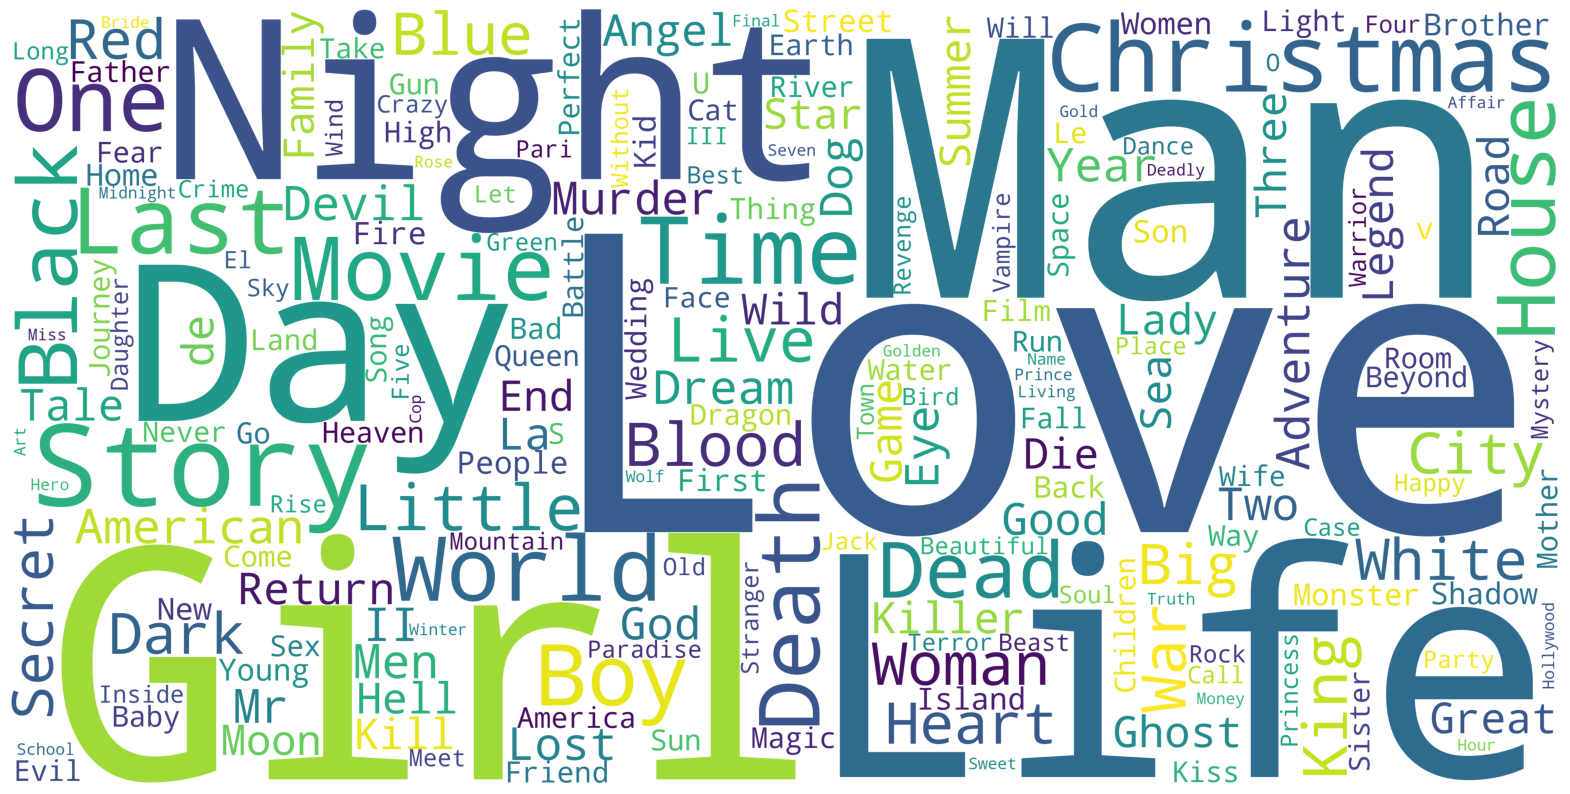

In [26]:
plot_wordcloud(title_wordcloud, 'image_result/title_wordcloud.png')

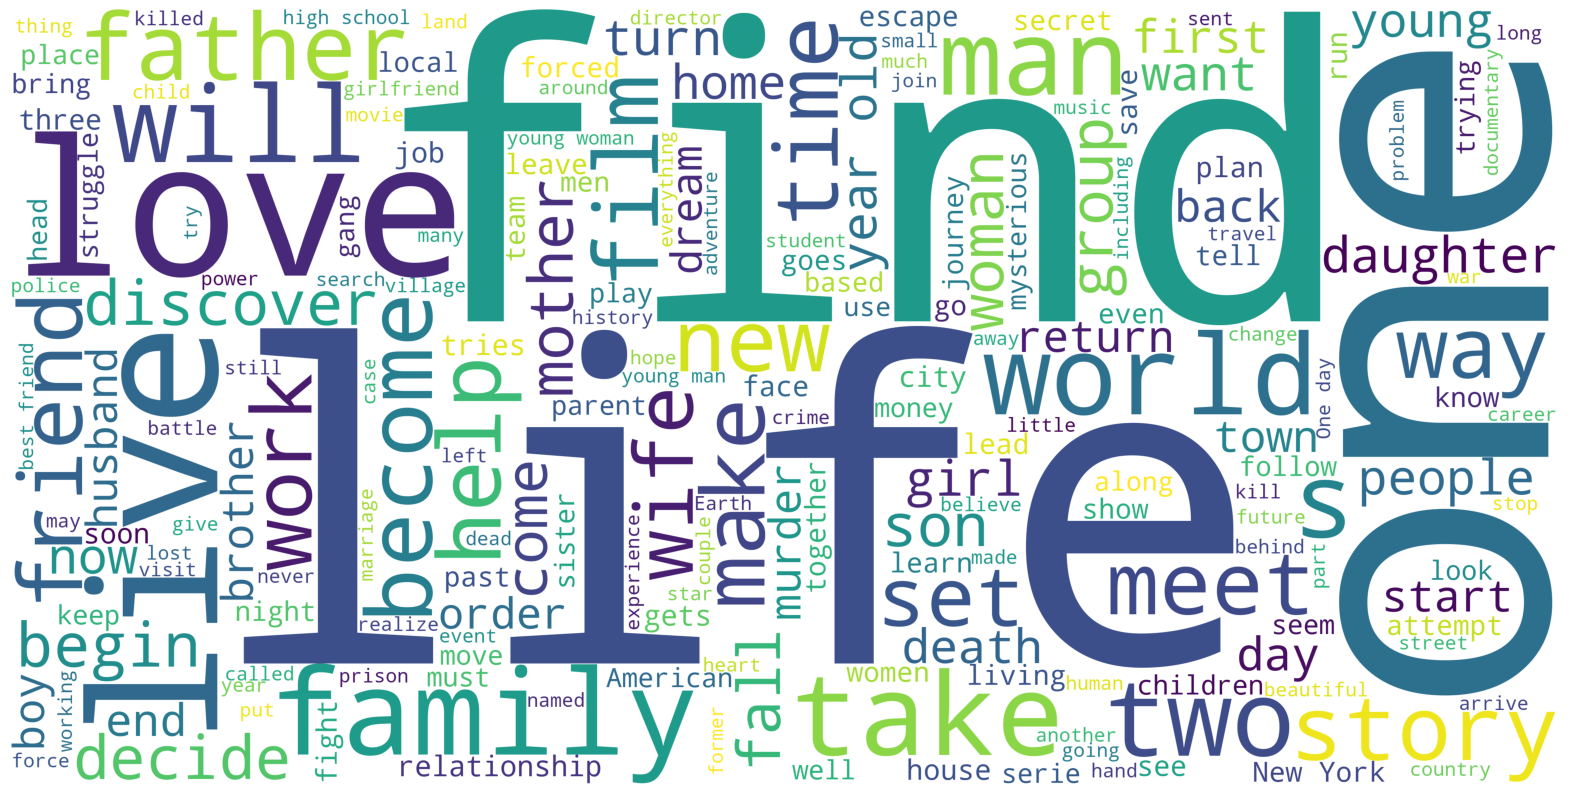

In [27]:
plot_wordcloud(overview_wordcloud, 'image_result/overview_wordcloud.png')

The word **Love** is the most commonly used word in movie titles. **Girl**, **Man** and **Life** are also among the most commonly occuring words. This encapsulates the idea of the ubiquitious presence of romance in movies pretty well.

The word **life** is the most commonly used word in movie overview. **one** and **find** are also popular in Movie Blurbs. Together with **live**, **love** and **family**, these wordclouds give us a pretty good idea of the most popular themes present in movies.

### Production Countries

The Full MovieLens Dataset consists of movies that are overwhelmingly in the English language (more than 53,800). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

In [28]:
# pd.set_option('display.max_colwidth', None)
# pd.reset_option('all')
movies_df[['production_countries']].head(15)

production_countries
0   [{'iso_3166_1': 'US', 'name': 'United States o...
1   [{'iso_3166_1': 'US', 'name': 'United States o...
2   [{'iso_3166_1': 'US', 'name': 'United States o...
3   [{'iso_3166_1': 'US', 'name': 'United States o...
4   [{'iso_3166_1': 'US', 'name': 'United States o...
5   [{'iso_3166_1': 'US', 'name': 'United States o...
6   [{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...
7   [{'iso_3166_1': 'US', 'name': 'United States o...
8   [{'iso_3166_1': 'US', 'name': 'United States o...
9   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...
10  [{'iso_3166_1': 'US', 'name': 'United States o...
11  [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...
12  [{'iso_3166_1': 'US', 'name': 'United States o...
13  [{'iso_3166_1': 'US', 'name': 'United States o...
14  [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...

In [29]:
movies_df['production_countries'] = movies_df['production_countries'].fillna('[]').apply(ast.literal_eval)
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [30]:
stack_countries = movies_df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack().reset_index(level=1, drop=True)

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\3695459959.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stack_countries = movies_df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack().reset_index(level=1, drop=True)


In [31]:
stack_countries.name = 'countries'
countries_df = movies_df.drop('production_countries', axis=1).join(stack_countries)
countries_df = pd.DataFrame(countries_df['countries'].value_counts())
countries_df['country'] = countries_df.index
countries_df.rename(columns={'countries': 'no. movies'}, inplace=True)
countries_df = countries_df[['country', 'no. movies']].reset_index().drop('index', axis=1)
countries_df.head()
# countries_df['no. movies'].sum()

country  no. movies
0  United States of America       38760
1            United Kingdom        7880
2                    France        7572
3                     Italy        4410
4                    Canada        4173

In [32]:
countries_df = countries_df[countries_df['country'] != 'United States of America']

In [33]:
fig = go.Figure(data = go.Choropleth(
    locations = countries_df['country'],
    locationmode = 'country names',
    z = countries_df['no. movies'],
    text = countries_df['country'],
    colorscale = 'Blues',
    autocolorscale = False,
    reversescale  = False,
    marker = dict(
        line = dict(
            color = 'darkgray',
            width = 0.5
        )
    ),
    colorbar = dict(
        tickprefix = '',
        title = 'Production Countries',
    )
))


fig.update_layout(
    title_text = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'equirectangular'
        ),
    )
)

Unsurprisingly, the **United States** is the most popular destination of production for movies given that the dataset largely consists of English movies. **Europe** is also an extremely popular location with the UK, France, Germany and Italy in the top 5. **Japan** and **India** are the most popular Asian countries when it comes to movie production.

### Franchise Movies

Discover the longest running and the most successful franchises among many other things.

In [34]:
franchises_df = movies_df[movies_df['belongs_to_collection'].notnull()]
franchises_df['belongs_to_collection'] = franchises_df['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
franchises_df = franchises_df[franchises_df['belongs_to_collection'].notnull()]

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\3471073773.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Highest Grossing Movie Frachises

In [35]:
franchises_pivot = franchises_df.pivot_table(values='revenue', index='belongs_to_collection', aggfunc={'revenue': ['count', 'sum', 'mean']}).reset_index()

In [36]:
franchises_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
2519                 Star Wars Collection      9  9.761423e+08  8.785281e+09
1380                James Bond Collection     26  3.006172e+08  7.816047e+09
2691              The Avengers Collection      4  1.944159e+09  7.776634e+09
1182              Harry Potter Collection      8  9.633598e+08  7.706879e+09
2838  The Fast and the Furious Collection     10  6.562868e+08  6.562868e+09
1430             Jurassic Park Collection      6  9.819169e+08  5.891502e+09
262                     Avatar Collection      2  2.621978e+09  5.243956e+09
2103  Pirates of the Caribbean Collection      5  9.046622e+08  4.523311e+09
3292              Transformers Collection      5  8.758574e+08  4.379287e+09
1819       Mission: Impossible Collection      7  5.912622e+08  4.138835e+09

The **Star Wars** Franchise is the most successful movie franchise raking in more than 8.785 billion dollars from 9 movies.

The **James Bond** Movies come in a separately second with a 7.816 billion dollars but the franchise has significantly more movies compared to the others which is 26 and therefore, a much smaller average gross.

In contrast, the **The Avengers** has only 4 movies but it grosses 7.776 billion dollars then it gets extremely high average gross.

#### Most Successful Movie Franchises (by Average Gross)

Use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [37]:
franchises_pivot.sort_values('mean', ascending=False).head(10)

belongs_to_collection  count          mean           sum
262                   Avatar Collection      2  2.621978e+09  5.243956e+09
2691            The Avengers Collection      4  1.944159e+09  7.776634e+09
2957  The Lion King (Reboot) Collection      1  1.663000e+09  1.663000e+09
2496   Spider-Man (Avengers) Collection      2  1.526888e+09  3.053775e+09
1026                  Frozen Collection      2  1.362110e+09  2.724219e+09
221                  Aquaman Collection      1  1.148528e+09  1.148528e+09
499           Captain Marvel Collection      1  1.131416e+09  1.131416e+09
387            Black Panther Collection      2  1.104514e+09  2.209028e+09
1412                   Joker Collection      1  1.074458e+09  1.074458e+09
129    Aladdin (Live-Action) Collection      1  1.054300e+09  1.054300e+09

The **Avatar** Collection, although just consisting of 2 movie at the moment, is the most successful franchise of all time with the sole movie raking to more than 5 billion dollars.

#### Longest Running Franchises

Finally, in this subsection, the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isn't affected by inflation.

However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.

In [38]:
franchises_pivot.sort_values('count', ascending=False).head(10)

belongs_to_collection  count          mean           sum
1380                James Bond Collection     26  3.006172e+08  7.816047e+09
1107          Godzilla (Showa) Collection     15  3.345750e+06  5.018625e+07
2003                 One Piece Collection     12  4.171751e+07  5.006101e+08
1012           Friday the 13th Collection     11  3.411380e+07  3.752518e+08
1156                 Halloween Collection     11  6.955455e+07  7.651000e+08
1698                      Madea Filmreihe     11  6.040909e+07  6.645000e+08
1915                    Naruto Collection     11  1.403165e+07  1.543481e+08
2838  The Fast and the Furious Collection     10  6.562868e+08  6.562868e+09
734            Detective Conan Collection     10  5.139095e+07  5.139095e+08
2519                 Star Wars Collection      9  9.761423e+08  8.785281e+09

The **James Bond** Movies is the largest franchise ever with over 26 movies released under the banner. **Godzilla (Showa)** and **One Piece** come in at a distant second and third with 15 and 12 movies respectively.

### Production Companies

In [39]:
movies_df['production_companies'] = movies_df['production_companies'].fillna('[]').apply(ast.literal_eval)
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [40]:
stack_companies = movies_df.apply(lambda x: pd.Series(x['production_companies']), axis=1).stack().reset_index(level=1, drop=True)
stack_companies.name = 'companies'

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\2905809641.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [41]:
companies_df = movies_df.drop('production_companies', axis=1).join(stack_companies)

In [42]:
companies_sum = pd.DataFrame(companies_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
companies_sum.columns = ['Total']
companies_mean = pd.DataFrame(companies_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
companies_mean.columns = ['Average']
companies_count = pd.DataFrame(companies_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
companies_count.columns = ['Count']

companies_pivot = pd.concat((companies_sum, companies_mean, companies_count), axis=1)

In [43]:
companies_pivot.rename_axis(None, axis=0, inplace=True)

#### Highest Earning Production Companies

Find out which production companies have earned the most money from the movie making business.

In [44]:
companies_pivot.sort_values('Total', ascending=False).head(10)

Total       Average  Count
Warner Bros. Pictures  7.832330e+10  1.125335e+08    696
Universal Pictures     7.722464e+10  1.159529e+08    666
20th Century Fox       5.914053e+10  1.120086e+08    528
Columbia Pictures      5.871863e+10  1.120585e+08    524
Paramount              5.681182e+10  1.050126e+08    541
Walt Disney Pictures   5.365468e+10  2.567209e+08    209
Marvel Studios         3.009587e+10  8.359963e+08     36
New Line Cinema        2.754844e+10  1.063646e+08    259
Metro-Goldwyn-Mayer    2.129842e+10  5.220202e+07    408
Amblin Entertainment   1.964932e+10  2.487255e+08     79

**Warner Bros** is the highest earning production company of all time earning a staggering 78.3 billion dollars from close to 700 movies.

**Universal Pictures** and **20th Century Fox** are the second and the third highest earning companies with 77 billion dollars and 59 billion dollars in revenue respectively. 

#### Most Succesful Production Companies

Find out which production companies produce the most succesful movies on average and only consider those companies that have made at least 15 movies.

In [45]:
companies_pivot[companies_pivot['Count'] >= 15].sort_values('Average', ascending=False).head(10)

Total       Average  Count
Marvel Studios                 3.009587e+10  8.359963e+08     36
Pixar                          1.542593e+10  5.509260e+08     28
Heyday Films                   1.373590e+10  5.283039e+08     26
Walt Disney Animation Studios  7.911515e+09  5.274343e+08     15
Lucasfilm Ltd.                 1.310183e+10  4.852529e+08     27
Bad Robot                      7.188826e+09  4.792551e+08     15
WingNut Films                  7.233772e+09  4.255160e+08     17
DreamWorks Animation           1.589331e+10  3.696118e+08     43
Genre Films                    5.448626e+09  3.632417e+08     15
Jerry Bruckheimer Films        9.470289e+09  3.507515e+08     27

**Marvel Studios** has produced the most successful movies, on average. This is not surprising considering the amazing array of movies that it has produced in the last few decades: The Avengers, Iron man 3, Captain America: Winter Soldier, Avengers: Infinity War, Avengers: Endgame etc.

**Pixar** with an average gross of 551 million dollars comes in second with movies such as Up, Finding Nemo, Inside Out, Wall-E, Ratatouille, the Toy Story Franchise, Cars Franchise, etc. under its banner.

### Original Language

From the production countries, it has already deduced that the majority of the movies in the dataset are English. In this section, the other major languages represented on the movies are shown in the dataset. 

In [46]:
movies_df['original_language'].drop_duplicates().shape[0]

122

In [47]:
languages_df = pd.DataFrame(movies_df['original_language'].value_counts())
languages_df['language'] = languages_df.index
languages_df.rename(columns={'original_language': 'no. movies'}, inplace=True)
languages_df = languages_df[['language', 'no. movies']].reset_index().drop('index', axis=1)
languages_df.head()

language  no. movies
0       en       53844
1       fr        5042
2       it        3244
3       ja        2898
4       es        2830

There are 122 languages represented in the dataset. As expected, **English** language films form the overwhelmingly majority. **French** and **Italian** movies come at a very distant second and third respectively.

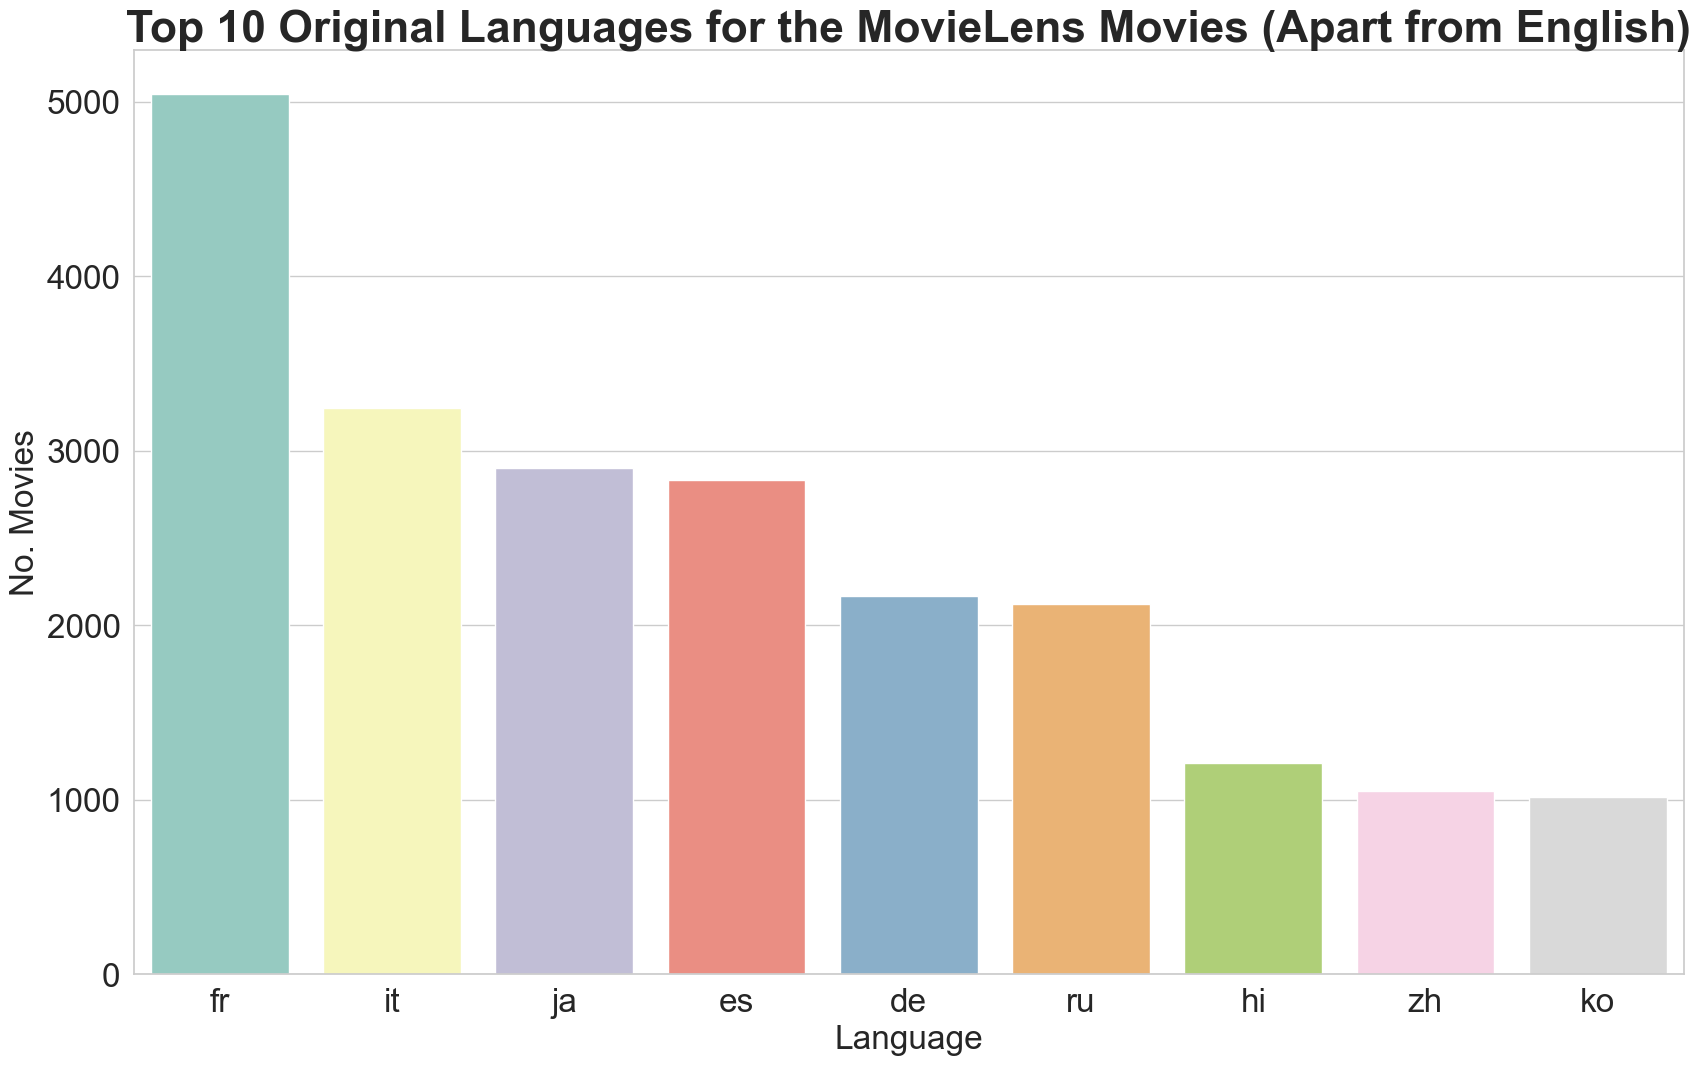

In [48]:
sns.barplot(x='language', y='no. movies',
            data=languages_df.iloc[1: 10],
            palette='Set3')
plt.title('Top 10 Original Languages for the MovieLens Movies (Apart from English)')
plt.xlabel('Language')
plt.ylabel('No. Movies')
plt.savefig('image_result/10_original_languages_no_eng.png')

As mentioned earlier, **French** and **Italian** are the most commonly occurring languages after English. **Japanese** and **Hindi** form the majority as far as Asian Languages are concerned.

### Popularity, Vote Average and Vote Count

In this section will work with metrics provided by TMDB users. Try to gain a deeper understanding of the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.

In [49]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [50]:
movies_df['popularity'] = movies_df['popularity'].apply(clean_numeric).astype('float')
movies_df['vote_average'] = movies_df['vote_average'].apply(clean_numeric).astype('float')
movies_df['vote_count'] = movies_df['vote_count'].apply(clean_numeric).astype('float')

The summary statistics and the distribution of each feature one by one.

In [51]:
movies_df['popularity'].describe()

count    85431.000000
mean         6.363127
std         11.879657
min          0.000000
25%          1.697000
50%          3.369000
75%          7.218000
max        960.238000
Name: popularity, dtype: float64

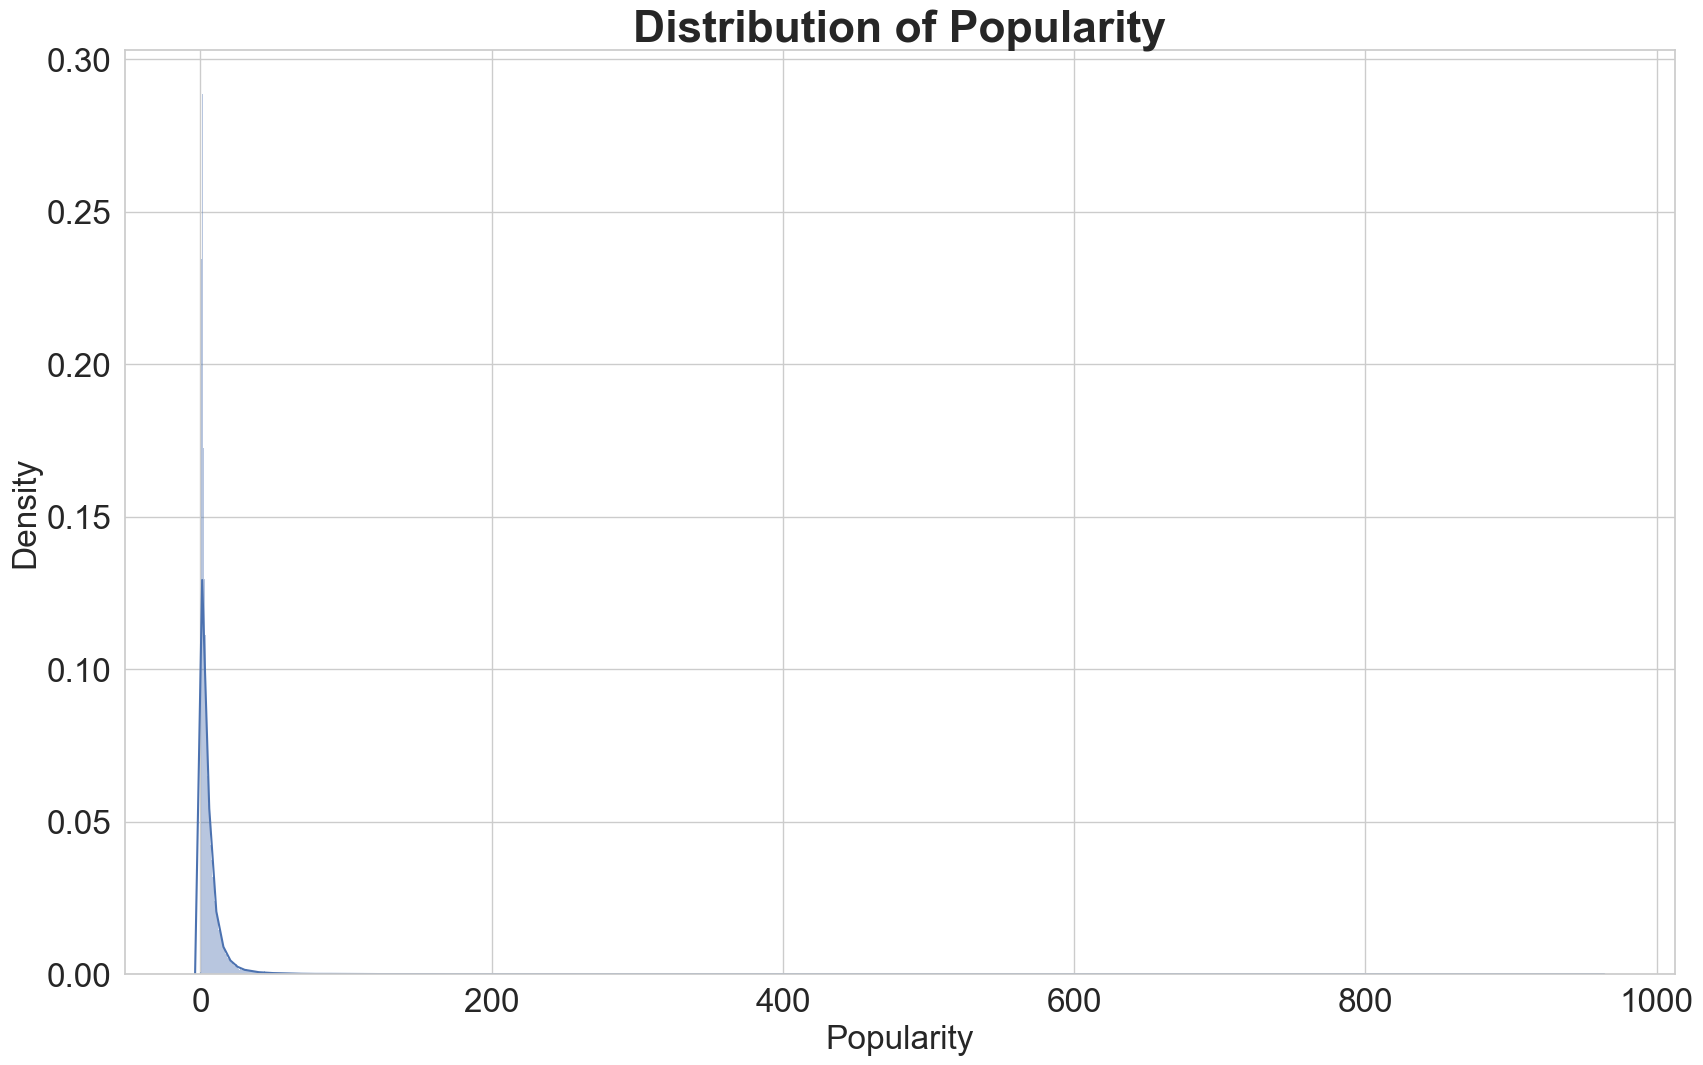

In [52]:
sns.histplot(movies_df['popularity'],
             kde=True, stat='density',
             kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.savefig('image_result/popularity_distribution.png')

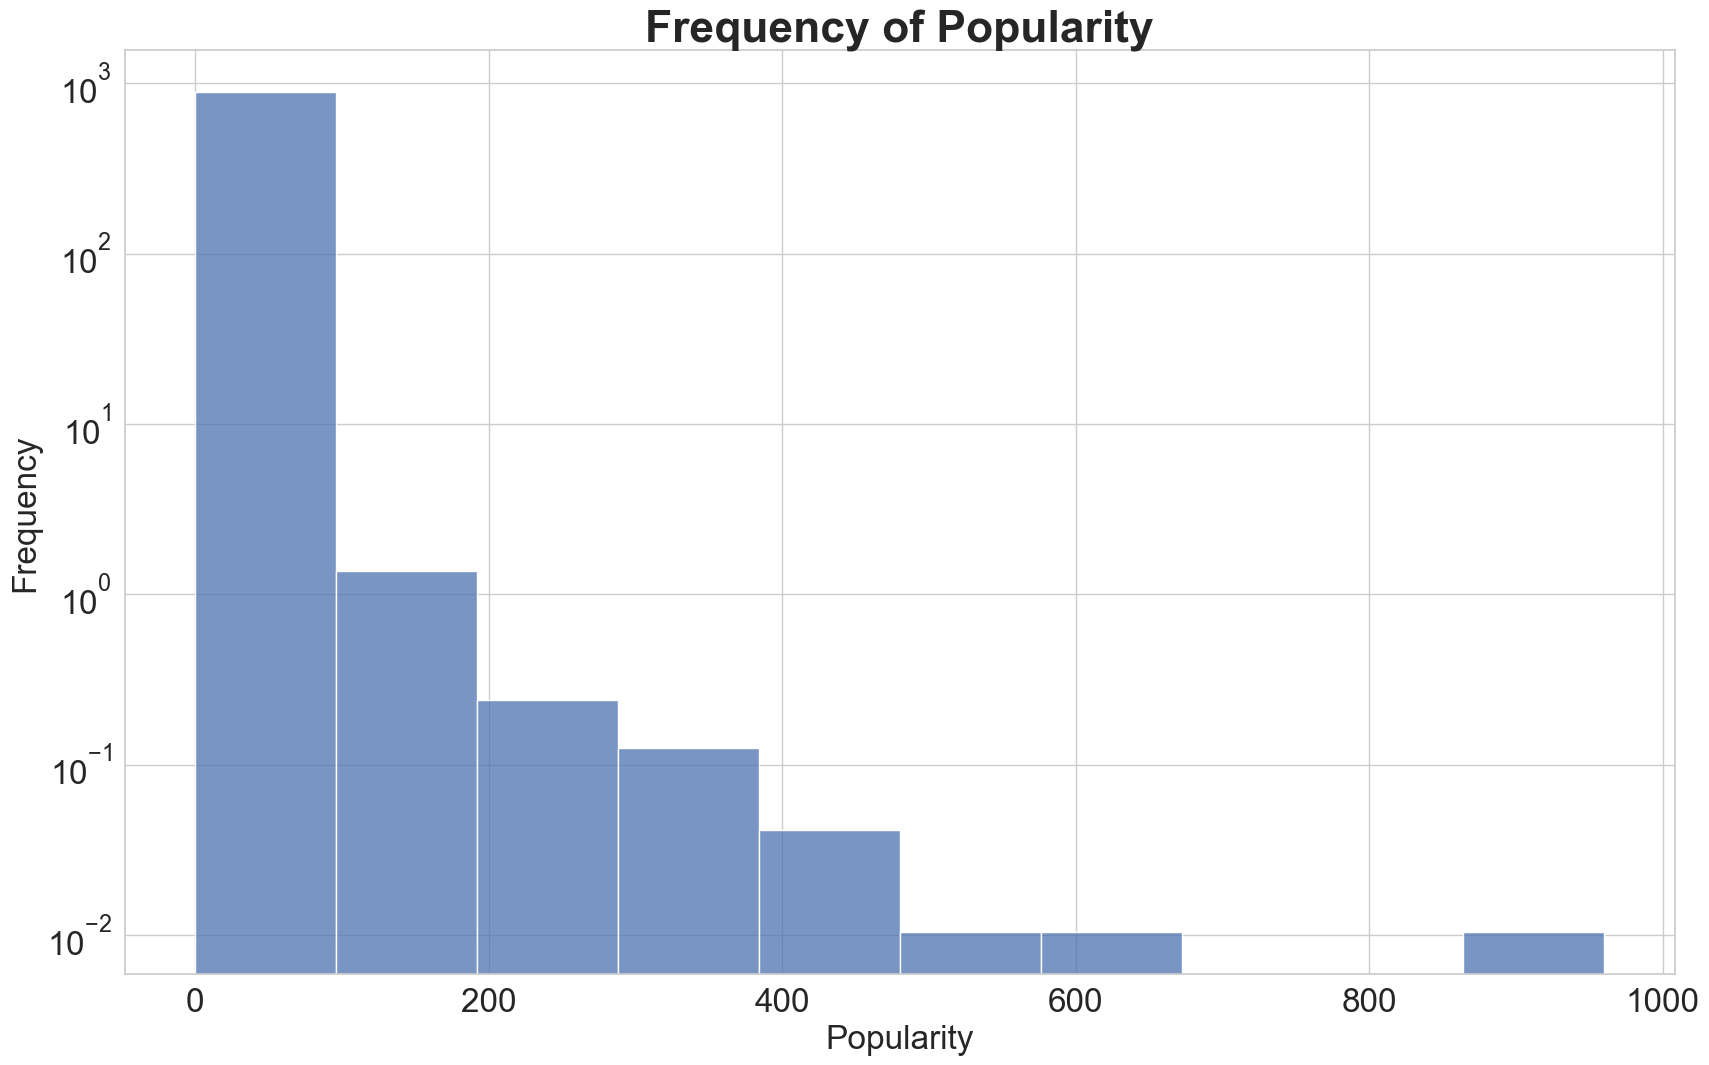

In [53]:
sns.histplot(movies_df['popularity'],
             stat='frequency',
             log_scale=(False, True),
             bins=10,
             )
plt.title('Frequency of Popularity')
plt.xlabel('Popularity')
plt.savefig('image_result/popularity_frequency.png')

The Popularity score seems to be an extremely skewed quentity with a mean of only **6.36** but maximum values reaching as high as **960**, which is 150% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 7.218).

#### Most Popular Movies by Popularity Score

In [54]:
movies_df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

title  popularity  year
85079                                    Oppenheimer     960.238  2023
84964                                         Fast X     589.347  2023
85215  Mission: Impossible - Dead Reckoning Part One     553.443  2023
78380                     Killers of the Flower Moon     470.218  2023
66671                               Agent Jade Black     446.708  2020
84554                    The Super Mario Bros. Movie     405.130  2023
81633                                       Wifelike     385.393  2022
84808               Transformers: Rise of the Beasts     359.572  2023
85191                                       My Fault     350.111  2023
85281                                         Barbie     348.889  2023

**Oppenheimer** is the most popular movie by the TMDB Popularity Score. **Fast X** and **Mission: Impossible - Dead Reckoning Part One**, two extremely successful action movies come in second and third respectively.

In [55]:
movies_df['vote_count'].describe()

count    85431.000000
mean       238.763587
std       1150.533132
min          0.000000
25%          7.000000
50%         20.000000
75%         70.000000
max      34845.000000
Name: vote_count, dtype: float64

As with popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a paltry 20 votes. The most votes a single movie has got stands at 34,845. TMDB Votes, therefore, are not as potent and suggestive as its IMDB Counterpart. Nevertheless, let check which the most voted on movies on the website are.

#### Most Voted on Movies

In [56]:
movies_df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

title  vote_count  year
14848                Inception     34845.0  2010
20995             Interstellar     33043.0  2014
12167          The Dark Knight     31010.0  2008
14027                   Avatar     30081.0  2009
16958             The Avengers     29412.0  2012
24841                 Deadpool     29136.0  2016
24844   Avengers: Infinity War     28055.0  2018
2848                Fight Club     27610.0  1999
21723  Guardians of the Galaxy     26869.0  2014
292               Pulp Fiction     26219.0  1994

**Inception** and **Interstellar**, two critically acclaimed and commercially successful Christopher Nolan movies figure at the top of our chart. 

In [57]:
movies_df['vote_average'].describe()

count    85431.000000
mean         5.850223
std          1.534872
min          0.000000
25%          5.286000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

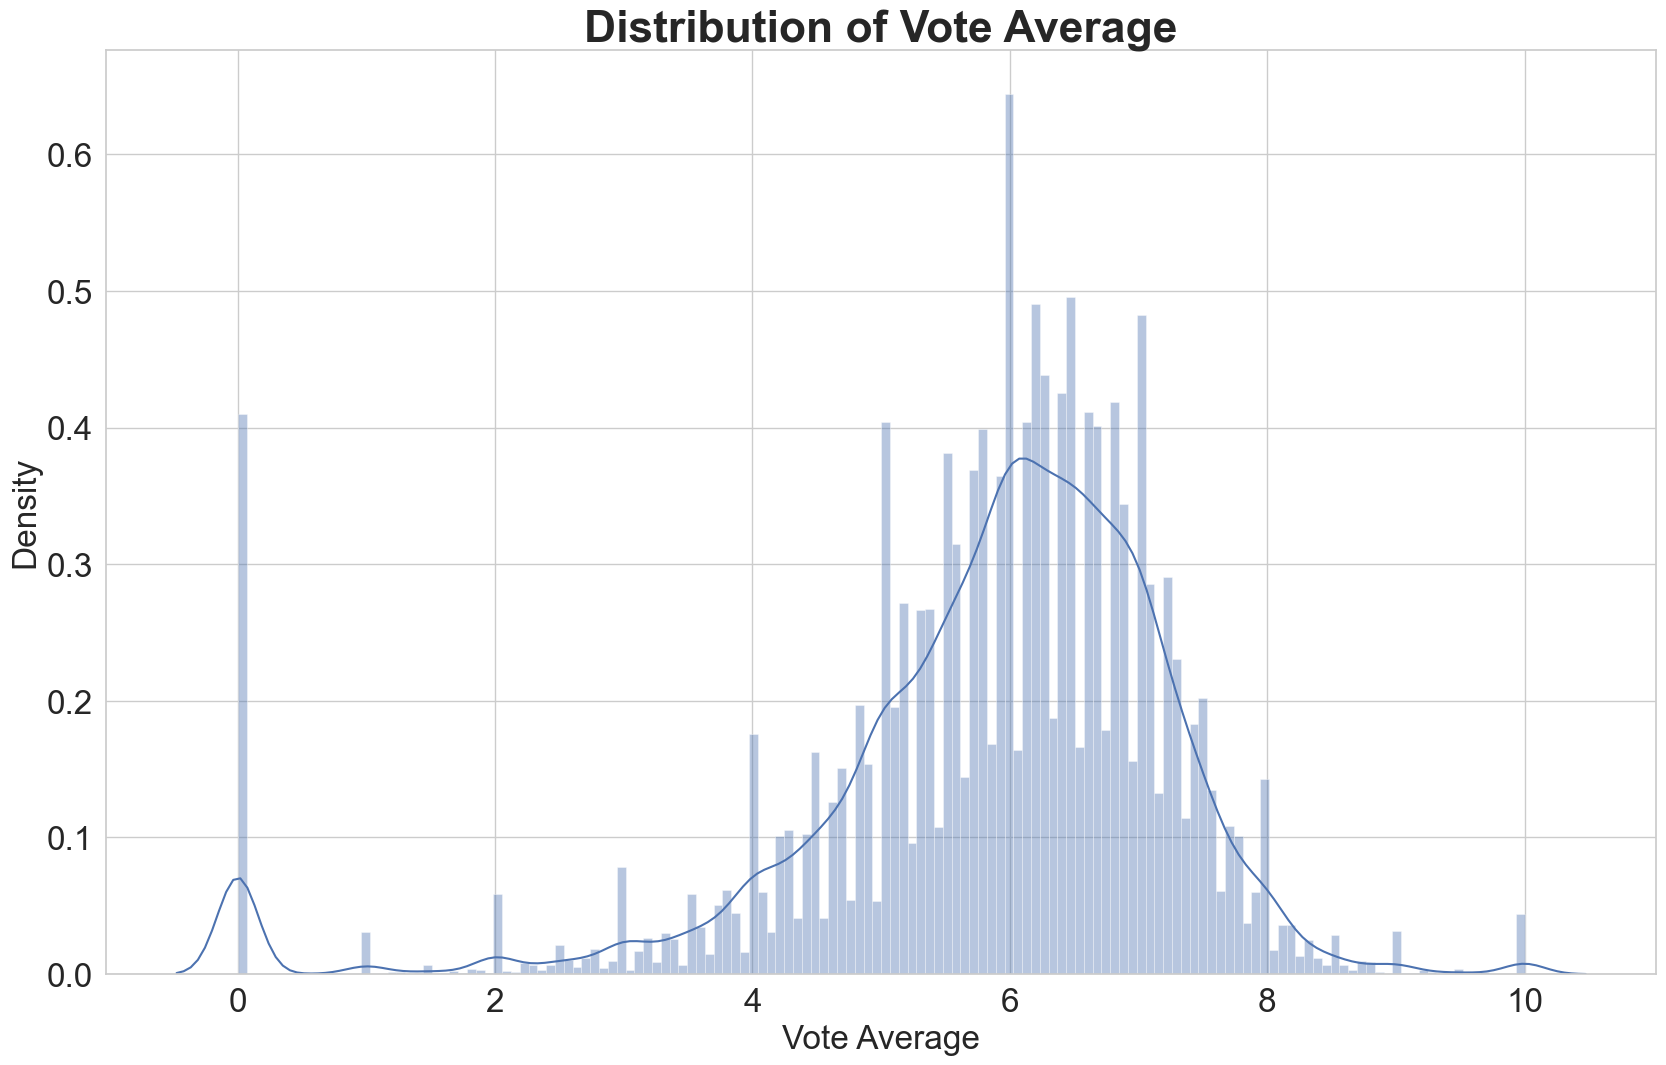

In [58]:
sns.histplot(movies_df['vote_average'],
             kde=True, stat='density',
             kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.savefig('image_result/vote_average_distribution.png')

It appears that TMDB Users are extremely strict in their ratings. The mean rating is only a **5.286** on a scale of 10. Half the movies have a rating of less than or equal to 6.

Let check what the most critically acclaimed movies as per TMDB are. Only consider those movies that have more than 25,000 votes (similar to IMDB's criteria of 25,000 votes in selecting its top 250).

#### Most Critically Acclaimed Movies

In [59]:
movies_df[movies_df['vote_count'] > 25000][['title', 'vote_average', 'vote_count', 'year']].sort_values('vote_average', ascending=False).head(10)

title  vote_average  vote_count  \
314                    The Shawshank Redemption         8.706     25045.0   
12167                           The Dark Knight         8.513     31010.0   
292                                Pulp Fiction         8.489     26219.0   
351                                Forrest Gump         8.476     25752.0   
2848                                 Fight Club         8.440     27610.0   
20995                              Interstellar         8.421     33043.0   
14848                                 Inception         8.366     34845.0   
24844                    Avengers: Infinity War         8.252     28055.0   
4769   Harry Potter and the Philosopher's Stone         7.915     25710.0   
21723                   Guardians of the Galaxy         7.905     26869.0   

       year  
314    1994  
12167  2008  
292    1994  
351    1994  
2848   1999  
20995  2014  
14848  2010  
24844  2018  
4769   2001  
21723  2014

**The Shawshank Redemption** and **The Dark Knight** are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.7 and 8.5 TMDB Scores respectively.


Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation between these two quanitties? Let visualise their relationship in the form of a scatterplot.

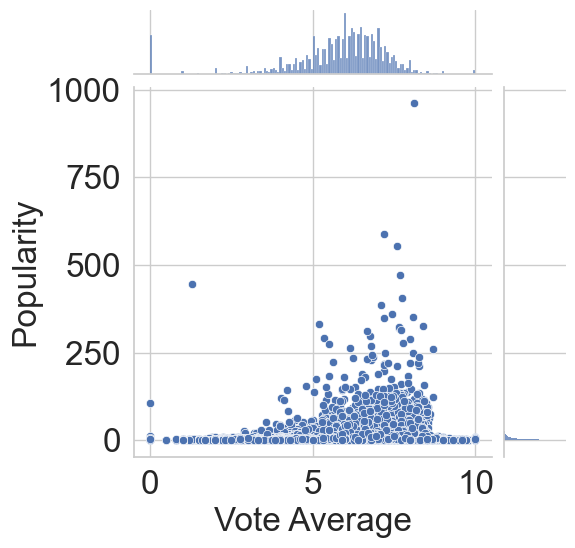

In [60]:
sns.jointplot(x='vote_average', y='popularity',
              data=movies_df)
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.savefig('image_result/popularity_vote_average_correlation.png')

Popularity and vote average are independent quantities. It would be interesting to discover how TMDB assigns numerical popularity scores to its movies.

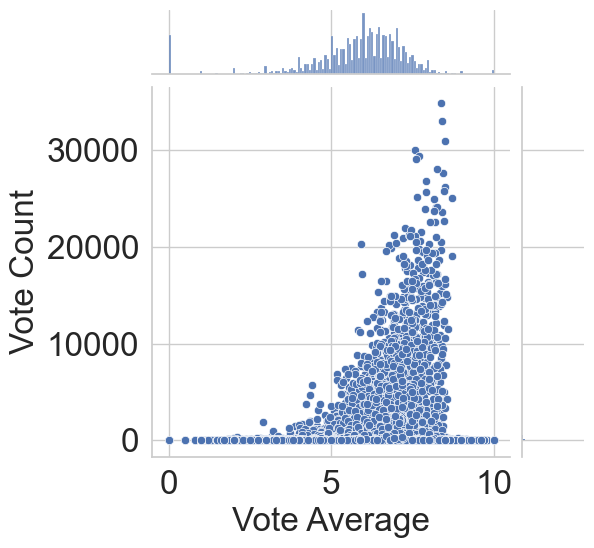

In [61]:
sns.jointplot(x='vote_average', y='vote_count',
              data=movies_df)
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.savefig('image_result/vote_count_vote_average_correlation.png')

There is a very small correlation between Vote Count and Vote Average. A large number of votes on a particular movie does not necessarily imply that the movie is good.

### Movie Release Dates

Release Dates can often play a very important role in determining the success and the revenue generated by a particular movie. In this section try to gain insights about release dates in terms of years, months and days of the week. 

The **year** feature have already been constructed in preliminary data wrangling step. Now extract the month and day too for each movie with a release date.

In [62]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_month(x):
    try:
        return months[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
    
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        result = datetime.date(year, month, day).weekday()
        return days[result]
    except:
        return np.nan

In [63]:
movies_df['month'] = movies_df['release_date'].apply(get_month)
movies_df['day'] = movies_df['release_date'].apply(get_day)

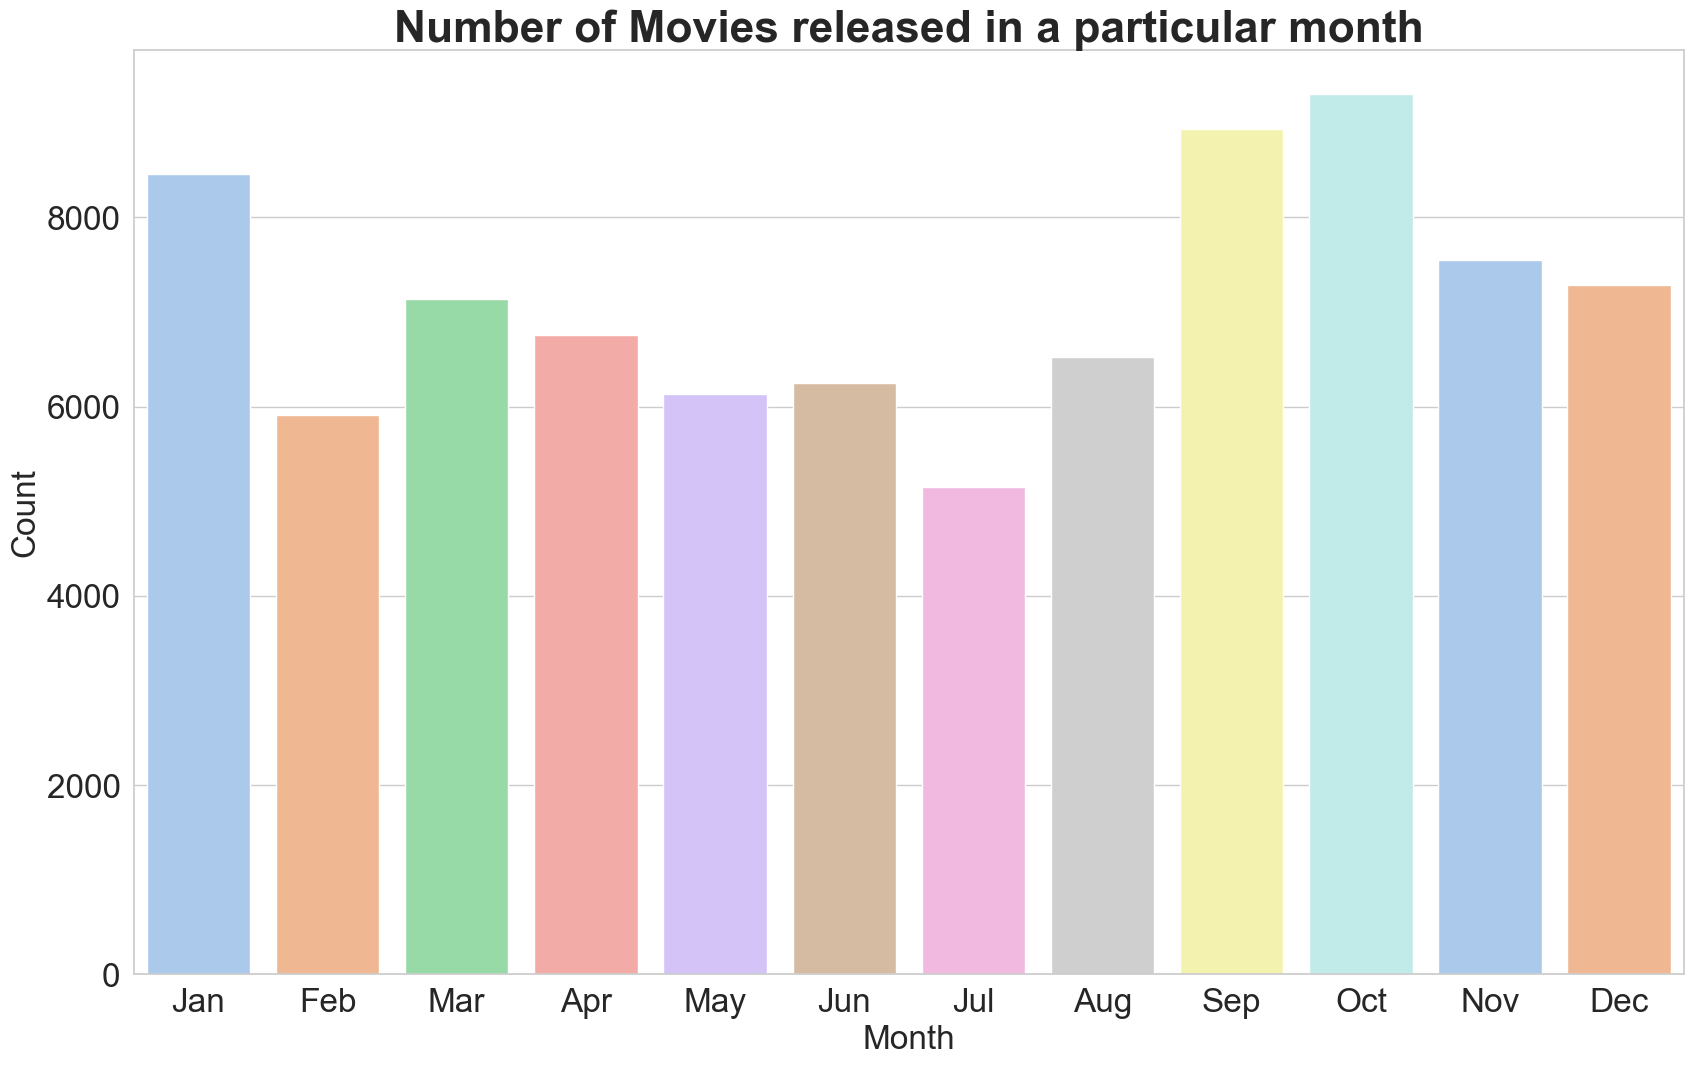

In [64]:
sns.countplot(x='month', data=movies_df, order=months, palette='pastel')
plt.title('Number of Movies released in a particular month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('image_result/monthly_movies.png')

It appears that **October** is the most popular month when it comes to movie releases.

Awards season: Many prestigious film awards, such as the Oscars, take place early in the following year. Studios release their best films towards the end of the year to be fresh in the minds of voters.

Holiday season: The holiday period, including Thanksgiving and Christmas, is a popular time for people to go to the movies. Studios release their most anticipated films during this time to take advantage of increased audience interest.

Box office performance: Historically, movies released in the fall and winter have performed well at the box office, as people tend to spend more time indoors during these months.

In which months do blockbuster movies tend to release? To answer this question,consider all movies that have made in excess of 100 million dollars and calculate the average gross for each month.

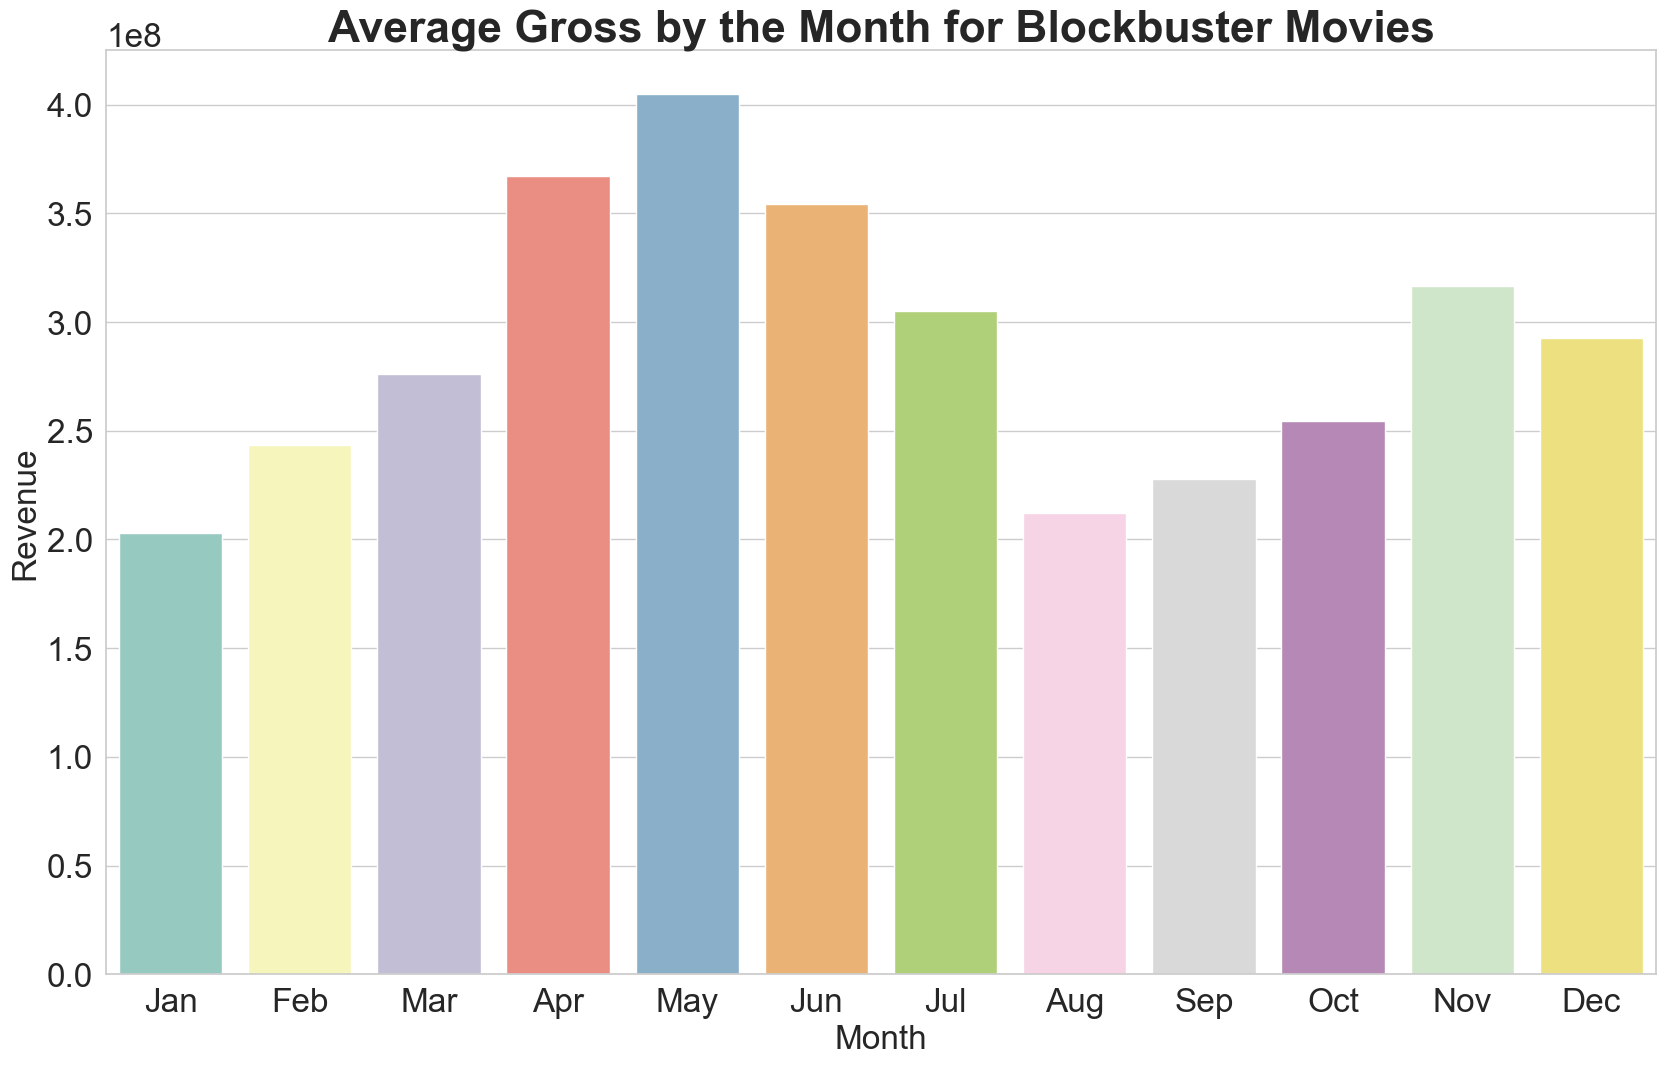

In [65]:
month_mean = pd.DataFrame(movies_df[movies_df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
month_mean =  month_mean[['mon', 'revenue']].reset_index().drop('month', axis=1)
month_mean.rename(columns={'mon': 'month'}, inplace=True)

sns.barplot(x='month', y='revenue',
            data=month_mean, order=months,
            palette='Set3')
plt.title("Average Gross by the Month for Blockbuster Movies")
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.savefig('image_result/blockbuster_movies_monthly_average_gross.png')

The months of **April**, **May** and **June** have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment.

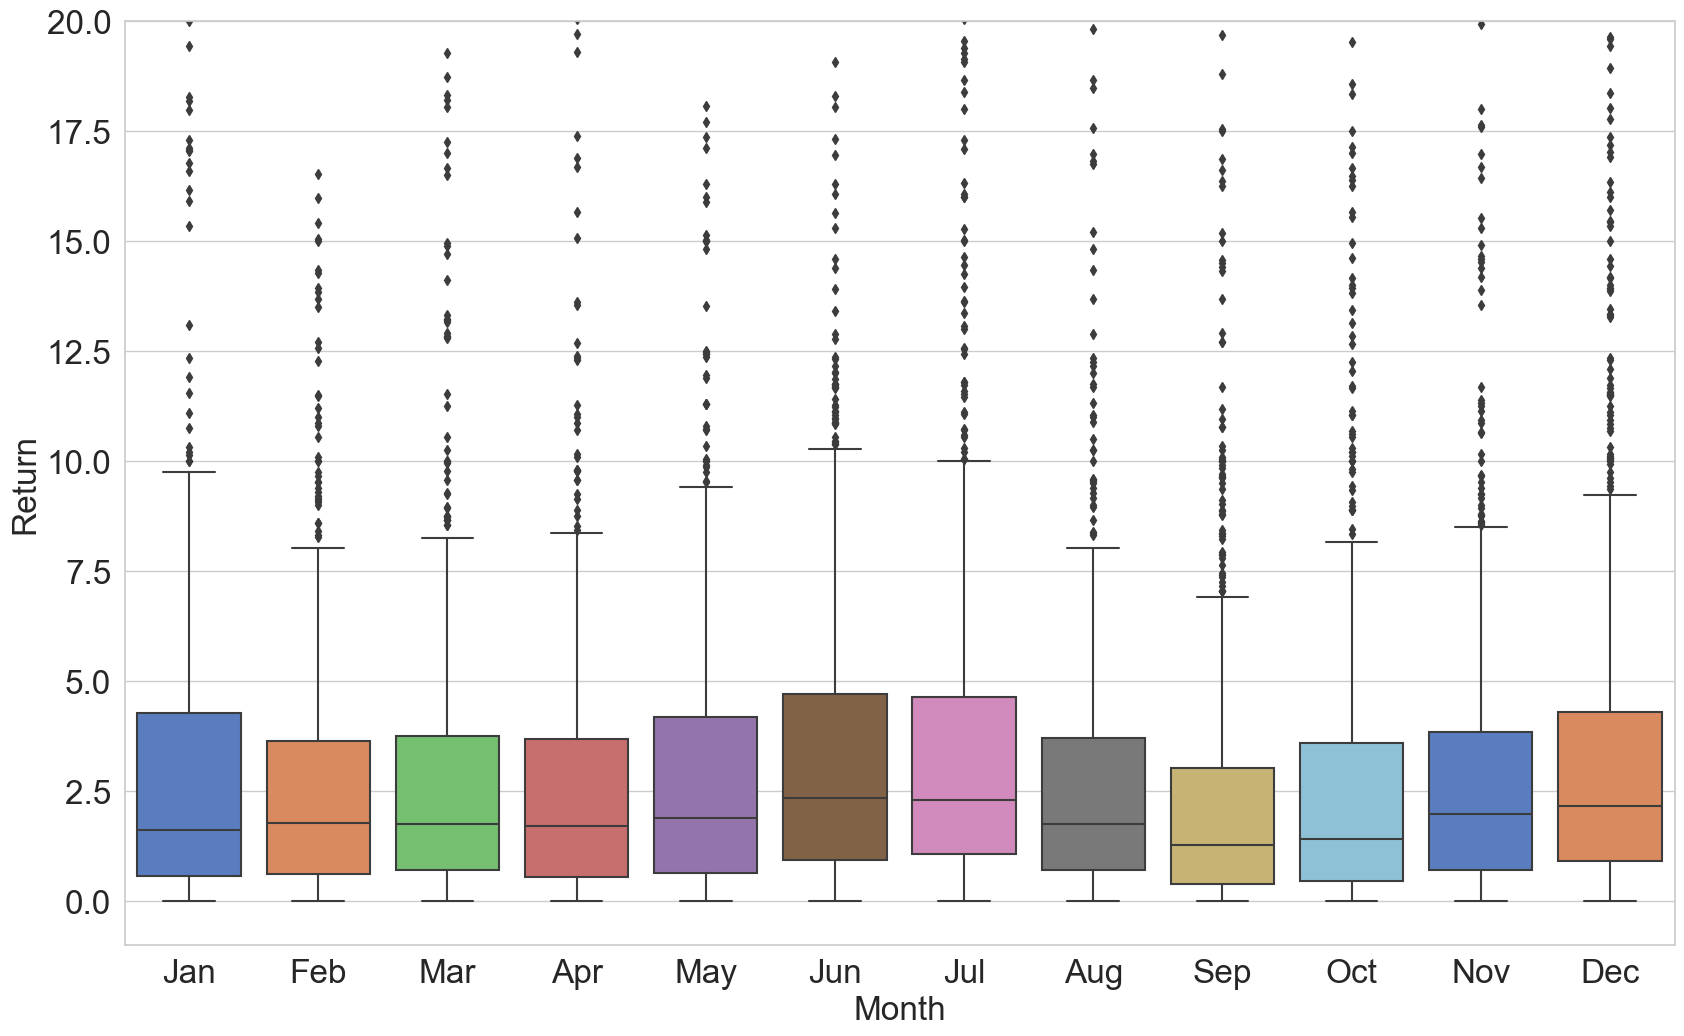

In [66]:
ax = sns.boxplot(x='month', y='return',
            data=movies_df[movies_df['return'].notnull()],
            palette='muted', order=months)
ax.set_ylim((-1, 20))
plt.xlabel('Month')
plt.ylabel('Return')
plt.savefig('image_result/month_return_boxplot.png')

The months of **June** and **July** tend to yield the highest median returns. **September** is the least successful months on the aforementioned metrics.

Again, the success of June and July movies can be attributed to them being summer months and times of vacation. September usually denotes the beginning of the school/college semester and hence a slight reduction in the consumption of movies.

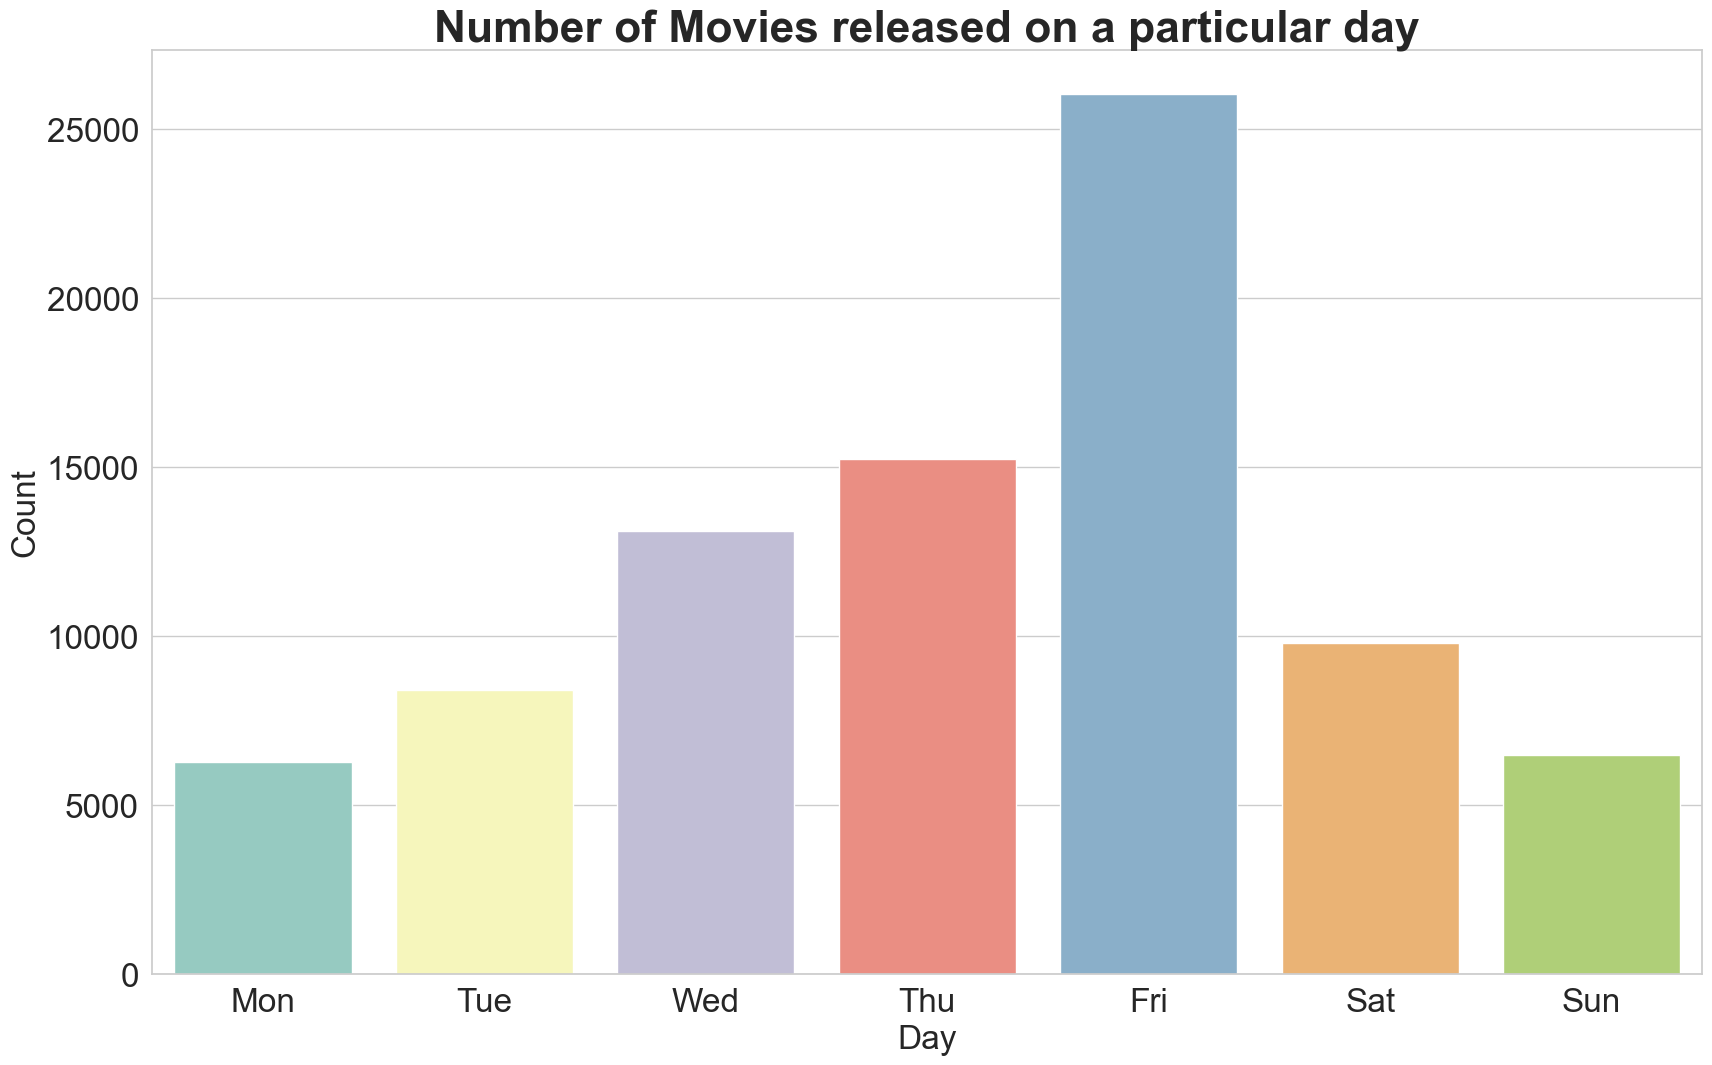

In [67]:
sns.countplot(x='day', data=movies_df,
              order= days, palette='Set3')
plt.title("Number of Movies released on a particular day")
plt.xlabel('Day')
plt.ylabel('Count')
plt.savefig('image_result/daily_movies.png')

**Friday** is clearly the most popular day for movie releases. This is understandable considering the fact that it usually denotes the beginning of the weekend. **Sunday** and **Monday** are the least popular days and this can be attributed to the same aforementioned reason.

#### Number of Movies each year

The Dataset of 85,000 movies available does not represent the entire corpus of movies released since the inception of cinema. However, it is reasomnable to assume that it does include almost every major film released in Hollywood as well as other major film industries across the world (such as Bollywood in India). With this assumption in mind, take a look at the number of movies produced by the year.

In [68]:
year_count = pd.DataFrame(movies_df.groupby('year')['title'].count())
year_count.rename(columns={'title': 'count'}, inplace=True)

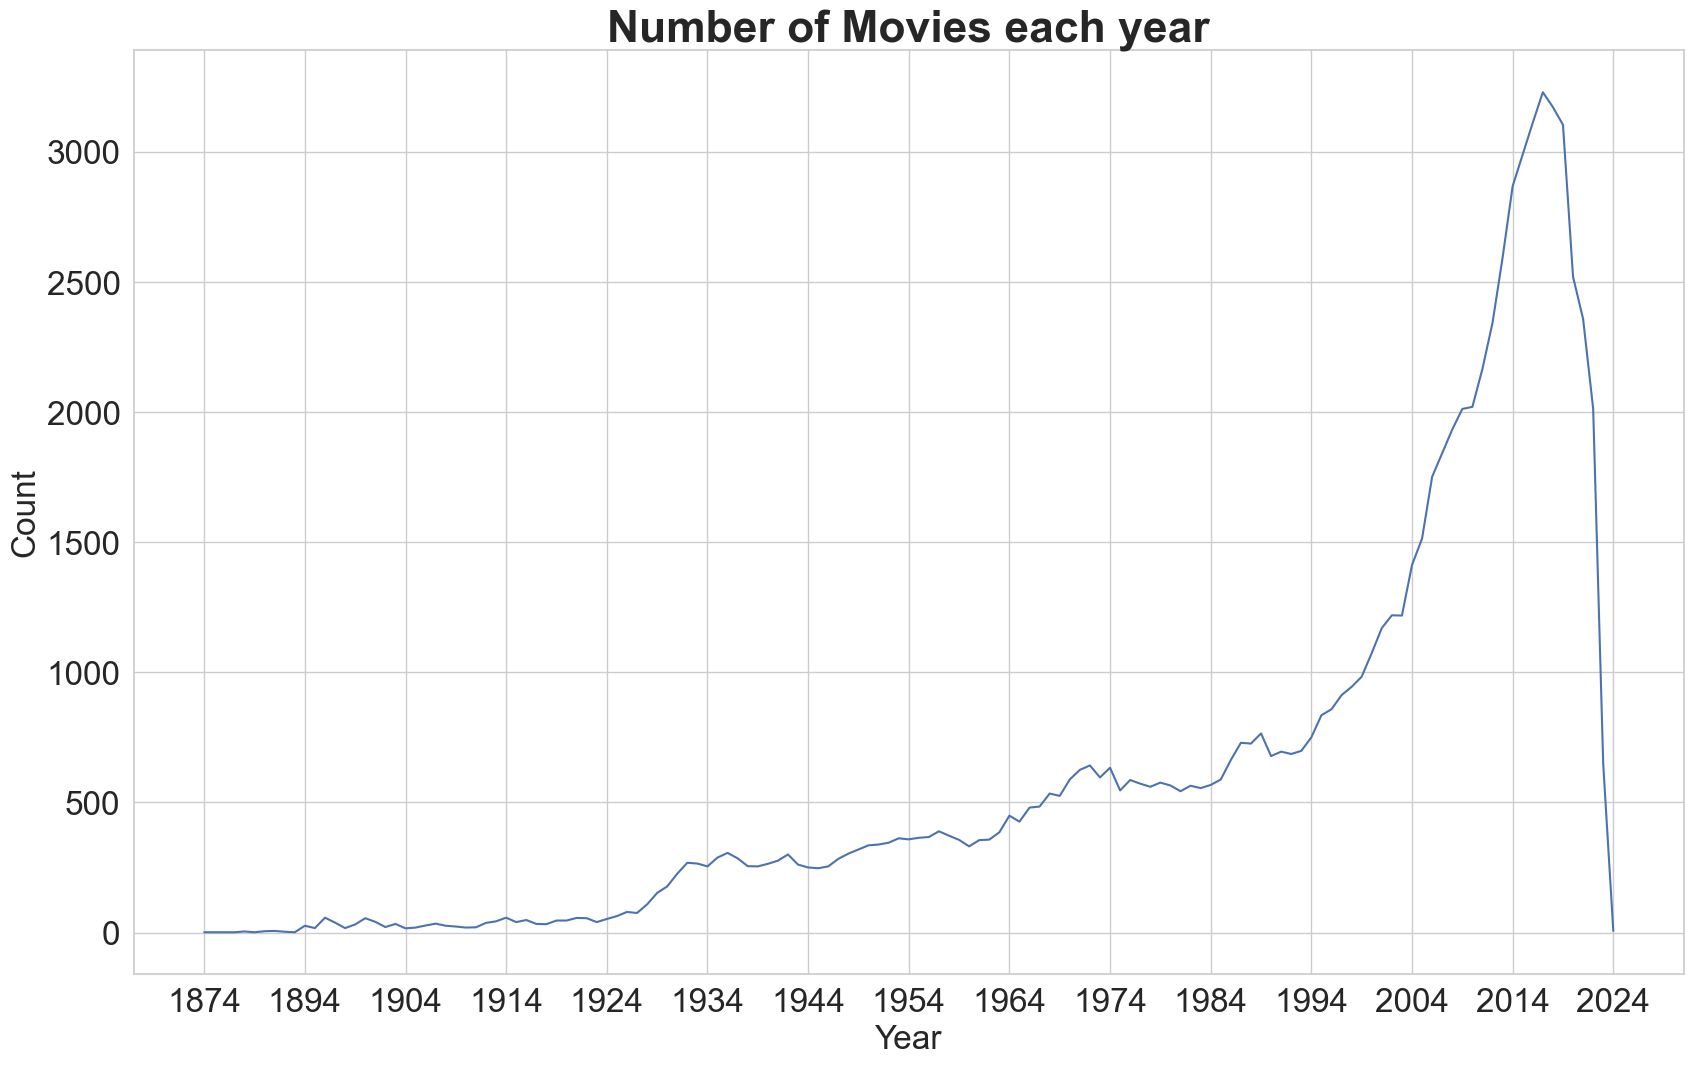

In [69]:
sns.lineplot(x='year', y='count',
             data=year_count,)
plt.title("Number of Movies each year")
plt.xticks(year_count.index[::10])
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('image_result/movies_each_year.png')

It is remarkably noticed that there is a sharp rise in the number of movies **starting the 1990s decade.** However, it is entirely possible that recent movies were oversampled for the purposes of this dataset.

#### Earliest Movies Represented

In [70]:
movies_df[movies_df['year'].notnull()][['title', 'year']].sort_values('year').head()

title  year
35450                          Passage of Venus  1874
80960                         The Magic Rosette  1878
80961                           L'Homme Machine  1885
35444               Man Walking Around a Corner  1887
50127  Horse and Rider Jumping Over an Obstacle  1888

The oldest movie, **Passage of Venus**, was a series of photographs of the transit of the planet Venus across the Sun in 1874. They were taken in Japan by the French astronomer Pierre Janssen using his 'photographic revolver'. This is also the oldest movie on both IMDB and TMDB.

Finally, in this section, construct a heatmap to indicate movie releases by month and year for all movies released in this century. This will give a good idea of the *hot* and *cold* months for movie buffs.

In [71]:
movies_df_21 = movies_df.copy()

In [72]:
movies_df_21['year'] = movies_df_21[movies_df_21['year'].notnull()]['year'].astype('Int64')

In [73]:
movies_df_21 = movies_df_21[movies_df_21['year'] >= 2000]
hmap_21 = pd.pivot_table(data=movies_df_21,
                         index='month',
                         columns='year',
                         aggfunc='count',
                         values='title')
hmap_21 = hmap_21.fillna(0)

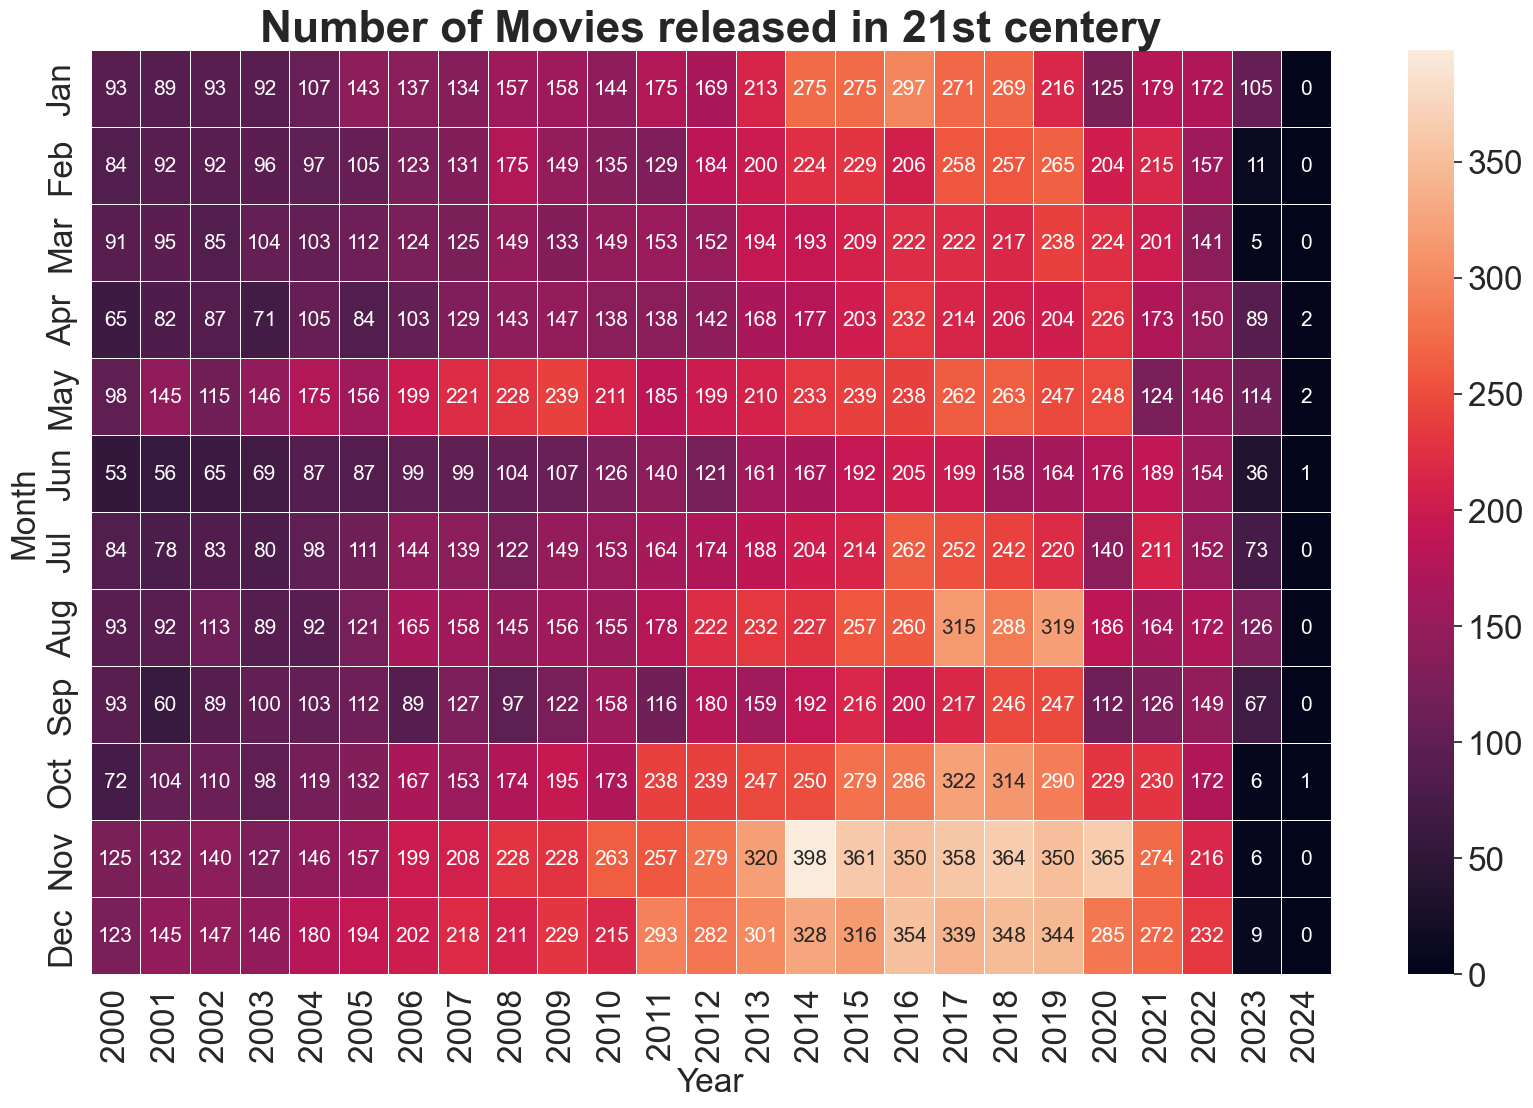

In [74]:
sns.heatmap(hmap_21,
            annot=True,
            linewidths=.5,
            fmt='n',
            yticklabels=months,
            annot_kws={'size': 15}
)
plt.title("Number of Movies released in 21st centery")
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('image_result/movies_heatmap.png')

### Movie Status

Although not entirely relevant to analysis of movies, gathering information on the various kinds of movies based on their status of release can provide interesitng insight on the nature of the movies present in the dataset. Preliminary hunch was that almost every movie has the **Released** status.

In [75]:
movies_df['status'].value_counts()

Released           85422
Post Production        5
Planned                2
In Production          2
Name: status, dtype: int64

Almost every movie is indeed released.

However, it is interesting to see that MovieLens has user ratings for movies that are still in the planning, production and post production stage. This information might be taken into account while building collaborative filtering recommendation engine.

### Spoken Languages

Convert our **spoken_languages** feature to a numeric feature denoting the number of languages spoken in that film to analyse an influence of spoken languages on the success of a movie

In [76]:
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [77]:
movies_df['spoken_languages'].value_counts()


1     66945
2      9922
0      3907
3      3093
4      1013
5       348
6       123
7        39
8        18
9         9
10        7
12        3
11        2
13        1
14        1
Name: spoken_languages, dtype: int64

Most movies have just one language spoken in the entire duration of the film. **14** is the higest number of languages spoken in a film.

In [78]:
movies_df[movies_df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

title  year  \
59831                                      Train Station  2015   
35868                                     The Testaments  2000   
13620                             To Each His Own Cinema  2007   
43575                                          City Life  1990   
76582  Woodlands Dark and Days Bewitched: A History o...  2021   
13909                                               2012  2009   
69452                         Don't Read This on a Plane  2021   
8768                           The Adventures of Picasso  1978   
16365                                               Pina  2011   
33490                                              Human  2015   
47563                                           The Life  2004   
47681                    Final Cut: Ladies and Gentlemen  2012   
49121                                         Human Flow  2017   
64523                                    The Translators  2019   

       spoken_languages  
59831                14  
35868                13  
13620                12  
43575                12  
76582                12  
13909                11  
69452                11  
8768                 10  
16365                10  
33490                10  
47563                10  
47681                10  
49121                10  
64523                10

The movie with the most number of languages, **Train Station**.

Train Station follows a single character, known only as "The Person in Brown", played by 40 actors who vary in age, gender, ethnicity and sexual orientation. Along the character's journey, they are presented with a series of choices - some minor, some life-altering. Cities include Berlin, Bogota, Dubai, Jakarta, Los Angeles, Singapore, Tehran and 20 others across five continents. Train Station unites cultures and breaks language barriers, reminding us that we all live in the same world full of diversity, options and consequences.

### Runtime

From its humble beginnings of 1 minute slient, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let try and gain some additional insights about the nature of movie lengths and their evolution over time.

In [79]:
movies_df['runtime'].dtype

dtype('int64')

The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a **staggering 12,480 minutes (or 208 hours) long.**

In [80]:
movies_df['runtime'] = movies_df['runtime'].astype('float64')

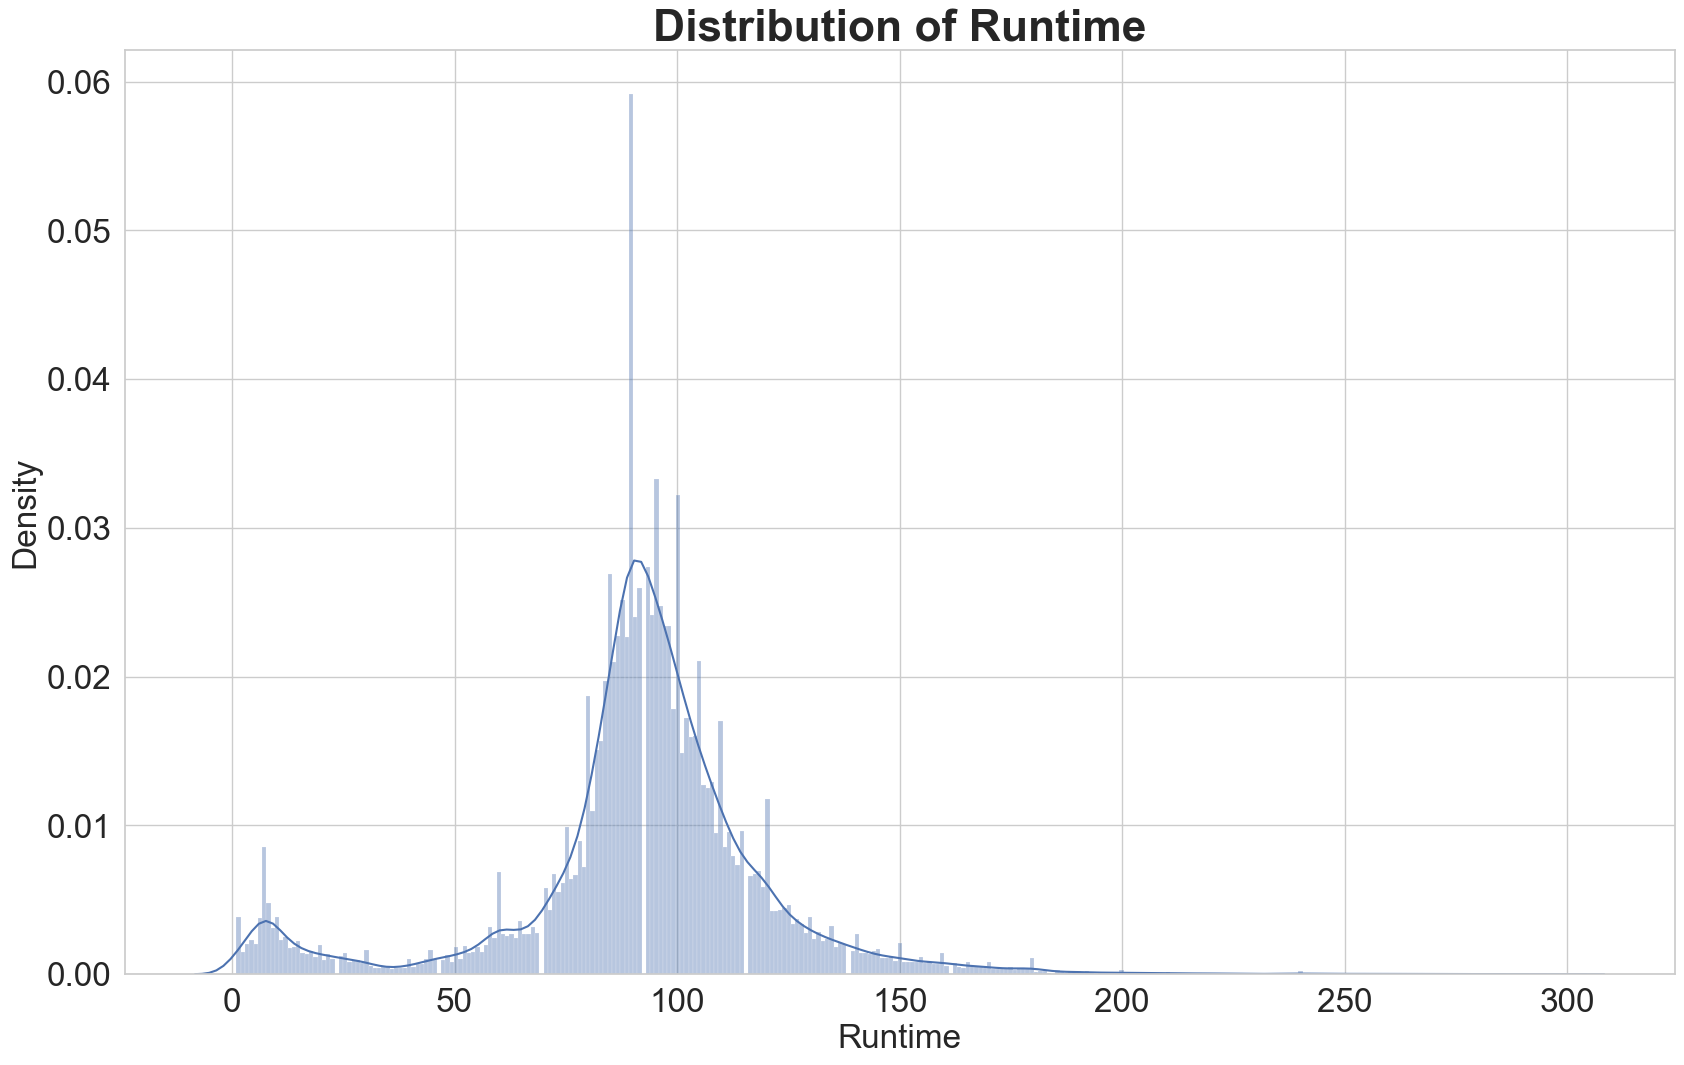

In [81]:
sns.histplot(movies_df[(movies_df['runtime'] > 0) & (movies_df['runtime'] < 300)]['runtime'],
             kde=True, stat='density',
             kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.savefig('image_result/runtime_distribution.png')

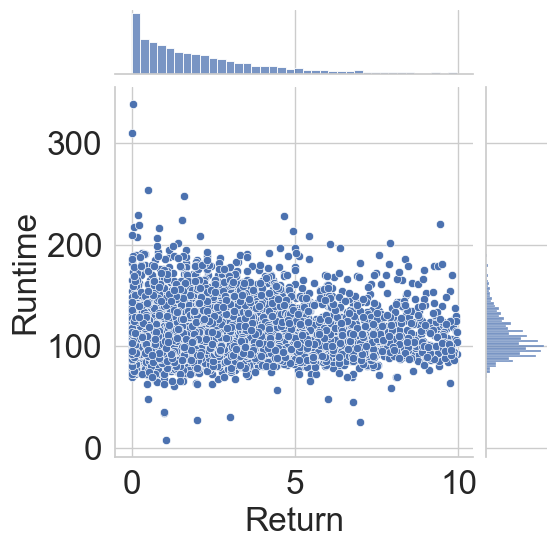

In [82]:
re_run_df = movies_df[(movies_df['return'].notnull()) & (movies_df['return'] < 10) & (movies_df['runtime'] > 0)]
sns.jointplot(x='return', y='runtime', data=re_run_df)
plt.xlabel('Return')
plt.ylabel('Runtime')
plt.savefig('image_result/return_runtime_correlation.png')

There seems to be relationship between the two quantities. **The duration of a movie is independent of its success.**

However, this might not be the case with duration and budget. A longer movie should entail a higher budget.

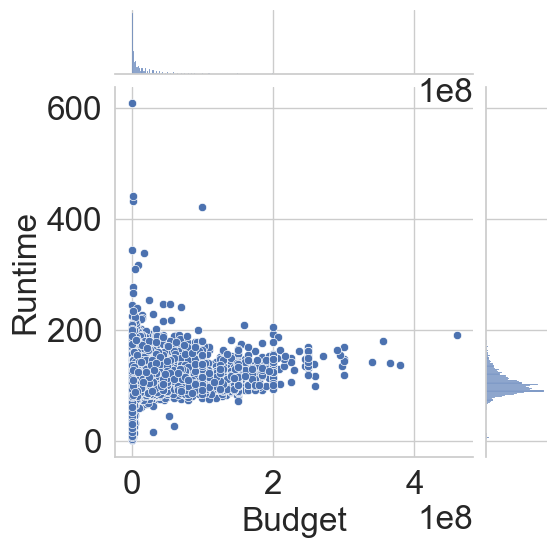

In [83]:
bud_run_df = movies_df[(movies_df['budget'].notnull()) & (movies_df['runtime'] > 0)]
ax = sns.jointplot(x='budget', y='runtime', data=bud_run_df)
plt.xlabel('Budget')
plt.ylabel('Runtime')
plt.savefig('image_result/budget_runtime_correlation.png')

The two quantities have a much weaker correlation than expected. In retrospect, the genre of the movie tends to have a much greater impact on budget. A 3 hour art film will cost significantly lesser than a 90 minute Sci-Fi movie. 

Next, see the average lengths of movies through time, right from the 1890s to the 2017s. It would be interesting to see the trends in what filmmakers adjudged would be the appropriate length of a movie at that time.

In [84]:
year_runtime = pd.DataFrame(movies_df[movies_df['year'].notnull()].groupby('year')['runtime'].mean())

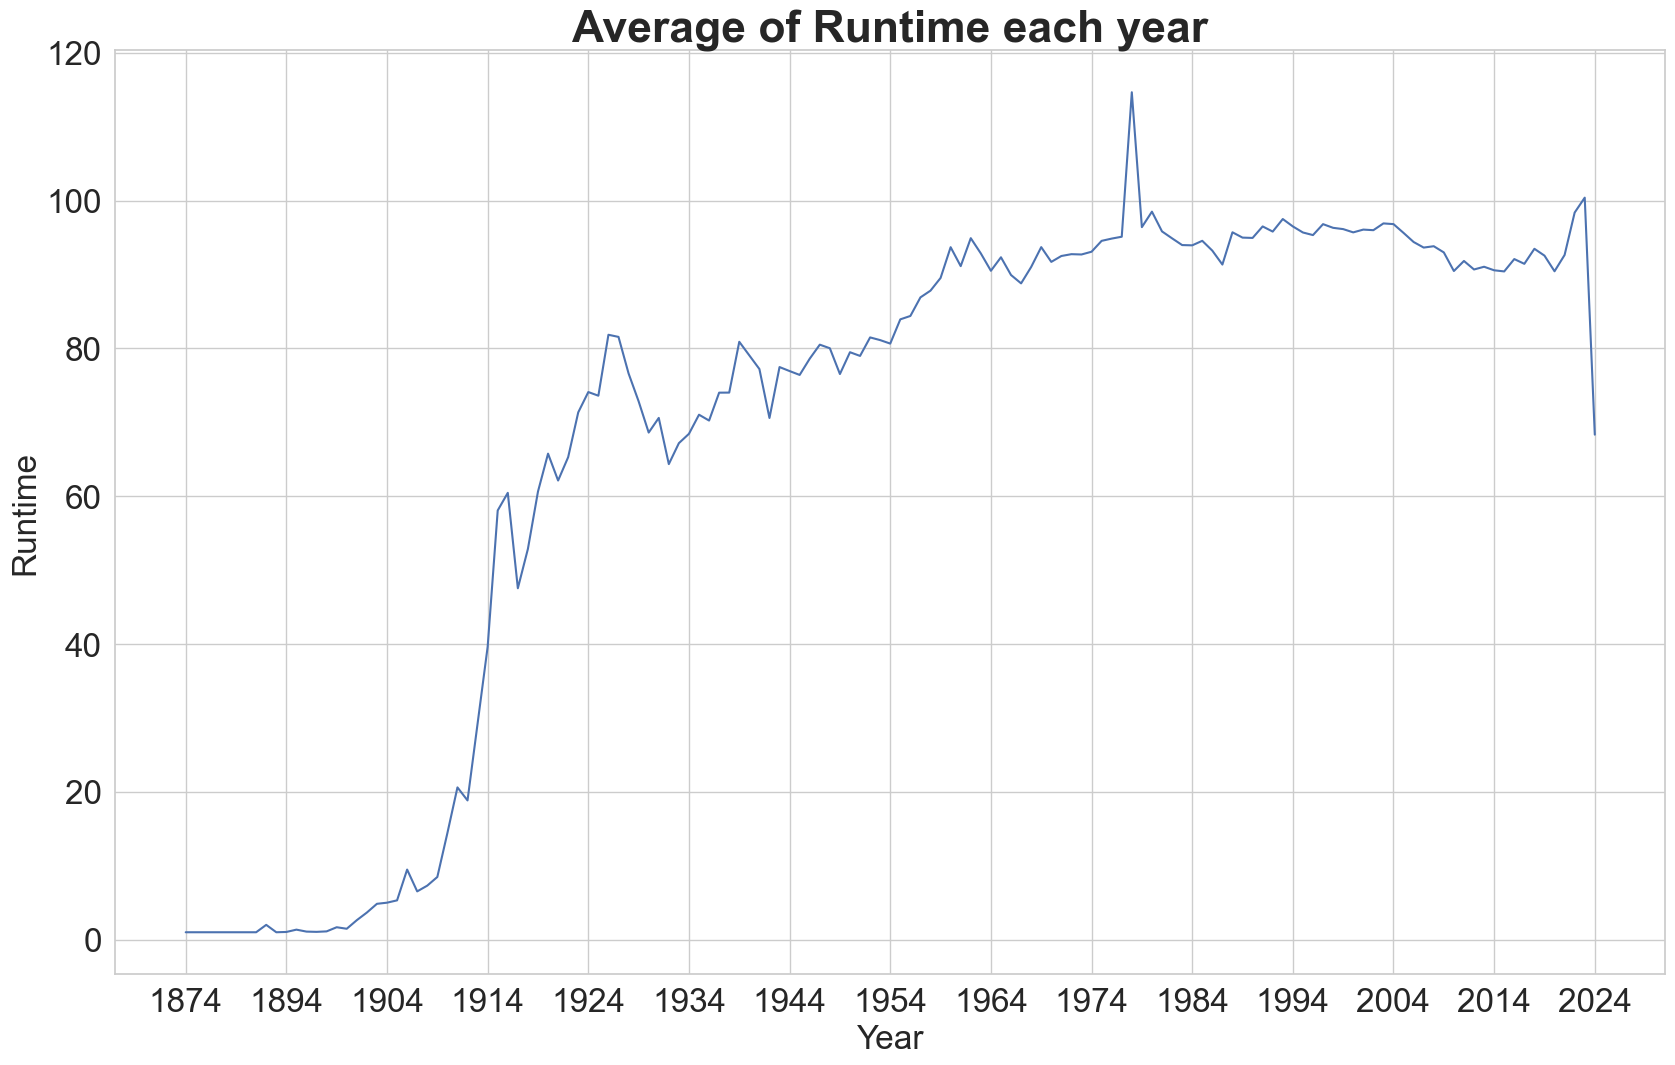

In [85]:
sns.lineplot(x=year_runtime.index, y='runtime',
             data=year_runtime,)
plt.title("Average of Runtime each year")
plt.xticks(year_runtime.index[::10])
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.savefig('image_result/runtime_each_year.png')

It would be noticed that films started hitting the **60 minute mark as early as 1914**. Starting **1924**, films started having the traiditonal 90 minute duration and has remained more or less constant ever since.

#### Shortest Movies

In [86]:
movies_df[movies_df['runtime'] > 0][['title', 'runtime', 'year']].sort_values('runtime').head(10)

title  runtime  year
62285                The Pillar of Fire      1.0  1899
62505             Starting a Skyscraper      1.0  1902
62507  A Gesture Fight in Hester Street      1.0  1900
44074                    A Morning Bath      1.0  1896
63119               Caicedo (with Pole)      1.0  1894
63120                 Indian Day School      1.0  1898
63121                     A Street Arab      1.0  1898
44075    Panorama of Esplanade by Night      1.0  1901
44073                   The Sick Kitten      1.0  1903
47192            The Roller Skate Craze      1.0  1907

It can be seen that every movie in this list were filmed in the late 1890s and the beginning of the 20th century. All these movies were one minute long.

#### Longest Movies

In [87]:
movies_df[movies_df['runtime'] > 0][['title', 'runtime', 'year']].sort_values('runtime', ascending=False).head(10)

title  runtime  year
72637                                          Cinématon  12480.0  1978
49647                                  The Reality of Me    840.0  2012
75872  Music with Roots in the Aether: Opera for Tele...    840.0  1974
59340                                            La Flor    803.0  2019
53320                                              Out 1    743.0  1971
63903                     Evolution of a Filipino Family    647.0  2004
52757                                   Kingdom Hospital    608.0  2004
35139            The Untold History Of The United States    585.0  2012
76546  News from Ideological Antiquity: Marx – Eisens...    570.0  2008
6749                                               Shoah    566.0  1985

Almost all the entries in the above chart are actually miniseries and hence, do not count as feature length films. 

It cannot gather too much insight from this list of longest movies as there is no way of distinguishing feature length films from TV Mini Series from the dataset (except, of course, by doing it manually).

### Budget

Budgets are expected to be a skewed quantity and also heavily influenced by inflation. Nevertheless, it would be interesting to gather as much insights as possible from this quantity as budget is often a critical feature in predicting movie revenue and success.

In [88]:
movies_df['budget'].describe()

count    1.464100e+04
mean     1.776207e+07
std      3.288625e+07
min      1.000000e+00
25%      1.000000e+06
50%      5.000000e+06
75%      2.000000e+07
max      4.600000e+08
Name: budget, dtype: float64

The mean budget of a film is 17.7 million dollars whereas the median budget is far smaller at 5 million dollars. This strongly suggests the mean being influenced by outliers.

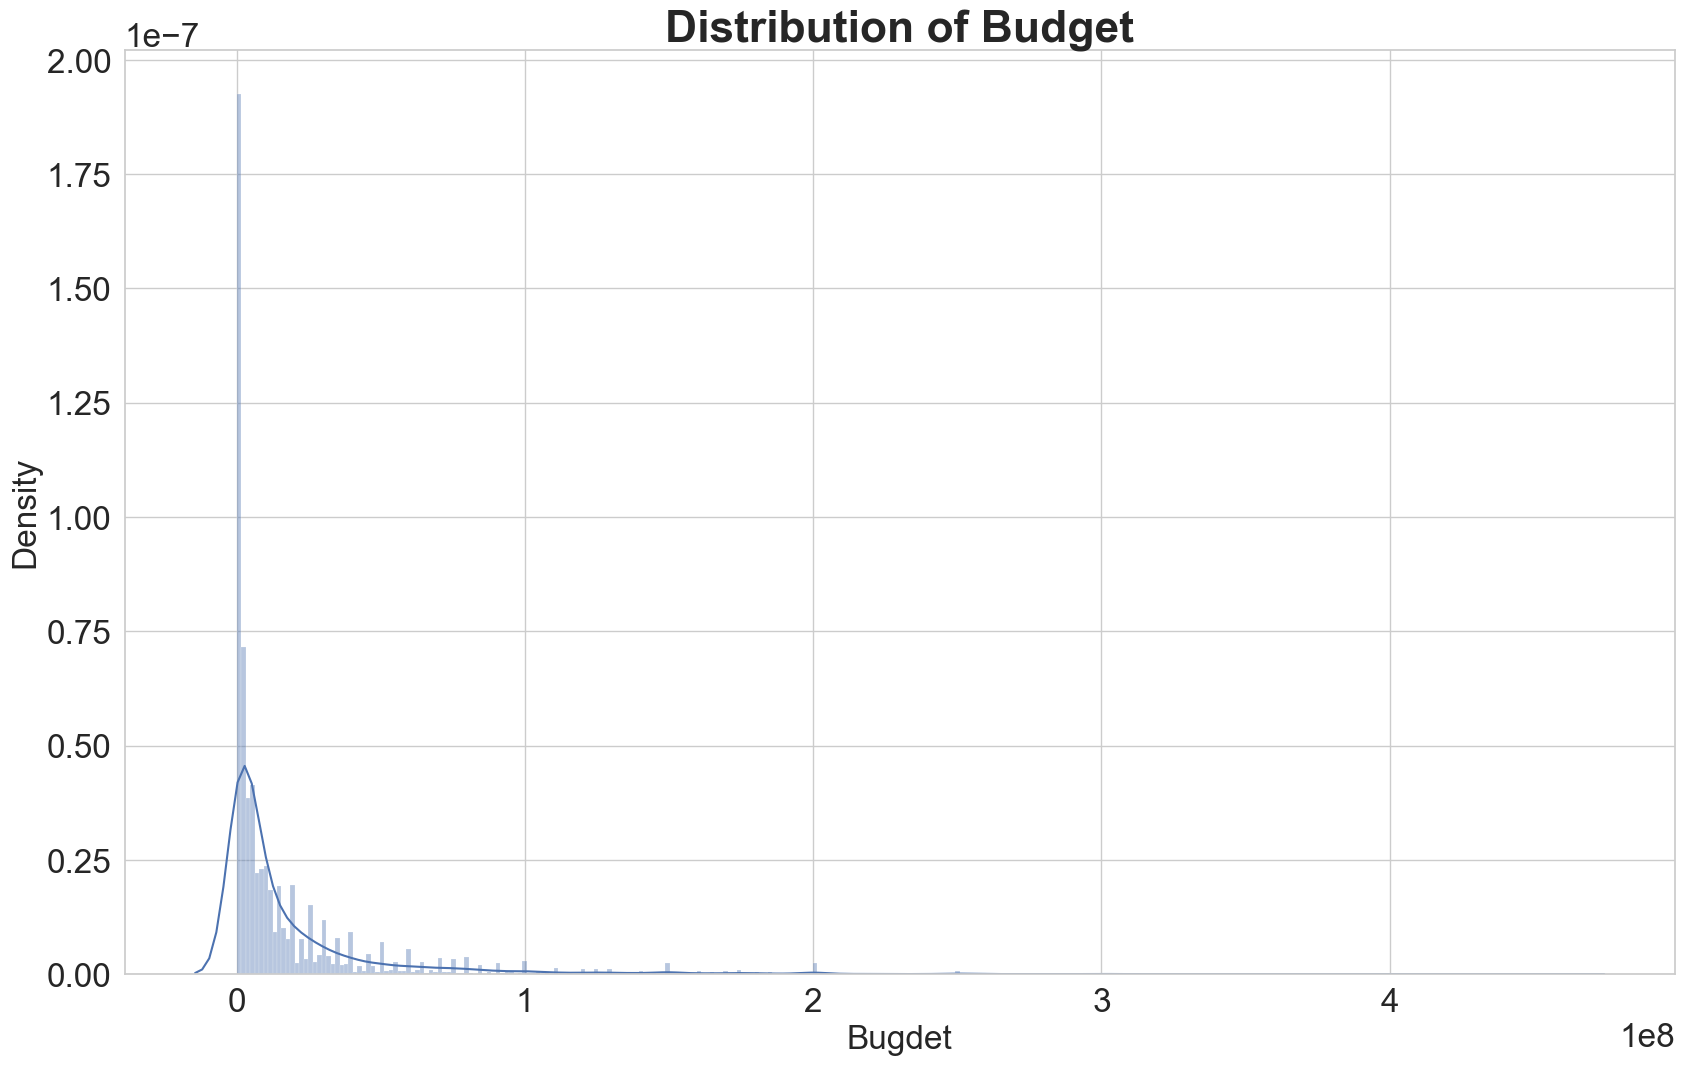

In [89]:
sns.histplot(movies_df[movies_df['budget'].notnull()]['budget'],
             kde=True, stat='density',
             kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )
plt.title('Distribution of Budget')
plt.xlabel('Bugdet')
plt.savefig('image_result/budget_distribution.png')

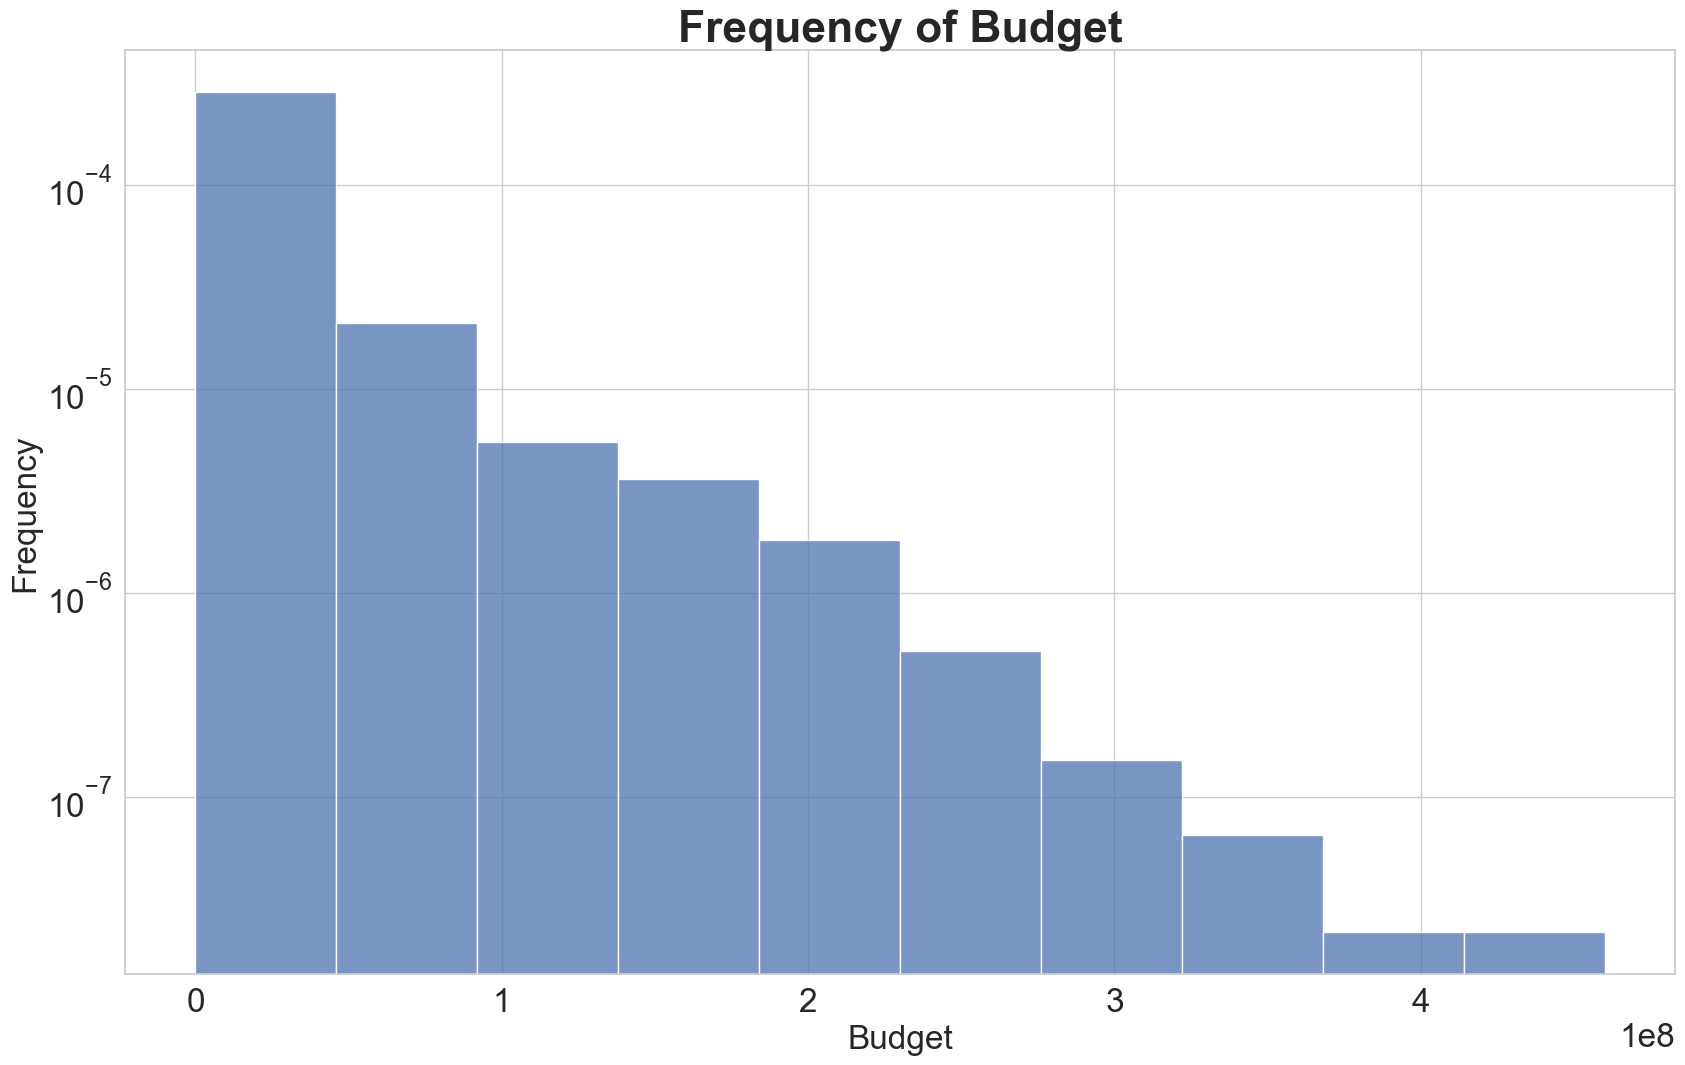

In [90]:
sns.histplot(movies_df['budget'],
             stat='frequency',
             log_scale=(False, True),
             bins=10,
             )
plt.title('Frequency of Budget')
plt.xlabel('Budget')
plt.savefig('image_result/budget_frequency.png')

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 250 million dollars.

#### Most Expensive Movies of all Time

In [91]:
movies_df[movies_df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

title       budget       revenue  \
82613                     Avatar: The Way of Water  460000000.0  2.320250e+09   
16334  Pirates of the Caribbean: On Stranger Tides  379000000.0  1.045700e+09   
24836                      Avengers: Age of Ultron  365000000.0  1.405404e+09   
24845                            Avengers: Endgame  356000000.0  2.800000e+09   
84964                                       Fast X  340000000.0  7.047097e+08   
11558     Pirates of the Caribbean: At World's End  300000000.0  9.610000e+08   
24844                       Avengers: Infinity War  300000000.0  2.052415e+09   
24838                               Justice League  300000000.0  6.579270e+08   
84809                                    The Flash  300000000.0  2.684000e+08   
84524                           The Little Mermaid  297000000.0  5.696000e+08   

         return  year  
82613  5.044022  2022  
16334  2.759103  2011  
24836  3.850421  2015  
24845  7.865169  2019  
84964  2.072675  2023  
11558  3.203333  2007  
24844  6.841383  2018  
24838  2.193090  2017  
84809  0.894667  2023  
84524  1.917845  2023

**Avatar: The Way of Water** film - the sequel to Avatar (2009) and the second installment in the Avatar film series - occupy the top spot in this list with a staggering budget of over **460 million dollars**. All the top 10 most expensive films made a profit on their investment except for **The Flash** which managed to recoup about 90% of its investment, taking in a 264 million dollars on a **300 million dollar** budget.

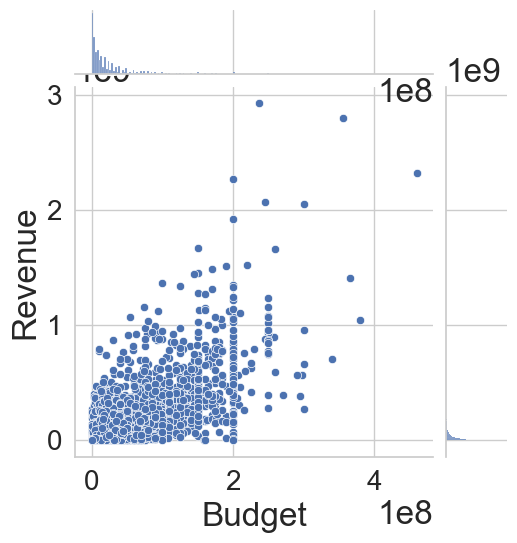

In [92]:
ax = sns.jointplot(x='budget', y='revenue',
              data=movies_df[movies_df['return'].notnull()])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('image_result/budget_revenue_correlation.png')

Two quantities indicates a very strong correlation. 

### Revenue

The revenue is probably the most important numeric quantity associated with a movie. Predict the revenue for movies given a set of features in a later section. The treatment of revenue will be very similar to that of budget and once again will be begun by studying the summary statistics.

In [93]:
movies_df['revenue'].describe()

count    1.323100e+04
mean     5.283674e+07
std      1.386644e+08
min      1.000000e+00
25%      1.199173e+06
50%      8.300000e+06
75%      3.978400e+07
max      2.923706e+09
Name: revenue, dtype: float64

The mean gross of a movie is **52.8 million dollars** whereas the median gross is much lower at **8.3 million dollars**, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is **just 1 dollar** whereas the highest grossing movie of all time has raked in an astonishing *2.92 billion dollars.*

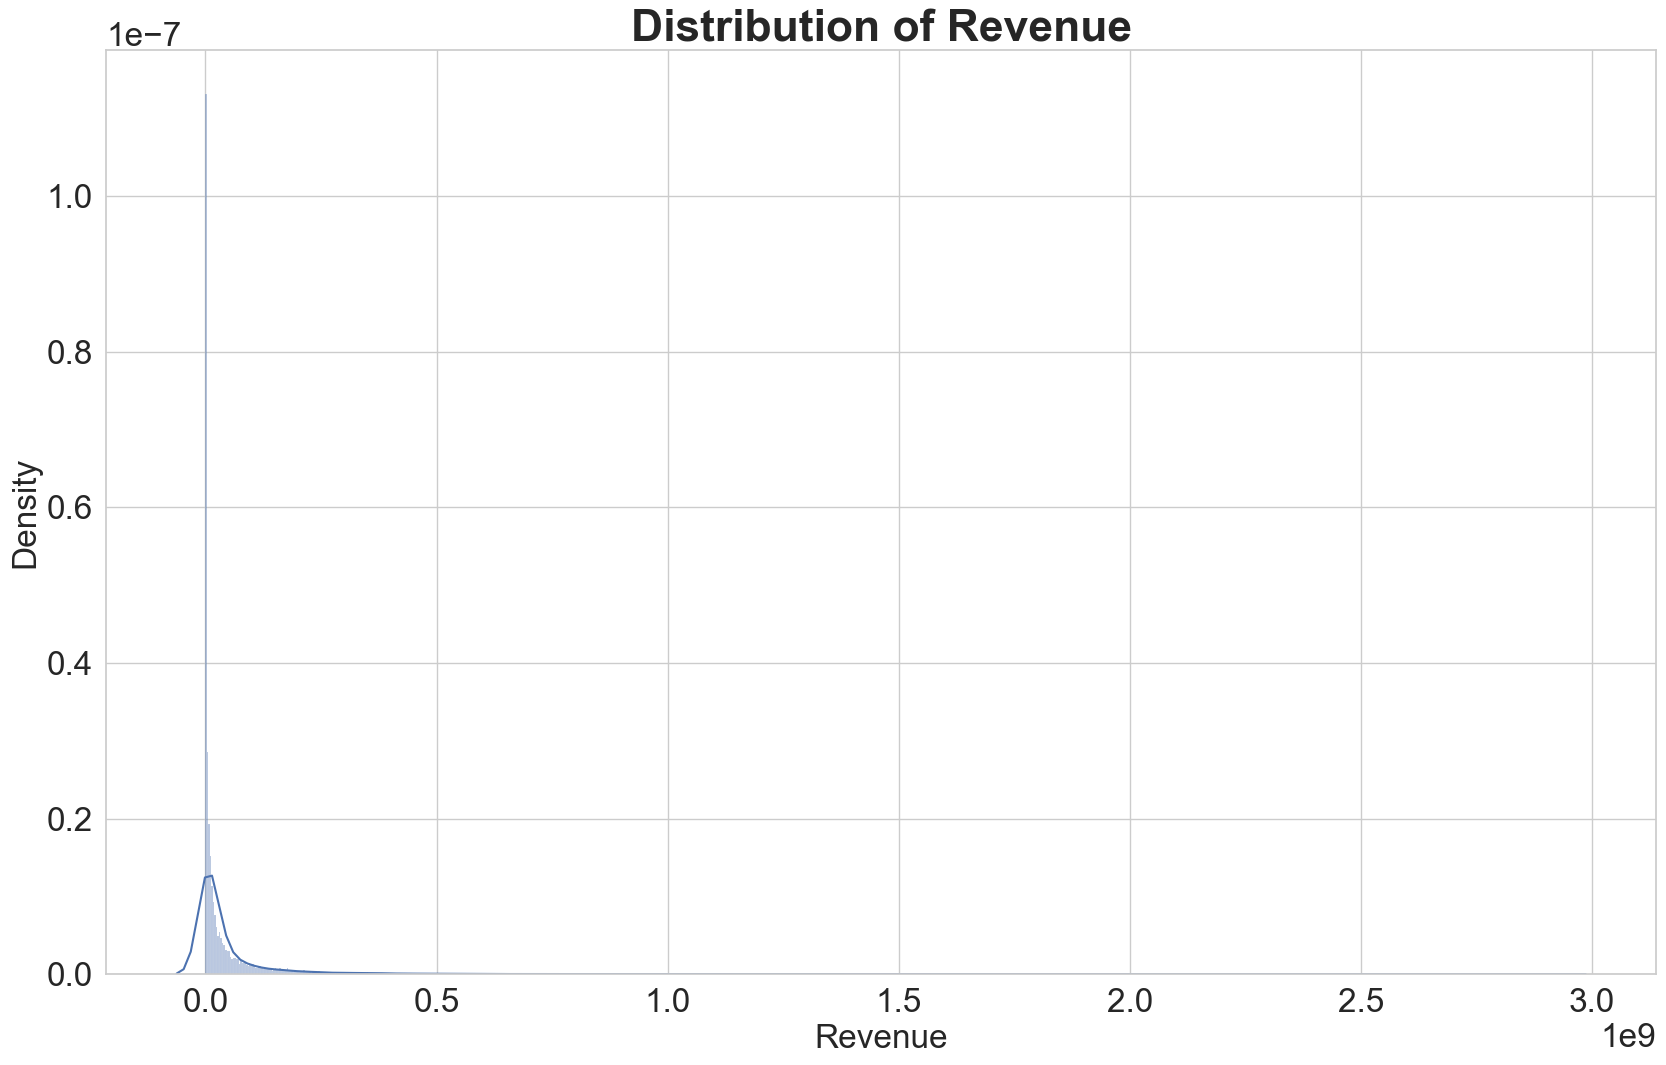

In [94]:
sns.histplot(movies_df[movies_df['revenue'].notnull()]['revenue'],
             kde=True, stat='density',
             kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.savefig('image_result/revenue_distribution.png')

The distribution of revenue undergoes exponential decay just like budget. It is clear that the two quantities were strongly correlated.

#### Highest Grossing Films of All Time

In [95]:
gross_top = movies_df[['title', 'poster_path', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head()
HTML(gross_top.to_html(escape=False))

These figures have not been adjusted for inflation. Therefore, a disproportionate number of movies from very recent times in the top 10 list. To get an understanding of the revenue garnered by movies, plot the maximum revenue through the years.

In [96]:
year_revenue = pd.DataFrame(movies_df[(movies_df['year'].notnull()) & (movies_df['revenue'].notnull())].groupby('year')['revenue'].max())

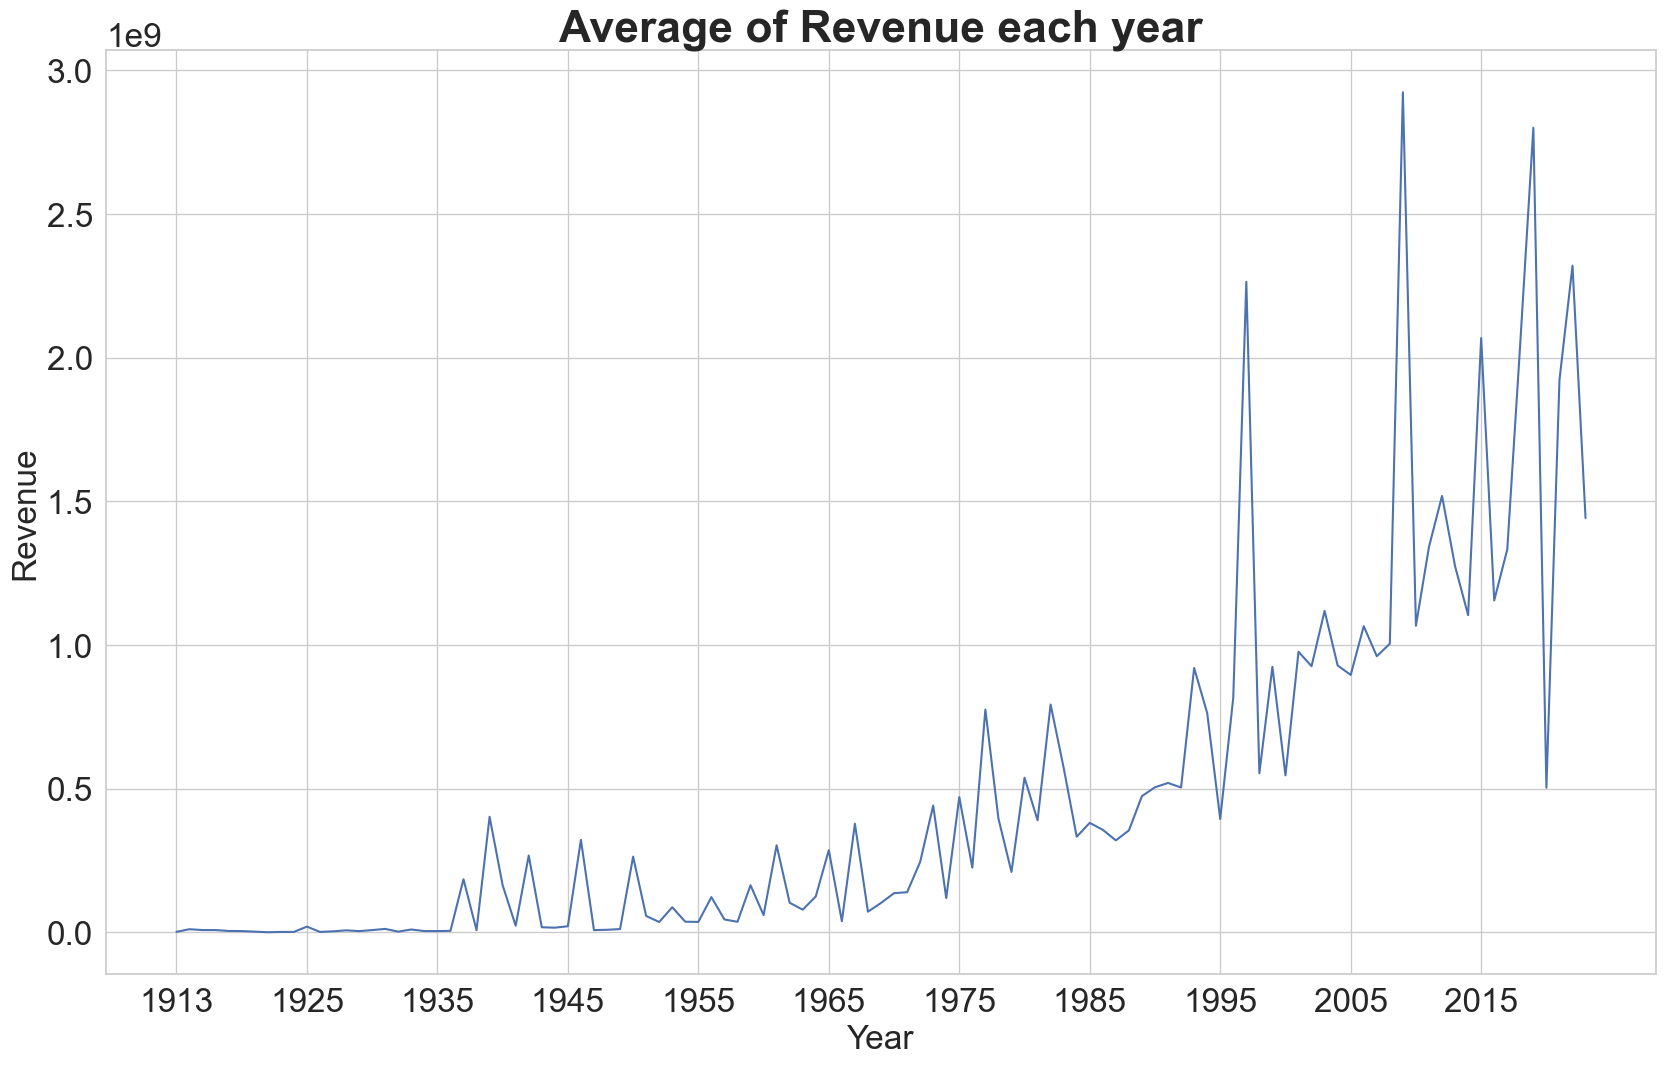

In [97]:
sns.lineplot(x=year_revenue.index, y='revenue',
             data=year_revenue,)
plt.title("Average of Revenue each year")
plt.xticks(year_revenue.index[::10])
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.savefig('image_result/revenue_each_year.png')

As can be seen from the figure, the maximum gross has steadily risen over the years. The world of movies broke the 1 billion dollar mark in 1997 with the release of **Titanic**. It took another few years to break the 2 billion dollar mark with **Avatar**. Both these movies were directed by James Cameron.

### Return

Just check the least and the most successful movies of all time. To do this, only consider those movies which have a budget greater than 5 million dollars.

In [98]:
movies_df[(movies_df['return'].notnull()) & (movies_df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

title      budget      revenue     return  year
1065   E.T. the Extra-Terrestrial  10500000.0  792965500.0  75.520524  1982
257                     Star Wars  11000000.0  775398007.0  70.490728  1977
1343                         Jaws   7000000.0  470653000.0  67.236143  1975
1336                       Grease   6000000.0  396300000.0  66.050000  1978
29654            Jab Tak Hai Jaan   6087315.0  256884693.0  42.200000  2012
835                 The Godfather   6000000.0  245066411.0  40.844402  1972
4495           Look Who's Talking   7500000.0  297000000.0  39.600000  1989
22183                   Annabelle   6500000.0  257047661.0  39.545794  2014
61503                      Ne Zha  20000000.0  742500000.0  37.125000  2019
72906         The Legend of Nezha  20000000.0  742500000.0  37.125000   NaN

#### Worst Box Office Disasters

In [99]:
movies_df[(movies_df['return'].notnull()) & (movies_df['budget'] > 5e6) & (movies_df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

title       budget  \
82490                                        White Noise  100000000.0   
31014                                    Accidental Love   26000000.0   
77348                                         Red Notice  160000000.0   
23758                                         Foodfight!   65000000.0   
72307                                     Space Sweepers   21000000.0   
68200  The Tulse Luper Suitcases, Part 3: From Sark t...   10000000.0   
39703                                          Term Life   16500000.0   
3969                                         Cherry 2000   10000000.0   
20442                                         Twice Born   13000000.0   
80882                                               Hunt   17000000.0   

        revenue    return  year  
82490   71476.0  0.000715  2022  
31014   24487.0  0.000942  2015  
77348  178143.0  0.001113  2021  
23758   73706.0  0.001134  2012  
72307   24571.0  0.001170  2021  
68200   12000.0  0.001200  2004  
39703   21256.0  0.001288  2016  
3969    14000.0  0.001400  1987  
20442   18295.0  0.001407  2012  
80882   25994.0  0.001529  2022

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\144796080.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



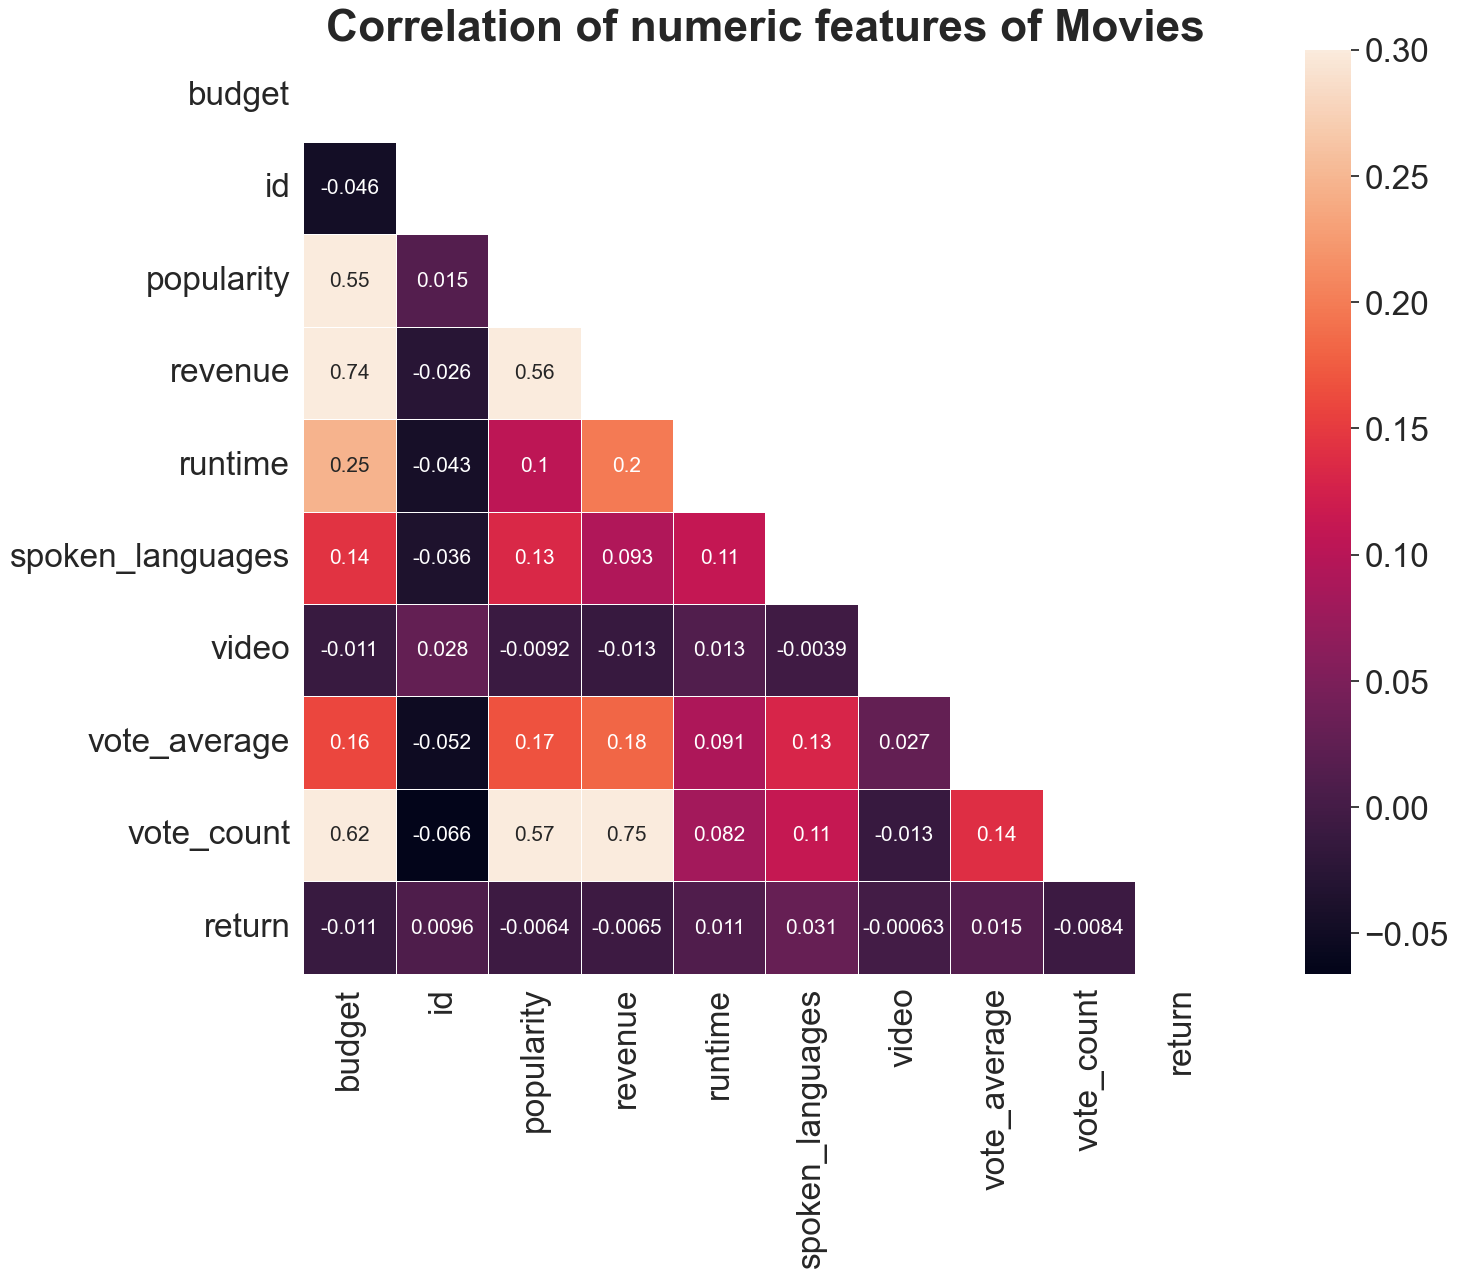

In [100]:
corr = movies_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,
                     vmax=.3,
                     square=True,
                     annot=True,
                     annot_kws={'size': 15},
                     linewidths=.5)
plt.title("Correlation of numeric features of Movies")
plt.savefig('image_result/movies_corr_heatmap.png')

### Genres

In [101]:
movies_df['genres'] =  movies_df['genres'].apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [102]:
stack_genres = movies_df.apply(lambda x: pd.Series(x['genres']), axis=1).stack().reset_index(level=1, drop=True)

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\443100161.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [103]:
stack_genres.name = 'genre'
genres_df = movies_df.drop('genres', axis=1).join(stack_genres)

In [104]:
genres_df['genre'].value_counts().shape[0]

19

In [105]:
popular_genres = pd.DataFrame(genres_df['genre'].value_counts()).reset_index()
popular_genres.columns = ['genre', 'no. movies']
popular_genres.head(15)

genre  no. movies
0             Drama       36289
1            Comedy       25164
2          Thriller       13057
3           Romance       12195
4            Action       10403
5       Documentary        9719
6            Horror        9455
7             Crime        8397
8         Adventure        6116
9            Family        5320
10  Science Fiction        5224
11          Mystery        4964
12        Animation        4879
13          Fantasy        4652
14         TV Movie        4380

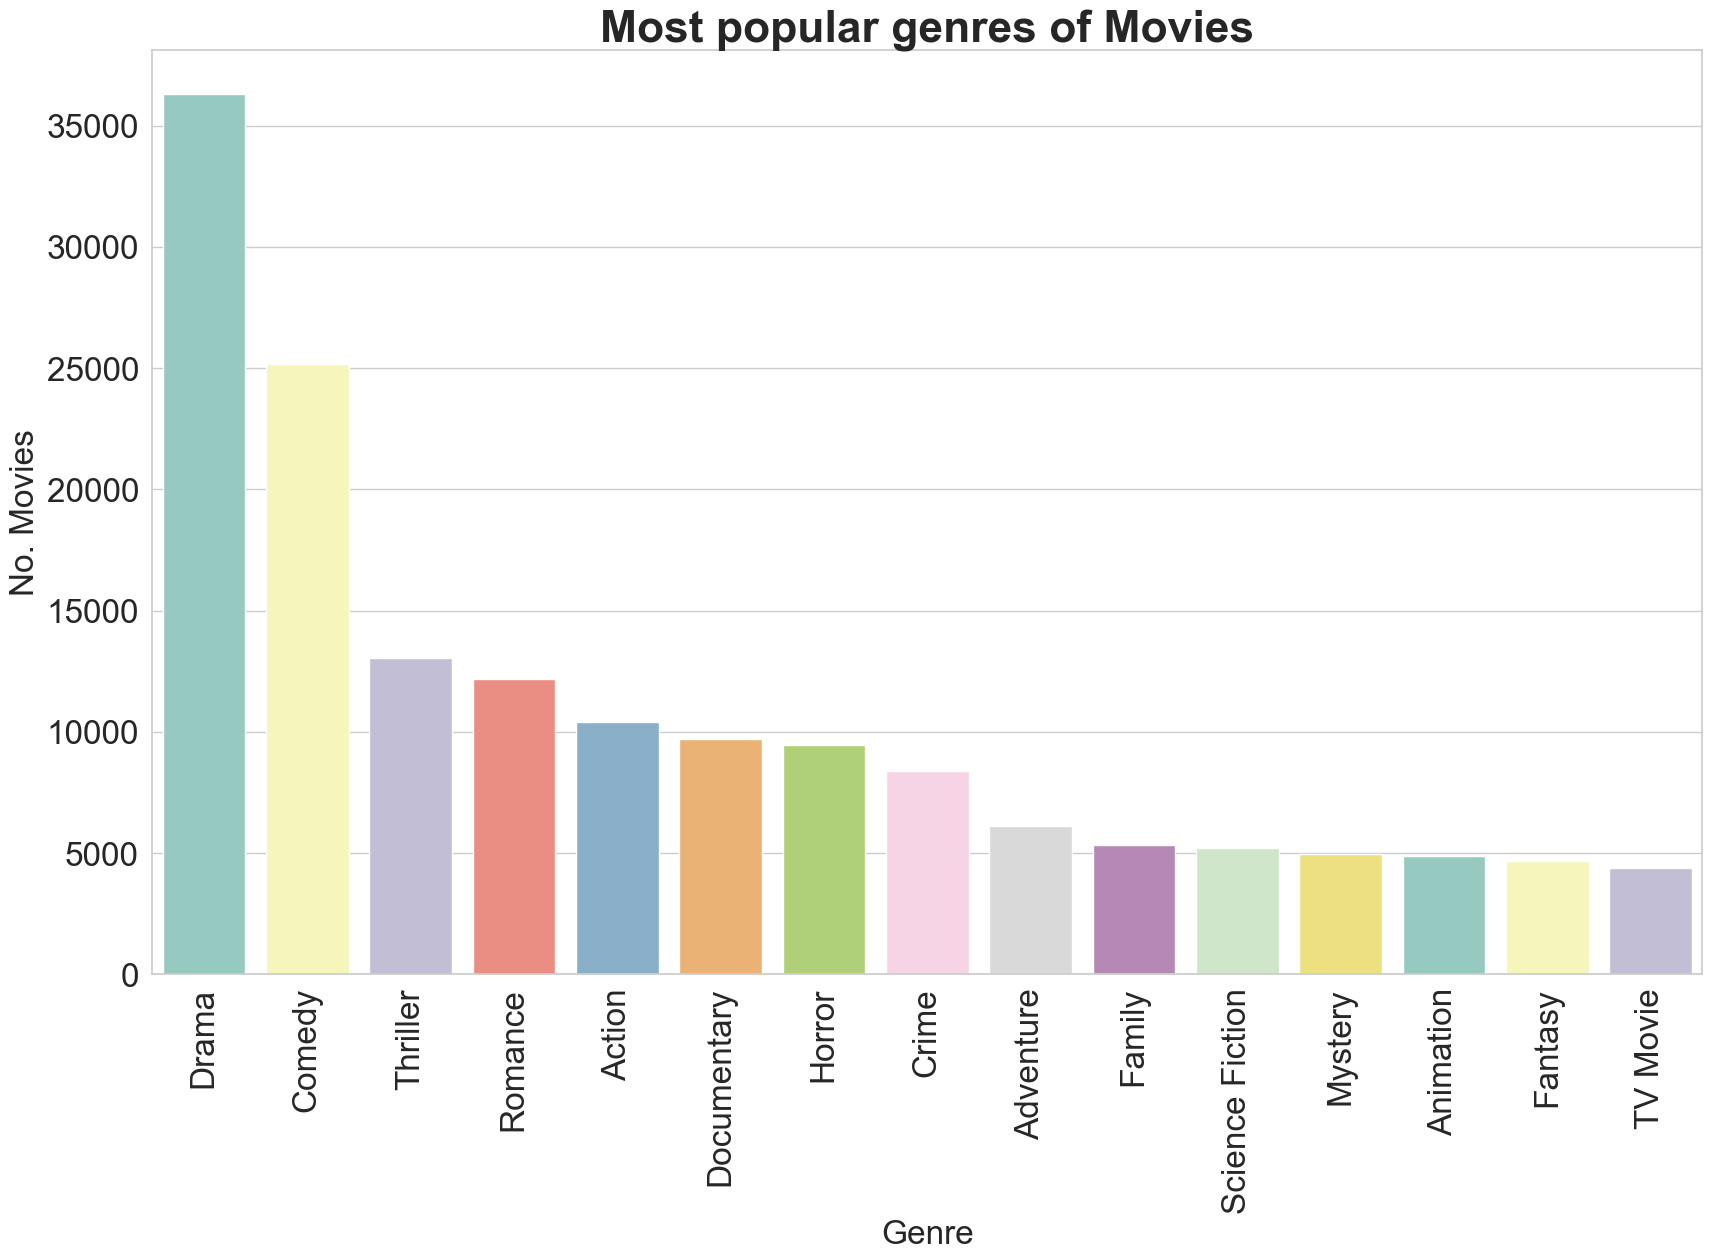

In [106]:
sns.barplot(x='genre', y='no. movies',
            data=popular_genres.head(15),
            palette='Set3')
plt.title("Most popular genres of Movies")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('No. Movies')
plt.savefig('image_result/popular_genres.png')

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with more than 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Thriller, Romance, Action, Documentary, Horror, Crime, Adventure, Family.

The next question to answer is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased? Do certain years have a disproportionate share of Animation Movies?

Only look at trends starting 2000 and consider only those themes that appear in the top 10 most popular genres. Exclude Documentaries, Family and Foreign Movies from our analysis.

In [107]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Animation', 'Fantasy', 'TV Movie']

In [108]:
genres_df['year'] = genres_df['year'].apply(clean_numeric).astype('Int64')
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172744 entries, 0 to 85430
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   belongs_to_collection  21593 non-null   object 
 1   budget                 35287 non-null   float64
 2   homepage               36551 non-null   object 
 3   id                     172744 non-null  int64  
 4   original_language      172744 non-null  object 
 5   overview               172744 non-null  object 
 6   popularity             172744 non-null  float64
 7   poster_path            169913 non-null  object 
 8   production_companies   172744 non-null  object 
 9   production_countries   172744 non-null  object 
 10  release_date           172664 non-null  object 
 11  revenue                32517 non-null   float64
 12  runtime                172744 non-null  float64
 13  spoken_languages       172744 non-null  int64  
 14  status                 172744 non-nul

In [109]:
pop_gen_movies = genres_df[(genres_df['genre'].isin(genres)) & (genres_df['year'] >= 2000)]

In [110]:
ctab = pd.crosstab(index=[pop_gen_movies['year']], columns=pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab.index.astype('Int64')
ctab

genre    Action  Adventure  Animation    Comedy     Crime     Drama   Fantasy  \
year                                                                            
2000   0.067574   0.034030   0.030627  0.179387  0.055421  0.250365  0.035002   
2001   0.088532   0.036239   0.029817  0.161927  0.057798  0.256422  0.032110   
2002   0.081370   0.038544   0.028694  0.165310  0.059101  0.265525  0.025696   
2003   0.084229   0.046147   0.030914  0.172491  0.055108  0.254480  0.024194   
2004   0.077328   0.043725   0.025911  0.174899  0.048988  0.263968  0.032389   
2005   0.070681   0.032909   0.026178  0.178384  0.053478  0.264772  0.030666   
2006   0.066193   0.037456   0.035195  0.168550  0.049080  0.253148  0.030675   
2007   0.070991   0.034272   0.031518  0.162179  0.052938  0.259486  0.029070   
2008   0.084889   0.044250   0.030102  0.165864  0.049669  0.251656  0.030403   
2009   0.070225   0.041292   0.026966  0.167135  0.046910  0.259270  0.030899   
2010   0.076266   0.040047   0.038869  0.171378  0.047703  0.247939  0.034158   
2011   0.079716   0.037447   0.035745  0.170496  0.041702  0.266099  0.034043   
2012   0.070334   0.035851   0.035304  0.184182  0.044882  0.255337  0.033935   
2013   0.066601   0.037953   0.033301  0.171156  0.050196  0.267875  0.031097   
2014   0.066253   0.038334   0.028363  0.180368  0.046532  0.260802  0.026811   
2015   0.063769   0.037113   0.029936  0.169777  0.044905  0.255895  0.031167   
2016   0.066247   0.037350   0.028504  0.167682  0.044034  0.248477  0.028307   
2017   0.068567   0.035247   0.030817  0.163713  0.048729  0.248459  0.032357   
2018   0.066461   0.036409   0.026970  0.167212  0.048931  0.254479  0.034868   
2019   0.063063   0.036446   0.036650  0.156429  0.049754  0.257371  0.031941   
2020   0.058372   0.028162   0.032258  0.166923  0.038146  0.233487  0.039427   
2021   0.063093   0.034368   0.038215  0.151064  0.053860  0.230572  0.035907   
2022   0.073295   0.037216   0.029261  0.178977  0.050852  0.217045  0.034943   
2023   0.096170   0.044255   0.021277  0.173617  0.046809  0.222128  0.037447   
2024   0.000000   0.000000   0.066667  0.133333  0.000000  0.266667  0.066667   

genre    Horror   Mystery   Romance  Science Fiction  TV Movie  Thriller  
year                                                                      
2000   0.048614  0.030627  0.106952         0.027224  0.046670  0.087506  
2001   0.045872  0.031193  0.100000         0.036239  0.038532  0.085321  
2002   0.046253  0.034690  0.085653         0.034261  0.035118  0.099786  
2003   0.044355  0.028226  0.086918         0.037186  0.043011  0.092742  
2004   0.058300  0.030769  0.097976         0.029555  0.034008  0.082186  
2005   0.058714  0.035153  0.093493         0.032162  0.035153  0.088257  
2006   0.074265  0.032935  0.084598         0.031966  0.033904  0.102034  
2007   0.076193  0.036720  0.087209         0.029988  0.030906  0.098531  
2008   0.070741  0.030704  0.078266         0.034317  0.028597  0.100542  
2009   0.066854  0.035955  0.084551         0.032584  0.028371  0.108989  
2010   0.066254  0.031508  0.085100         0.034452  0.025618  0.100707  
2011   0.065532  0.031489  0.076028         0.036028  0.028936  0.096738  
2012   0.068692  0.027915  0.082649         0.036398  0.027094  0.097427  
2013   0.065867  0.032076  0.075416         0.037463  0.026200  0.104799  
2014   0.075116  0.029692  0.076003         0.038334  0.027698  0.105695  
2015   0.078942  0.033832  0.075046         0.043264  0.034652  0.101702  
2016   0.075880  0.039906  0.078042         0.040692  0.035581  0.109298  
2017   0.077042  0.038521  0.069723         0.041795  0.037750  0.107280  
2018   0.076286  0.036409  0.069929         0.041033  0.032171  0.108842  
2019   0.081695  0.033170  0.069615         0.036855  0.038084  0.108927  
2020   0.101126  0.035074  0.083973         0.039171  0.037378  0.106503  
2021   0.089767  0.035137  0.073352         0.044883  0.037189  0.112593  
2022   0.085

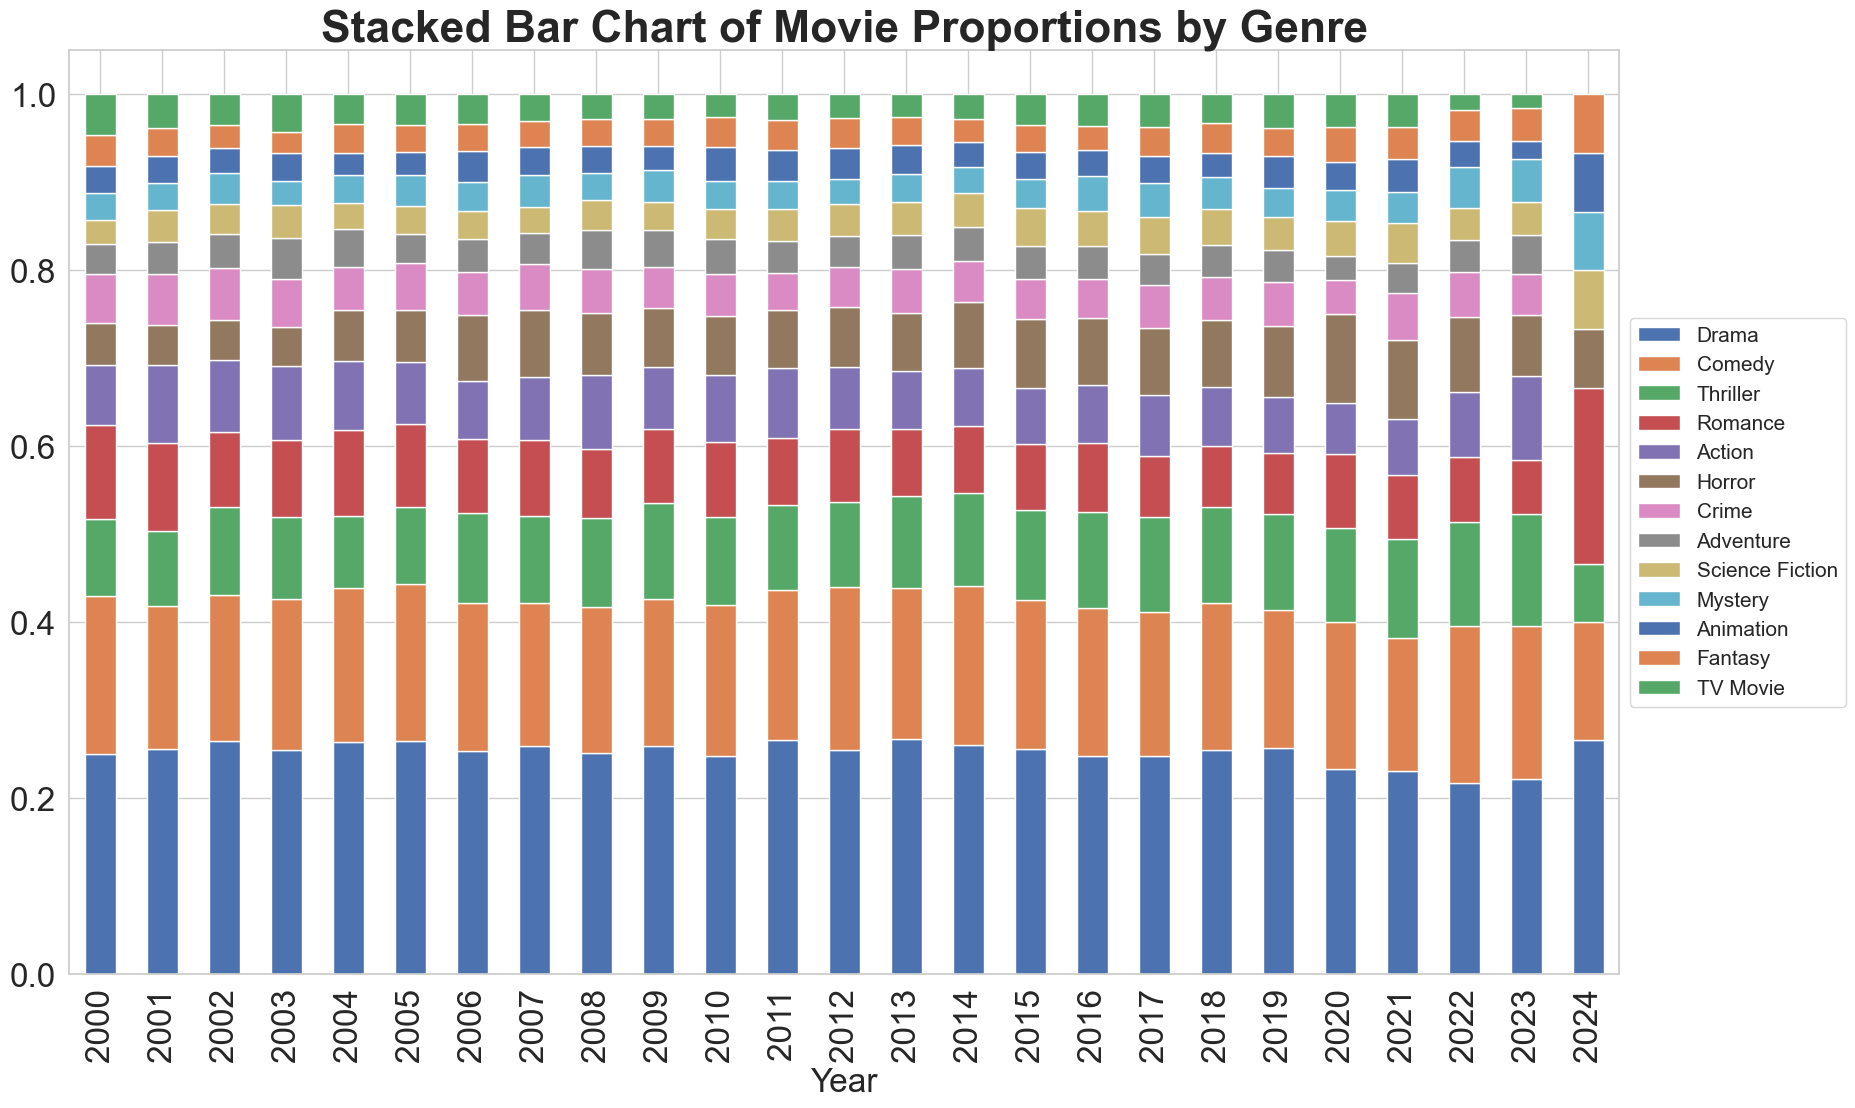

In [111]:
ctab[genres].plot(kind='bar',
                  stacked=True,).legend(loc='center left',
                                        bbox_to_anchor=(1, 0.5),
                                        fontsize=15)
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.xlabel('Year')
plt.savefig('image_result/movie_proportion_bar.png')

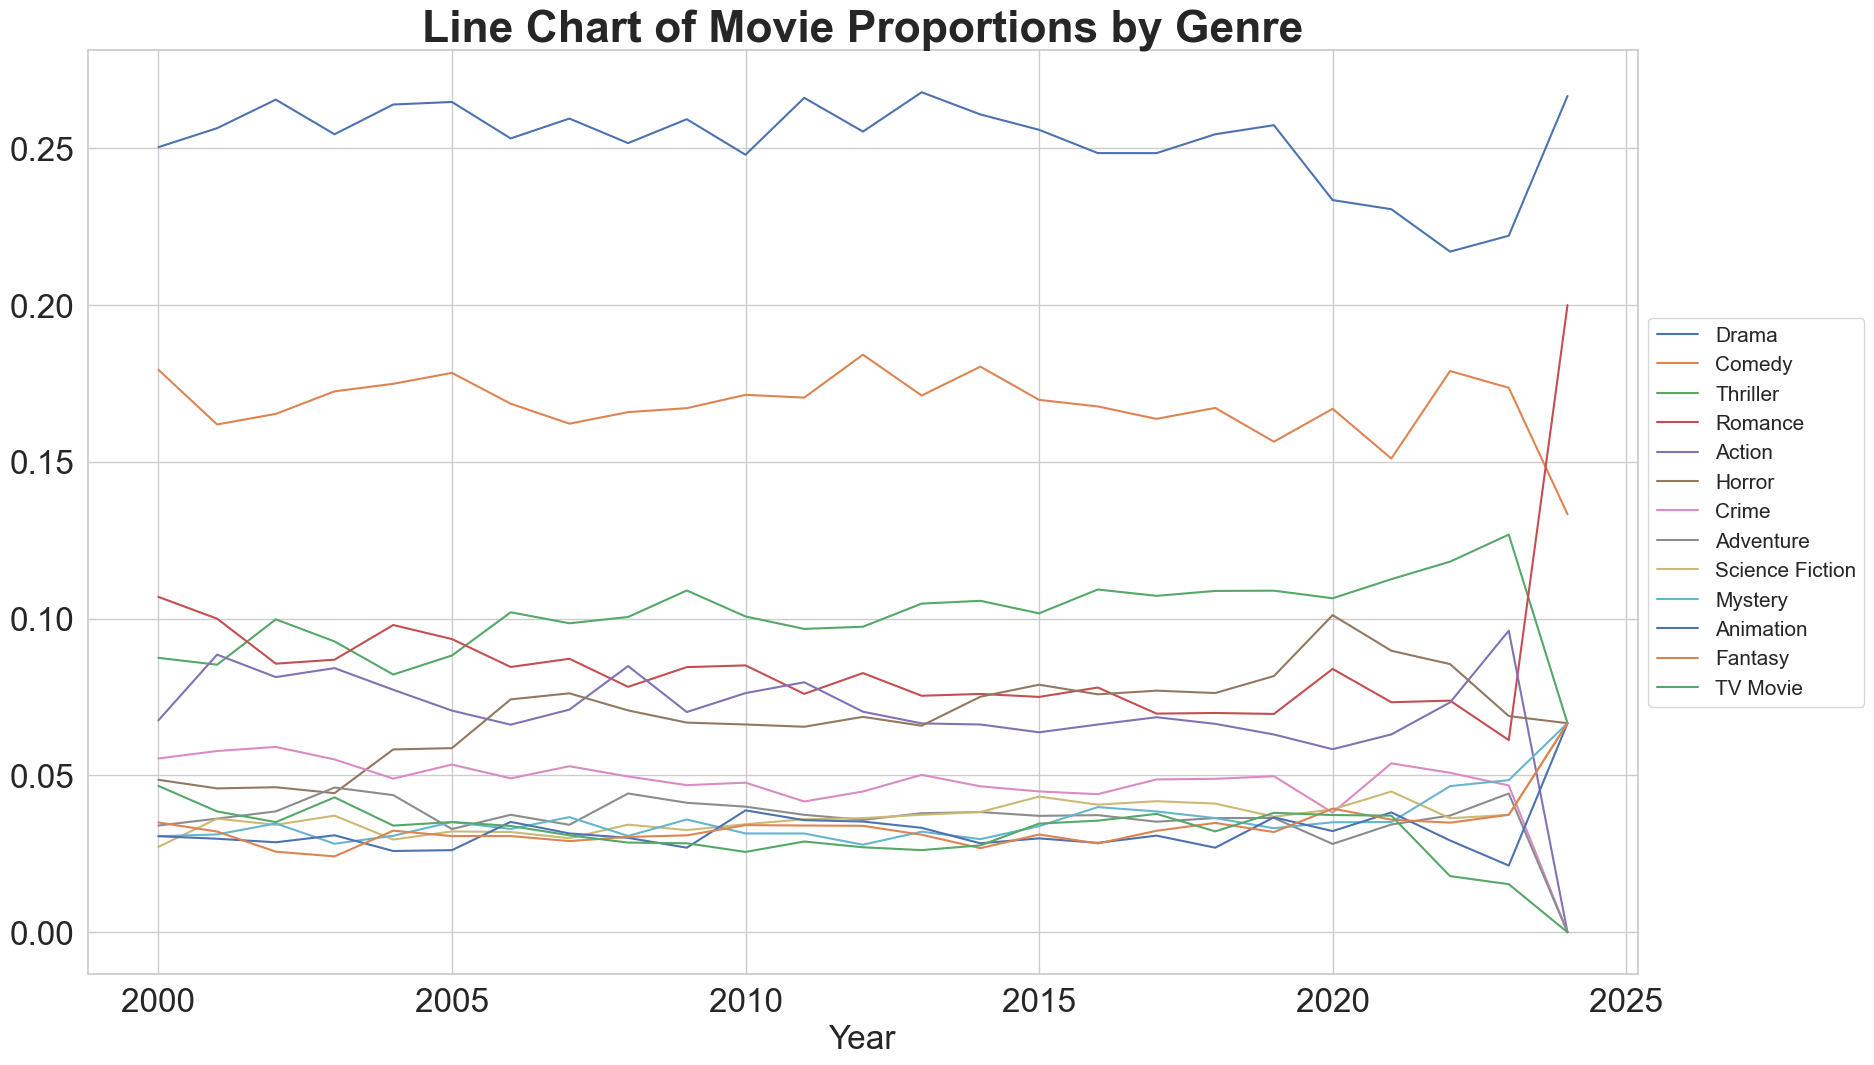

In [112]:
ctab[genres].plot(kind='line',
                  stacked=False,).legend(loc='center left',
                                        bbox_to_anchor=(1, 0.5),
                                        fontsize=15)
plt.title("Line Chart of Movie Proportions by Genre")
plt.xlabel('Year')
plt.savefig('image_result/movie_proportion_line.png')

The proportion of movies of each genre has remained fairly constant since the beginning of this century except for **Drama**. The proportion of drama films has fallen by over 5%.  **Romance** movies have enjoyed a astonishing increase in their share. 

One question that if some genres are particularly more successful than others. For example, Science Fiction and Fantasy Movies should be expected to bring in more revenue than other genres but when normalized with their budget, do they prove to be as successful?

Visualize two violin plots to answer this question. One will be genres versus the revenue while the other will be versus returns.

In [113]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Mystery', 'Animation', 'Fantasy']
violin_movies = genres_df[genres_df['genre'].isin(violin_genres)]

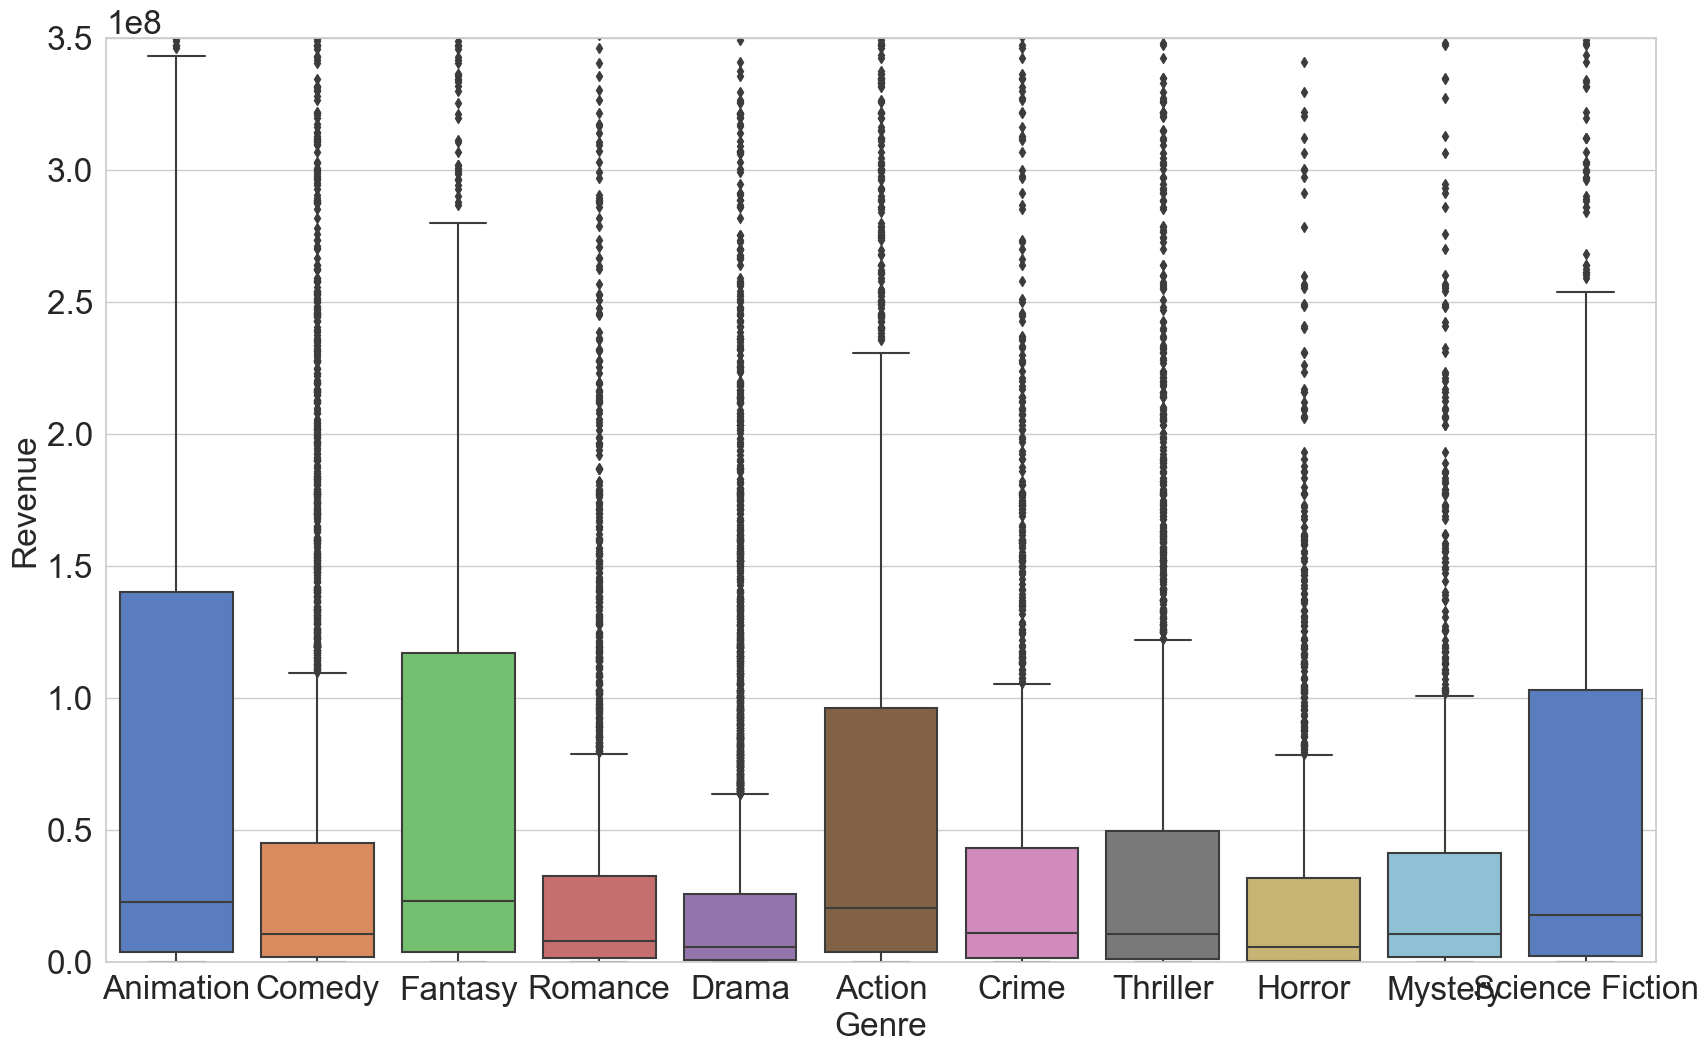

In [114]:
ax = sns.boxplot(x='genre', y='revenue',
            data=violin_movies,
            palette='muted')
ax.set_ylim((0, 0.35e9))
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.savefig('image_result/genre_revenue_boxplot.png')

**Animation** movies has the largest 25-75 range as well as the median revenue among all the genres plotted. **Fantasy** and **Science Fiction** have the second and third highest median revenue respectively. 

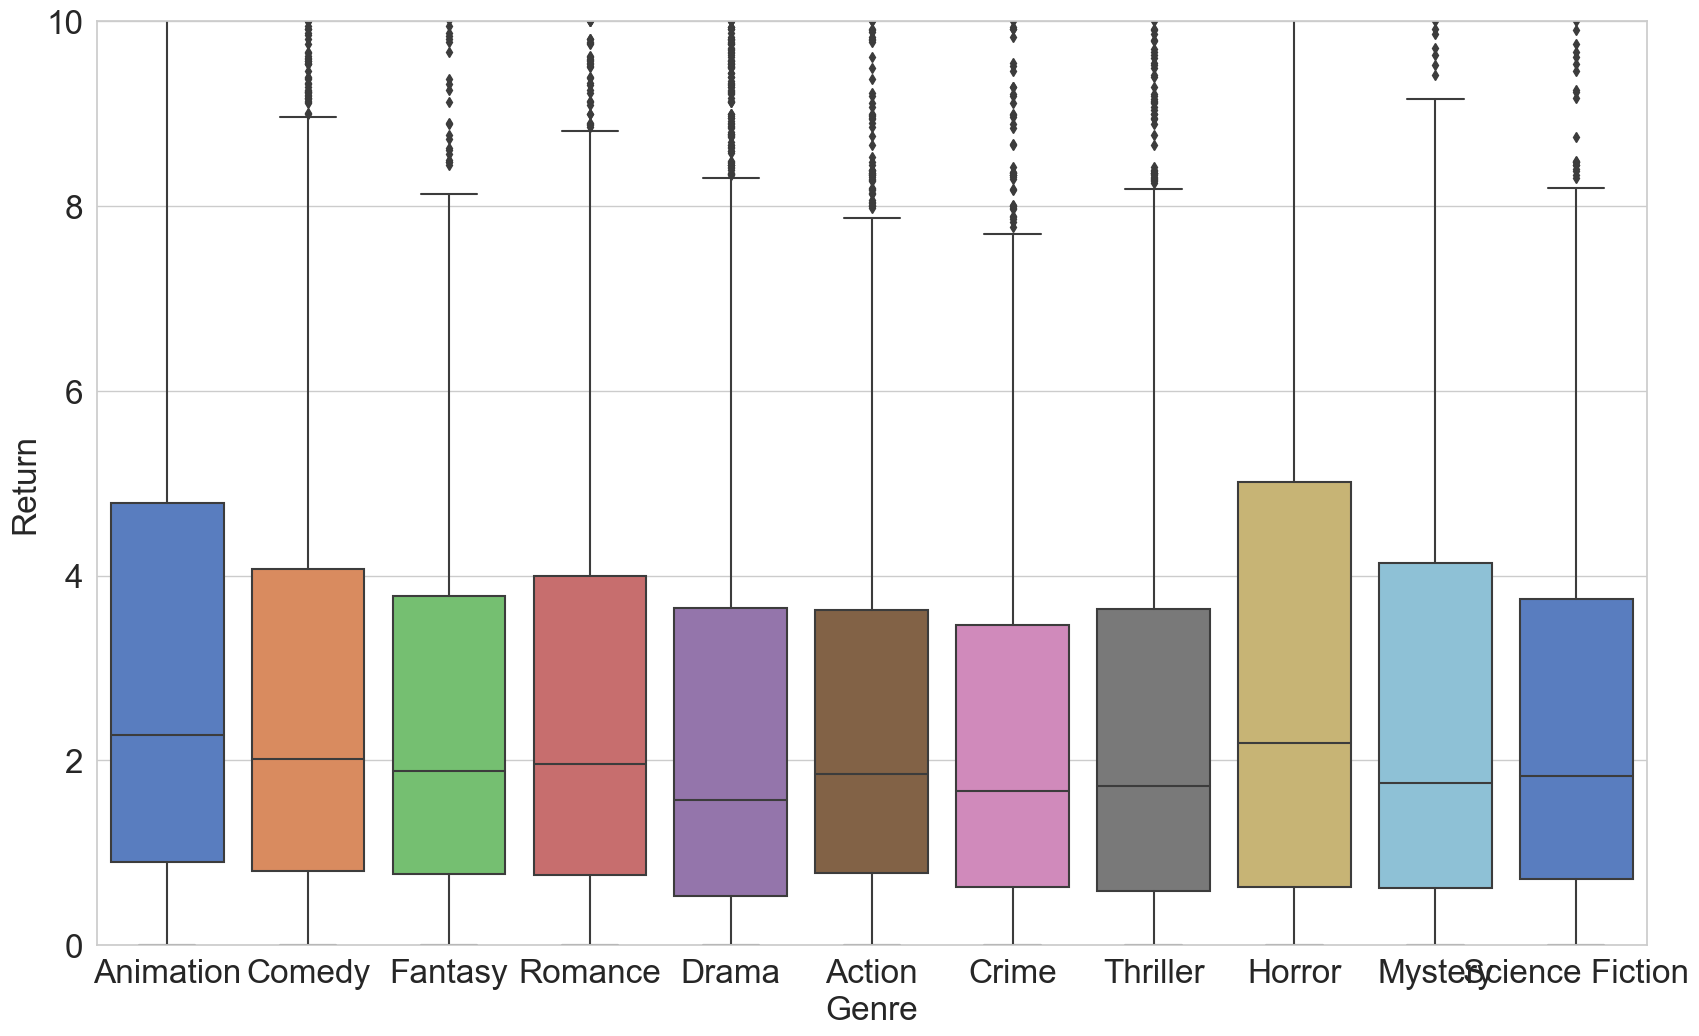

In [115]:
ax = sns.boxplot(x='genre', y='return',
            data=violin_movies,
            palette='muted')
ax.set_ylim((0, 10))
plt.xlabel('Genre')
plt.ylabel('Return')
plt.savefig('image_result/genre_return_boxplot.png')

From the boxplot, it seems like **Horror** Movies tend to yield the highest returns on average. This is partially due to the nature of Horror movies being low budget compared to Fantasy Movies but being capable of generating very high revenues relative to its budget.

### Cast and Crew

Now take a look at the cast and crew of movies in a separate file consisting of the full cast and crew credits of all the Movielens Movies.

In [116]:
credits_df = pd.read_csv('data/credits.csv')
credits_df.head()

id                                               cast  \
0    862  [{'adult': False, 'gender': 2, 'id': 31, 'know...   
1   8844  [{'adult': False, 'gender': 2, 'id': 2157, 'kn...   
2  15602  [{'adult': False, 'gender': 2, 'id': 6837, 'kn...   
3  31357  [{'adult': False, 'gender': 1, 'id': 8851, 'kn...   
4  11862  [{'adult': False, 'gender': 2, 'id': 67773, 'k...   

                                                crew  
0  [{'adult': False, 'gender': 2, 'id': 7, 'known...  
1  [{'adult': False, 'gender': 2, 'id': 511, 'kno...  
2  [{'adult': False, 'gender': 2, 'id': 3117, 'kn...  
3  [{'adult': False, 'gender': 2, 'id': 2178, 'kn...  
4  [{'adult': False, 'gender': 2, 'id': 37, 'know...

#### Credits Dataset

1. **id:** The TMDB ID of movie.

2. **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.

3. **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.

Perform a left join of original movies metadata dataframe with the credits dataframe on the TMDB Movie ID.

Before being able to perform this join, make sure that the ID column of movies dataframe is clean and of type integer. To do this, let try to perform an integer conversion of IDs and if an exception is raised, replace the ID with NaN. Then proceed to drop these rows from dataframe.

In [117]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [118]:
movies_df['id'] = movies_df['id'].apply(convert_int)

In [119]:
movies_df[movies_df['id'].isnull()]

Empty DataFrame
Columns: [belongs_to_collection, budget, genres, homepage, id, original_language, overview, popularity, poster_path, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, video, vote_average, vote_count, return, year, month, day]
Index: []

[0 rows x 25 columns]

There is an unexpected increase of the number of rows after using dataframe.merge.

It basically turns out in the credits_df dataframe there are duplicate values of id. Then all these duplicated values have to be dropped out.

In [120]:
credits_df.drop_duplicates('id', inplace=True)

In [121]:
movies_df = movies_df.merge(credits_df, on='id', how='left')

In [122]:
movies_df['cast'] = movies_df['cast'].apply(ast.literal_eval)
movies_df['crew'] = movies_df['crew'].apply(ast.literal_eval)

In [123]:
movies_df['cast_size'] = movies_df['cast'].apply(lambda x: len(x))
movies_df['crew_size'] = movies_df['crew'].apply(lambda x: len(x))

In [124]:
movies_df['cast'] = movies_df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [125]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    
    return np.nan

In [126]:
movies_df['director'] = movies_df['crew'].apply(get_director)

In [127]:
stack_casts = movies_df.apply(lambda x: pd.Series(x['cast']), axis=1).stack().reset_index(level=1, drop=True)
stack_casts.name = 'casts'
casts_df = movies_df.drop('cast', axis=1).join(stack_casts)

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\952521093.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [128]:
casts_df.head(10)

belongs_to_collection      budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   

                                   genres  \
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   
0  [Animation, Adventure, Family, Comedy]   

                               homepage   id original_language  \
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   
0  http://toystory.disney.com/toy-story  862                en   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   
0  Led by Woody, Andy's toys live happily in his ...     106.902   

                                         poster_path production_companies  \
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   
0  <img src='https://image.tmdb.org/t/p/w500/uXDf...              [Pixar]   

   ... vote_count     return  year  month  day  \
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17351.0  13.146667  1995    Oct  Mon   
0  ...    17

#### Casts with the Highest Total Revenue

In [129]:
high_rev_casts = pd.DataFrame(casts_df.groupby('casts')['revenue'].sum().sort_values(ascending=False))

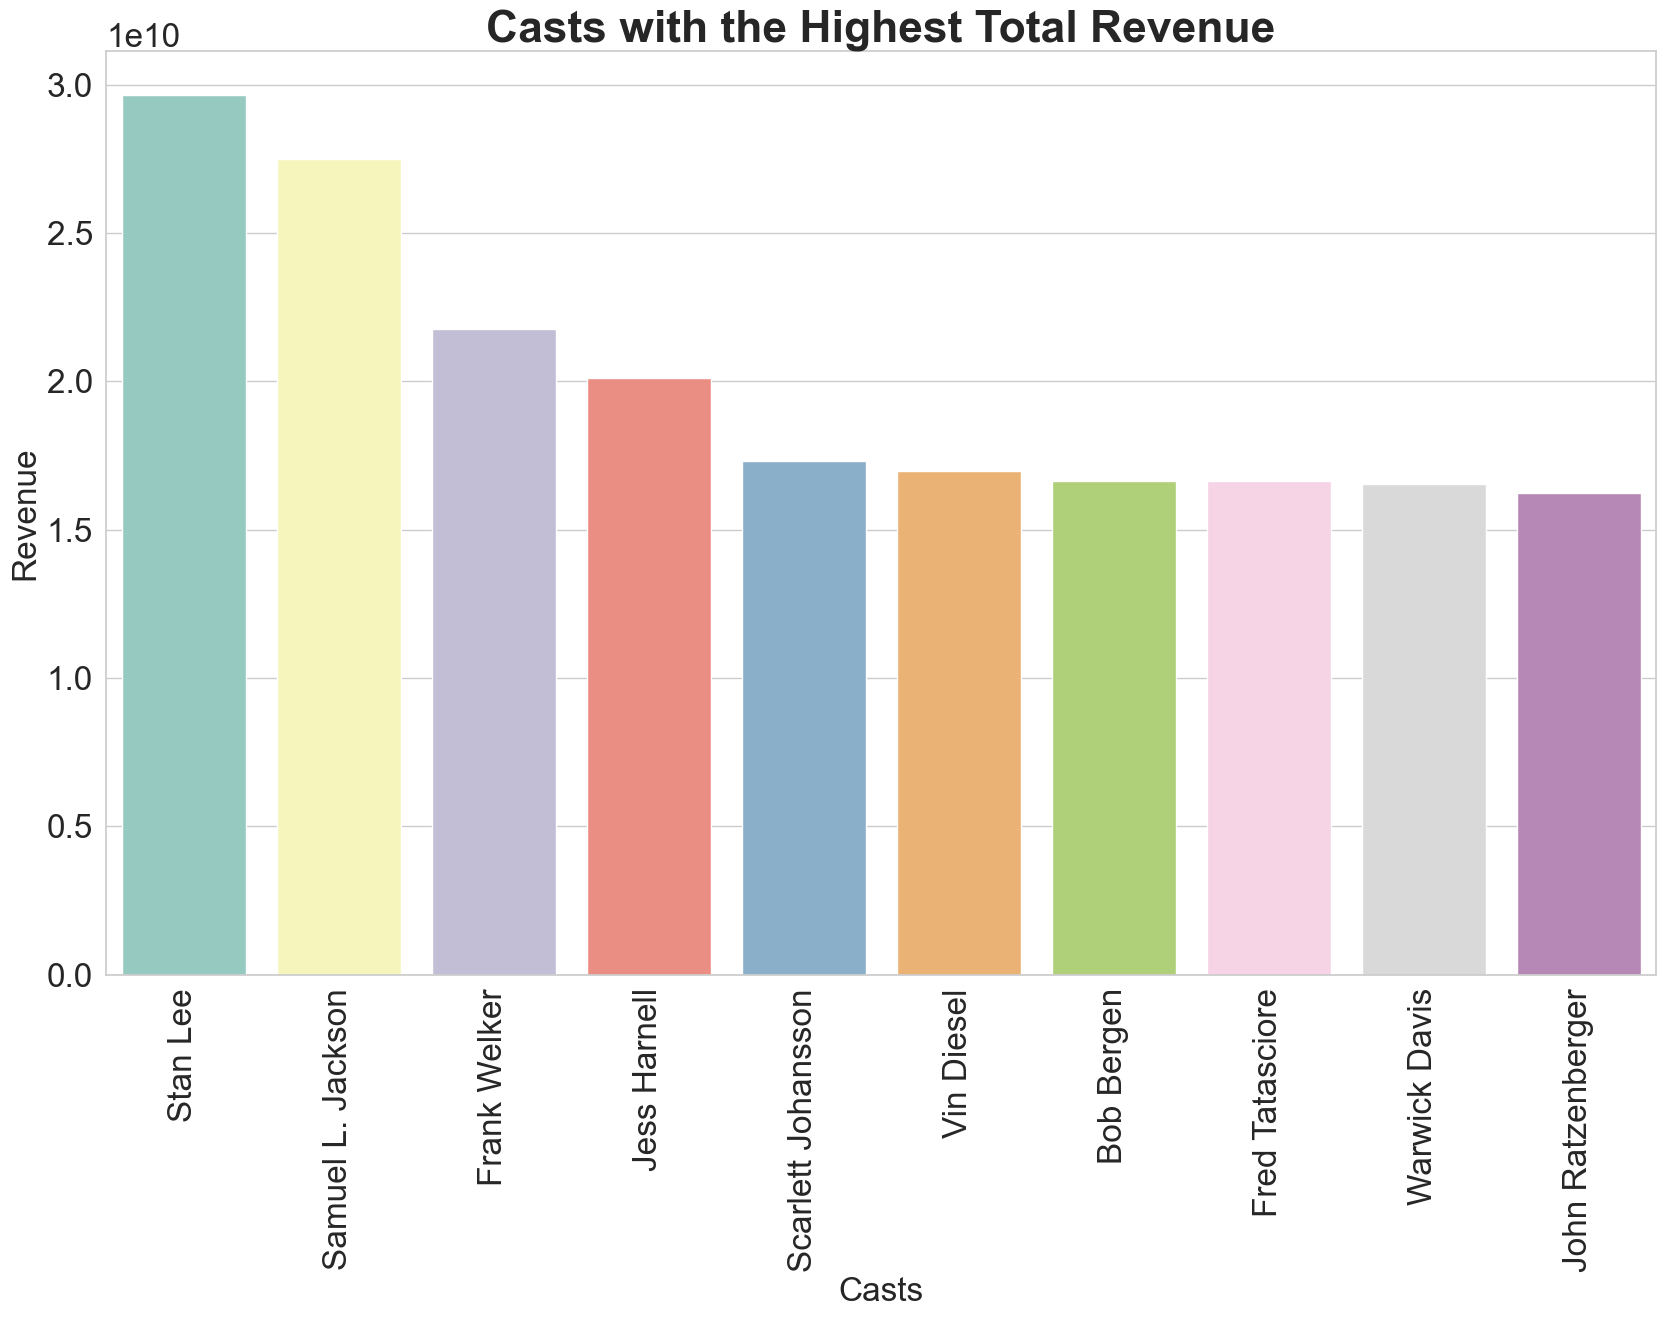

In [130]:
sns.barplot(x=high_rev_casts.head(10).index, y='revenue',
            data=high_rev_casts.head(10),
            palette='Set3')
plt.title('Casts with the Highest Total Revenue')
plt.xlabel('Casts')
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.savefig('image_result/high_revenue_casts.png')

#### Directors with the Highest Total Revenue

In [131]:
high_rev_directors = pd.DataFrame(movies_df.groupby('director')['revenue'].sum().sort_values(ascending=False))

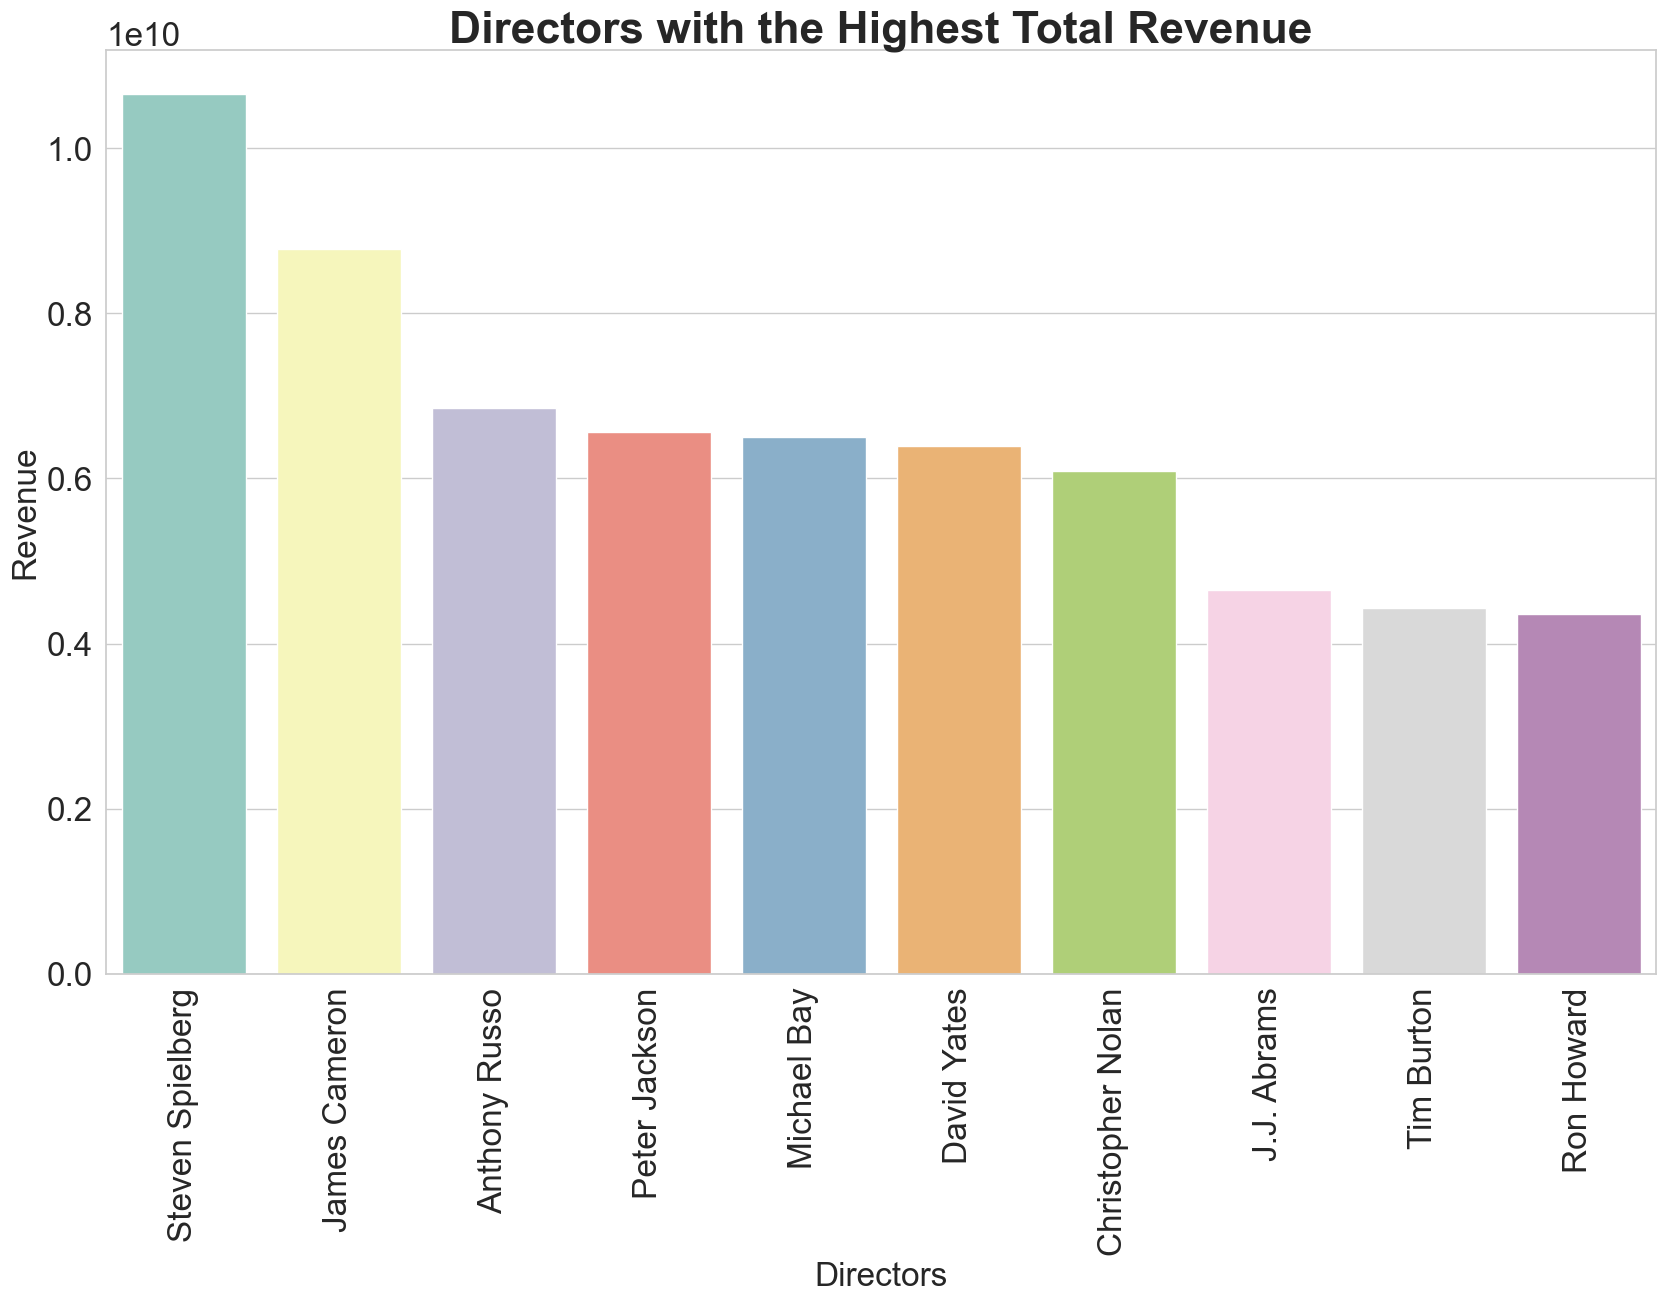

In [132]:
sns.barplot(x=high_rev_directors.head(10).index, y='revenue',
            data=high_rev_directors.head(10),
            palette='Set3')
plt.title('Directors with the Highest Total Revenue')
plt.xlabel('Directors')
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.savefig('image_result/high_revenue_directors.png')

For average revenues, consider only actors and directors who have acted and directed in at least 5 movies respectively.

In [133]:
casts_list = casts_df.groupby('casts')['revenue'].count().sort_values(ascending=False)
casts_list = list(casts_list[casts_list >= 5].index)

In [134]:
directors_list = movies_df.groupby('director')['revenue'].count().sort_values(ascending=False)
directors_list = list(directors_list[directors_list >= 5].index)

#### Actors with Highest Average Revenue

In [135]:
high_avg_rev_casts = pd.DataFrame(casts_df[casts_df['casts'].isin(casts_list)].groupby('casts')['revenue'].sum().sort_values(ascending=False))

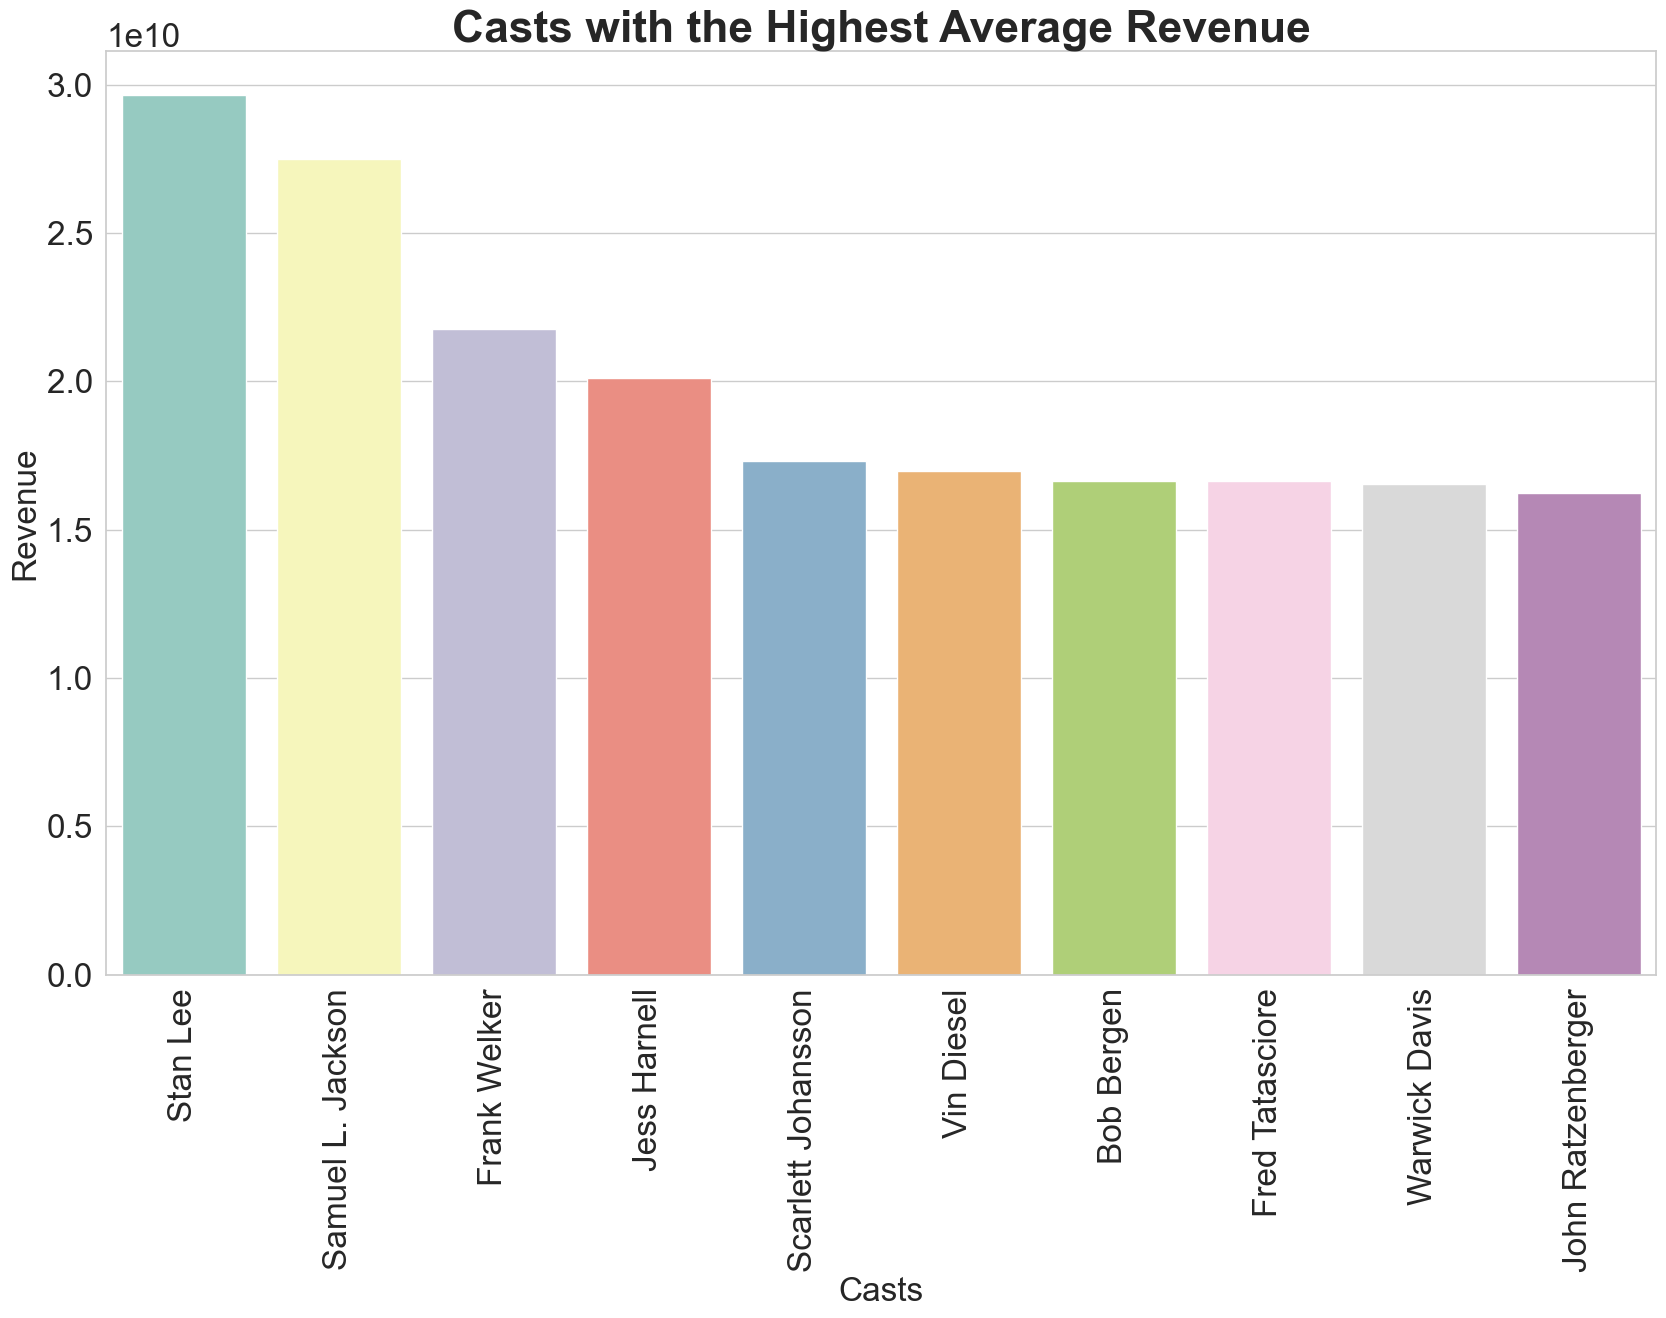

In [136]:
sns.barplot(x=high_avg_rev_casts.head(10).index, y='revenue',
            data=high_avg_rev_casts.head(10),
            palette='Set3')
plt.title('Casts with the Highest Average Revenue')
plt.xlabel('Casts')
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.savefig('image_result/high_average_revenue_casts.png')

In [137]:
high_avg_rev_directors = pd.DataFrame(movies_df[movies_df['director'].isin(directors_list)].groupby('director')['revenue'].sum().sort_values(ascending=False))

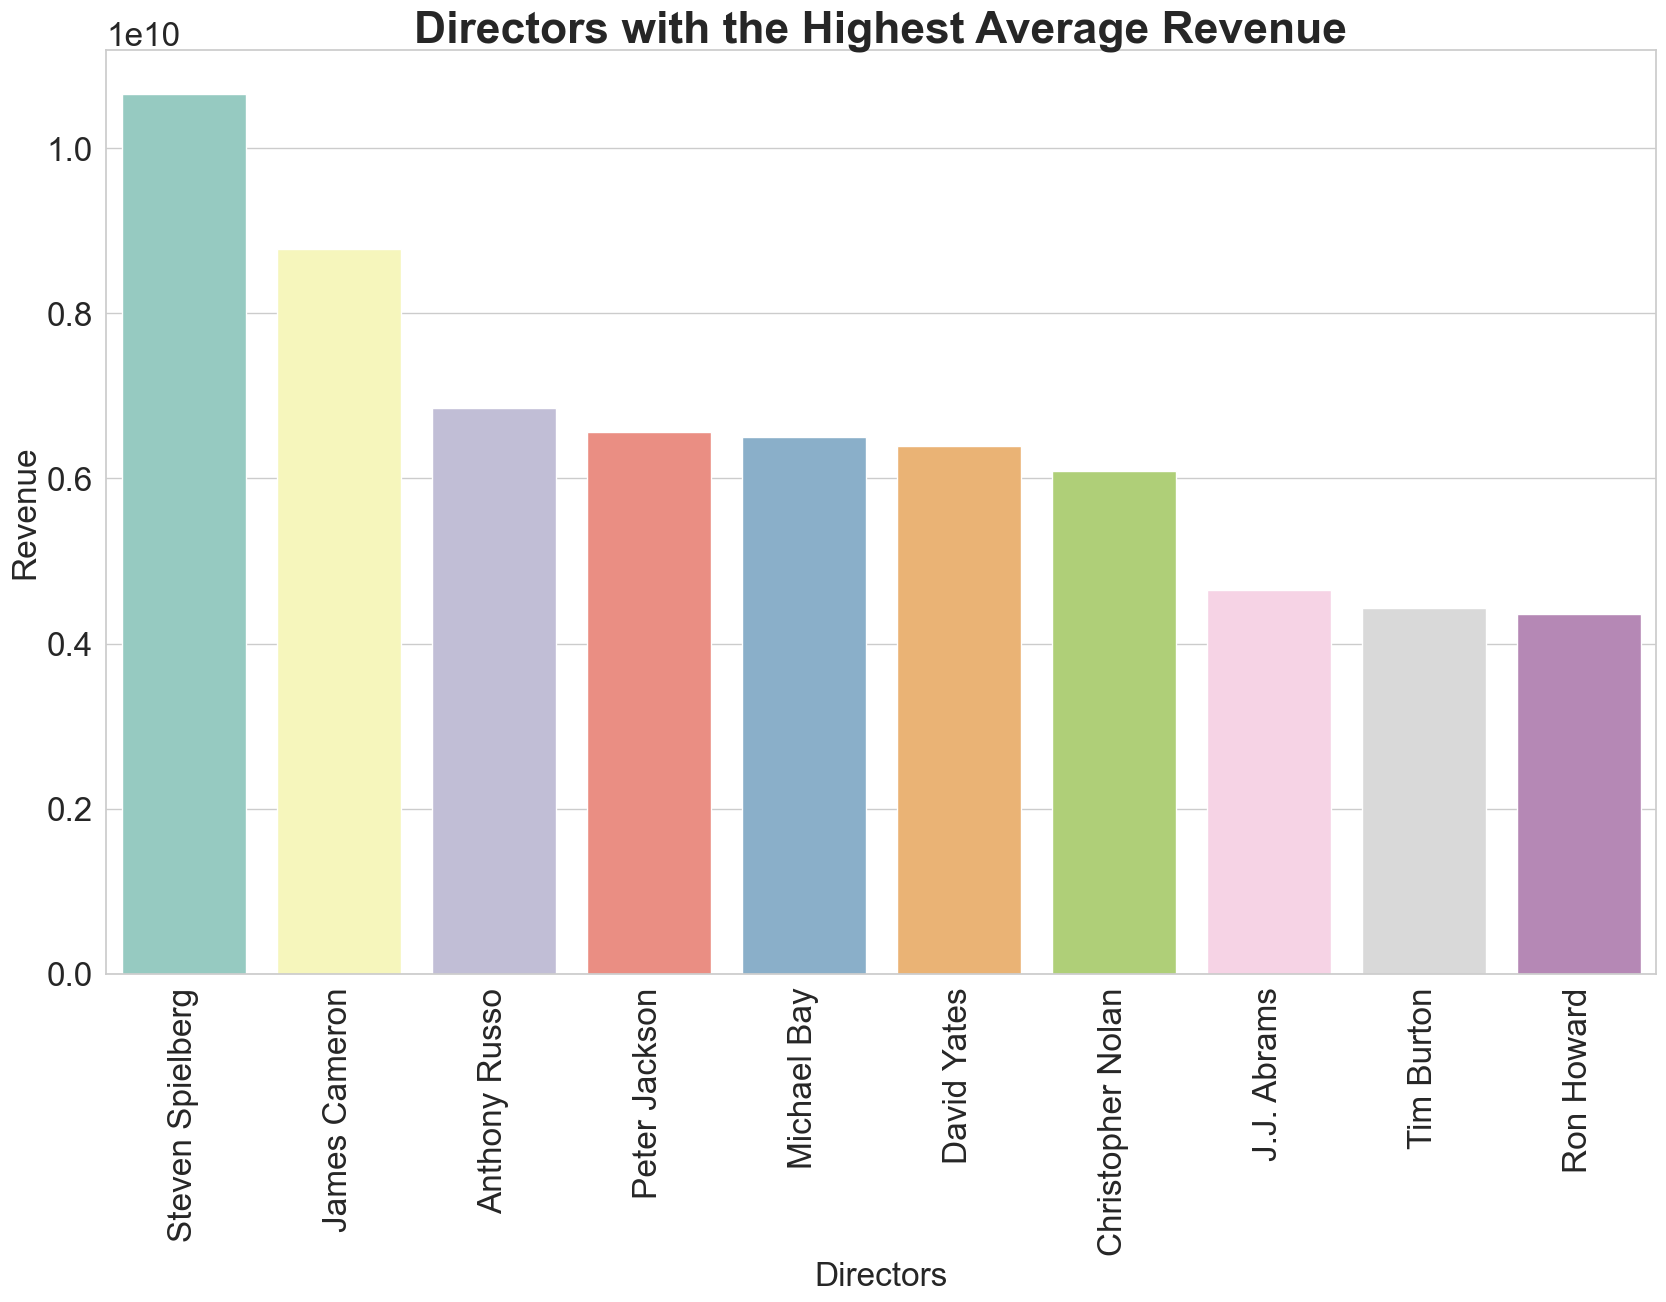

In [138]:
sns.barplot(x=high_avg_rev_directors.head(10).index, y='revenue',
            data=high_avg_rev_directors.head(10),
            palette='Set3')
plt.title('Directors with the Highest Average Revenue')
plt.xlabel('Directors')
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.savefig('image_result/high_average_revenue_directors.png')

Which actors and directors are the safest bet? 

For this, consider the average return brought in by a particular director or actor. Only consider those movies that have raked in at least 1 billlion (1e9) dollars. Also, only consider actors and directors that have worked in at least 5 films.

#### Most Successful Actors

In [139]:
success_df = casts_df[(casts_df['return'].notnull()) & (casts_df['revenue'] > 1e9) & (casts_df['casts'].isin(casts_list))]
pd.DataFrame(success_df.groupby('casts')['return'].mean().sort_values(ascending=False).head(10))

return
casts                            
Glenn Fleshler          19.535605
Frances Conroy          19.535605
Blaise Corrigan         19.535605
April Grace             19.535605
Brendan Patrick Connor  19.535605
Tony D. Head            19.535605
Brian Tyree Henry       19.535605
Murphy Guyer            19.535605
John Cenatiempo         19.535605
Joaquin Phoenix         19.535605

#### Most Successful Directors

In [140]:
success_df = movies_df[(movies_df['return'].notnull()) & (movies_df['revenue'] > 1e9) & (movies_df['director'].isin(directors_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

return
director                
Todd Phillips  19.535605
David Yates    10.732090
James Cameron   9.567049
Peter Jackson   7.993744
Bill Condon     7.913225
James Wan       7.576892
Rian Johnson    6.663494
Anthony Russo   6.442246
Jon Favreau     6.396154
J.J. Abrams     6.369153

In [141]:
movies_df[(movies_df['director'] == 'James Cameron') & (movies_df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

title       budget       revenue     return  year
375                     True Lies  115000000.0  3.788824e+08   3.294630  1994
581    Terminator 2: Judgment Day  102000000.0  5.200000e+08   5.098039  1991
1093                    The Abyss   70000000.0  9.000010e+07   1.285716  1989
1163                       Aliens   18500000.0  1.833165e+08   9.908998  1986
1200               The Terminator    6400000.0  7.837120e+07  12.245500  1984
1644                      Titanic  200000000.0  2.264162e+09  11.320812  1997
6153          Ghosts of the Abyss   13000000.0  1.704087e+07   1.310836  2003
14027                      Avatar  237000000.0  2.923706e+09  12.336312  2009
82613    Avatar: The Way of Water  460000000.0  2.320250e+09   5.044022  2022

This is the end of Exploratory Data Analysis over here. 

Use some of the insights gained in this section and build some useful predictive models.

## Regression: Predicting Movie Revenues

In this section, building a regression model to predict movie revenues. Since this isn't one of the main goals of this project, it does not spend too much time feature engineering or hyperparamater tuning model. 

Predicting Movie Revenues is an extremely popular problem in Machine Learning which has created a huge amount of literature. Most of the models proposed in these papers use far more potent features than what possess at the moment. These include Facebook Page Likes, Information on Tweets about the Movie, YouTube Trailer Reaction (Views, Likes, Dislikes, etc.), Movie Rating (MPCAA, CBIFC) among many others.

To compensate for the lack of these features, there are going to be a few cheats. TMDB's **Popularity Score** and **Vote Average** will be being used as features in model to assign a nuerical value to popularity. However, it must be kept in mind that these metrics will not be available when predicting movie revenues in the real world, when the movie has not been released yet.

In [142]:
regression_df = movies_df[movies_df['return'].notnull()]
regression_df.shape

(8924, 30)

There arae **8924 records** in a training set. Take a look at the features possessed and remove the ones which are unnecessary.

In [143]:
regression_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year', 'month', 'day',
       'cast', 'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [144]:
regression_df.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'title', 'video', 'return', 'crew', 'cast', 'director'], axis=1, inplace=True)

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\4092626826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Perform the following feature engineering tasks:

1. **belongs_to_collection** will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.

2. **genres** will be converted into number of genres.

3. **homepage** will be converted into a Boolean variable that will indicate if a movie has a homepage or not.

4. **original_language** will be replaced by a feature called **is_english** to denote if a particular film is in English or a Foreign Language.

5. **production_companies** will be replaced with just the number of production companies collaborating to make the movie.

6. **production_countries** will be replaced with the number of countries the film was shot in.

7. **month** will be converted into a variable that indicates if the month was a holiday season.

8. **day** will be converted into a binary feature to indicate if the film was released on a Friday.

In [145]:
stack_genres = regression_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
stack_genres.name = 'genre'

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\3211501854.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [146]:
genres_rdf = regression_df.drop('genres', axis=1).join(stack_genres)
genres_train = genres_rdf['genre'].drop_duplicates()

In [147]:
X, y = regression_df.drop('revenue', axis=1), regression_df['revenue']

In [148]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)

    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))

    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)

    df['is_english'] = df['original_language'].apply(lambda x: 1 if x == 'en' else 0)
    df.drop('original_language', axis=1, inplace=True)

    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))

    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    
    df['year'] = df['year'].fillna(0)
    
    df['is_holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun','Nov'] else 0)
    df.drop('month', axis=1, inplace=True)

    df['is_friday'] = df['day'].apply(lambda x: 1 if x == 'Fri' else 0)
    df.drop('day', axis=1, inplace=True)

    df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'].fillna(df['vote_average'].mean())

    return df

In [149]:
X = feature_engineering(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

In [151]:
X_train.shape

(6693, 37)

In [152]:
reg_model = GradientBoostingRegressor()
reg_model.fit(X_train, y_train)
reg_model.score(X_test, y_test)


0.7249409337367747

Coefficient of Determination is **0.7213** which is a pretty score for the basic model that have built. Let compare regression model's score to a Dummy Regressor.

In [153]:
dummy_reg_model = DummyRegressor()
dummy_reg_model.fit(X_train, y_train)
dummy_reg_model.score(X_test, y_test)

-0.0002962401006270099

Regression model performs far more superiorly than the Dummy Regressor.

Finally, plot the feature importances in the form of a bar plot to deduce which features were the most significant in making predictions.

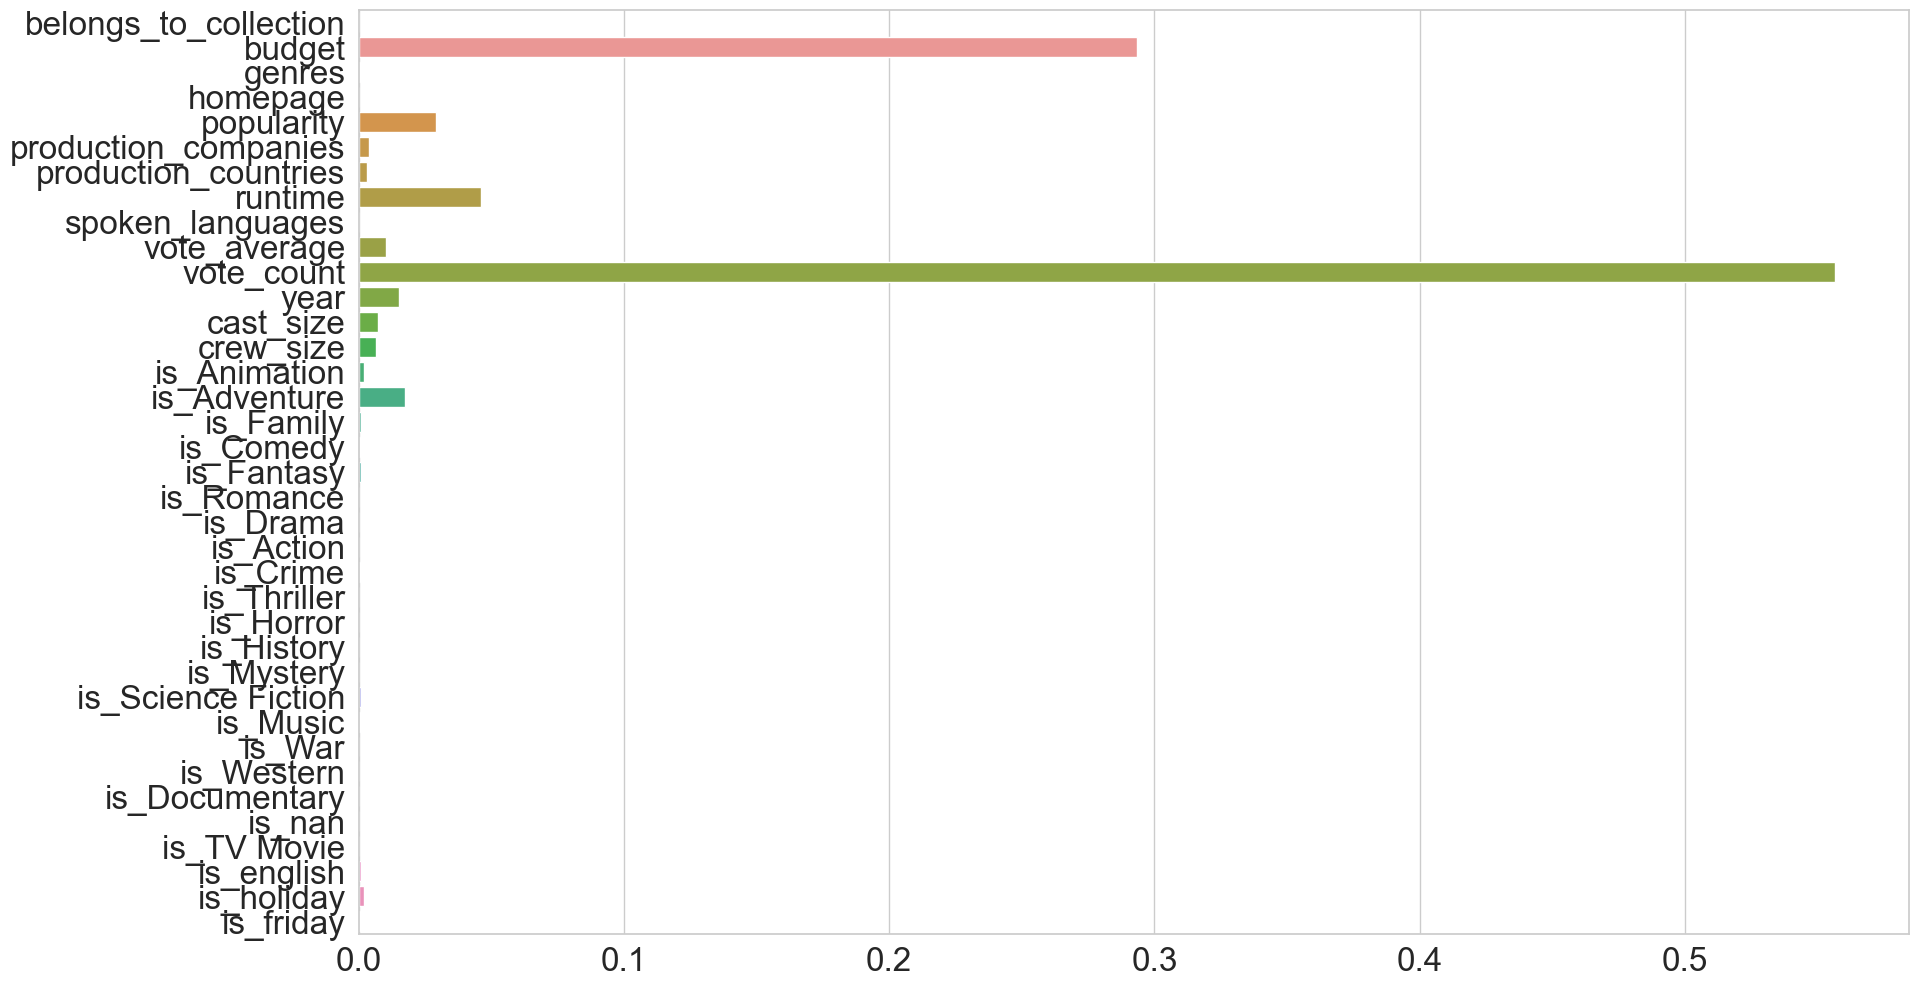

In [154]:
sns.barplot(x=reg_model.feature_importances_, y=X.columns)
plt.savefig('image_result/regression_model.png')

It has been ​noticed​ ​that​ **​vote_count**,​ ​a​ ​feature​ was ​cheated​ ​with is​ ​the​ ​most​ ​important​ ​feature​ ​to​ the **Gradient​ ​Boosting​ ​Model**. 

​This​ ​goes​ ​on​ ​to​ ​show​ ​the​ ​importance​ ​of​ ​popularity​ ​metrics​ ​in determining​ ​the​ ​revenue​ ​of​ ​a​ ​movie.​ **​Budget​** ​was​ ​the​ ​second​ most​ ​important​ ​feature​ ​followed​ ​by **Runtime** ​and​ **Popularity**.

## Classification: Predicting Movie Sucess

What factors influence whether a movie will be able to recoup its investments? To answer this question by building a binary classifier that predicts if a movie will make a profit or a loss. As with the regression model, there are a few cheats and use features that may not be available in the real world for the lack of other useful popularity metrics.

Extensive analysis of data has already been performed and haven't been done a lot with respect to determining factors that make a movie a success. Attempt at doing that in this section and follow it up by building a model.

In [155]:
classification_df = movies_df[movies_df['return'].notnull()]
classification_df.shape

(8924, 30)

In [156]:
classification_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year', 'month', 'day',
       'cast', 'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [157]:
classification_df.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'title', 'video', 'crew', 'cast', 'director', 'homepage', 'revenue'], axis=1, inplace=True)

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\3408714890.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
classification_df['return'] = classification_df['return'].apply(lambda x: 1 if x >= 1 else 0)

C:\Users\HaiThanh.HPTHANH\AppData\Local\Temp\ipykernel_11180\886436728.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
classification_df['return'].value_counts()

1    5961
0    2963
Name: return, dtype: int64

In [160]:
def classification_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)

    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))

    df['is_english'] = df['original_language'].apply(lambda x: 1 if x == 'en' else 0)
    df.drop('original_language', axis=1, inplace=True)

    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))

    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))

    df['year'] = df['year'].fillna(0)
    
    df['is_holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun','Nov'] else 0)
    df.drop('month', axis=1, inplace=True)

    df['is_friday'] = df['day'].apply(lambda x: 1 if x == 'Fri' else 0)
    df.drop('day', axis=1, inplace=True)

    df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'].fillna(df['vote_average'].mean())

    return df

In [161]:
X, y = classification_df.drop('return', axis=1), classification_df['return']

In [162]:
X = classification_engineering(X)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

In [164]:
cls_model = GradientBoostingClassifier()
cls_model.fit(X_train, y_train)
cls_model.score(X_test, y_test)

0.7794710891976692

Gradient Boosting Classifier has an accuracy of **78%**. Again, this model can be improved upon through hyperparameter tuning and more advanced feature engineering but since this is not the main objective of this project, this will be skipped.

In [165]:
dummy_cls_model = DummyClassifier(strategy='most_frequent')
dummy_cls_model.fit(X_train, y_train)
dummy_cls_model.score(X_test, y_test)

0.6562079784849844

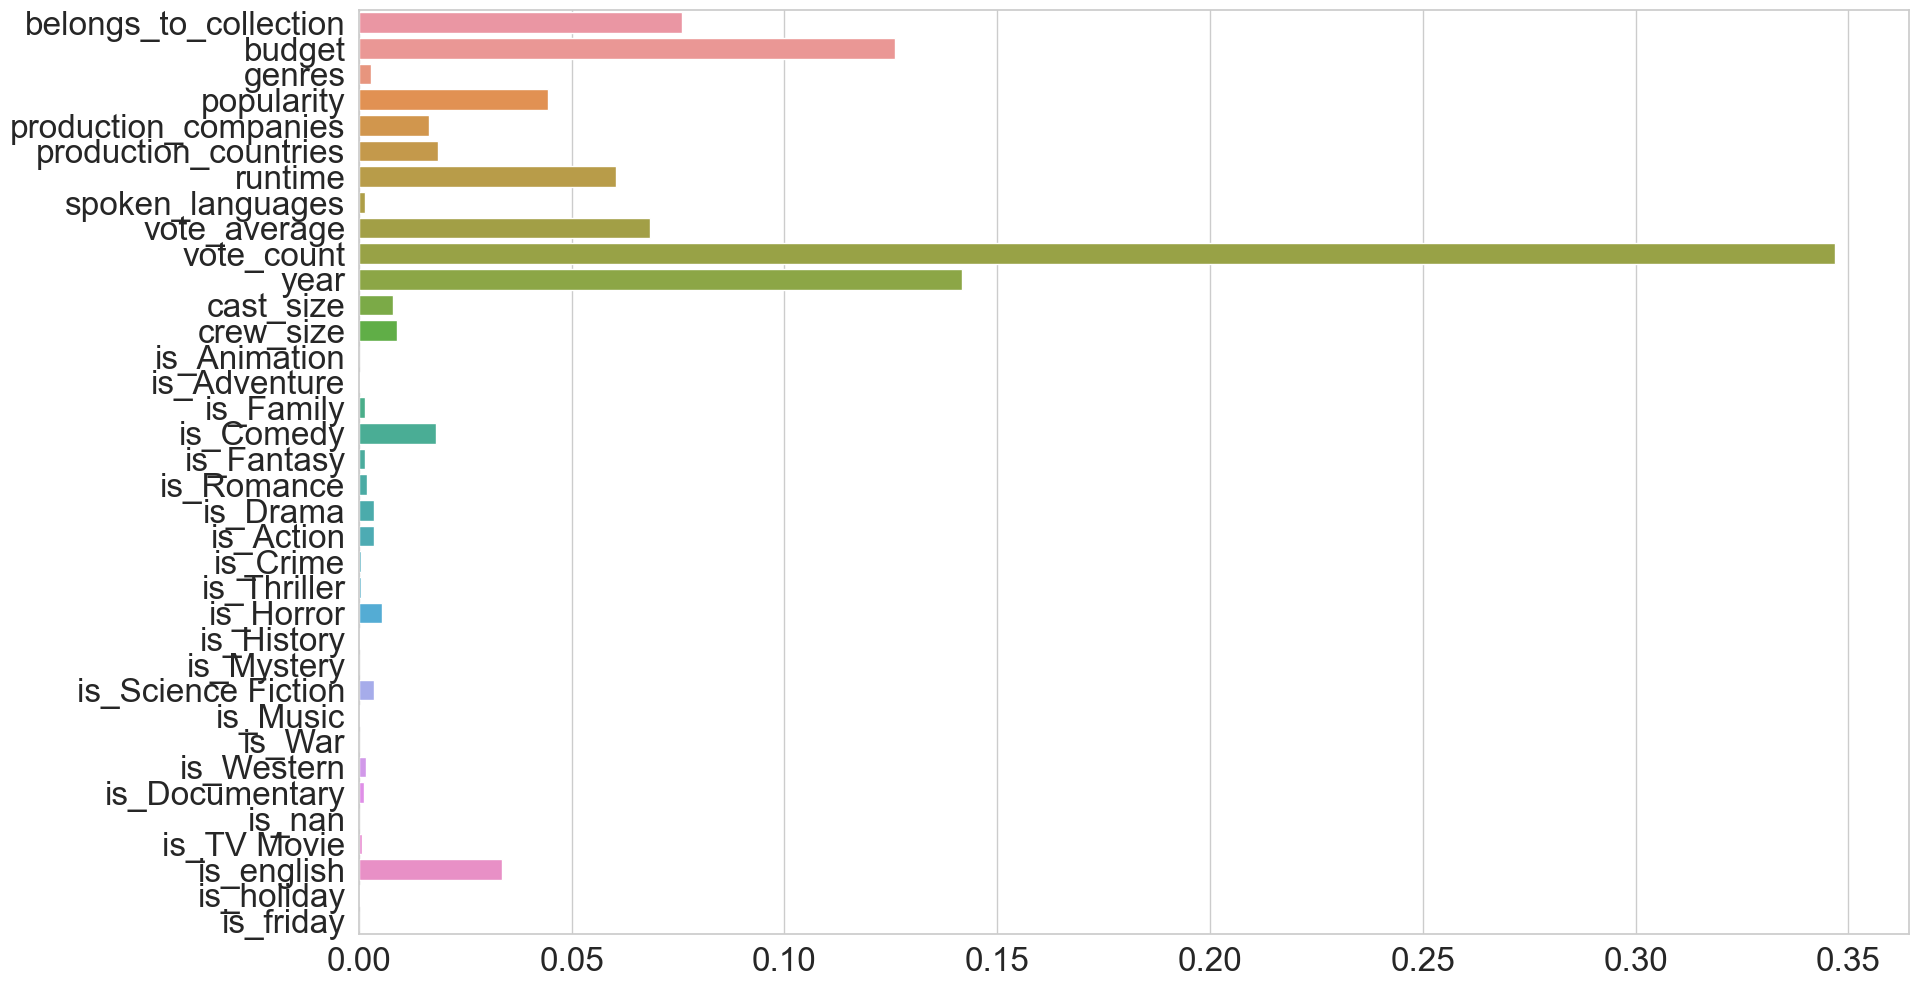

In [166]:
sns.barplot(x=cls_model.feature_importances_, y=X.columns)
plt.savefig('image_result/regression_model.png')

It can be obviously seen that **Vote Count** is once again the most significant feature identified by Classifier. Other important features include **Year**, **Budget**, **Belongs to Collection** and **Popularity**.

In the next notebook, a **Hybrid Recommendation System** will be carefully built based on popularity, content and collaborative filtering. This will use the MovieLens dataset in addition to the TMDB Movies Metadata that have been used here.